## Alper Kaya

## Question A

## Gradient According to W
If $f(x) = ln(x)$ then $f'(x) = 1/x$ </br>
And given that $u_i(w, b) = 1/1+\mathrm{e}^{-y_i(b + \mathrm{x_i}^{T}*w)}$ </br>
Then this mean $ln(1+\mathrm{e}^{-y_i(b + \mathrm{x_i}^{T}*w)})$ = $ln(\mathrm{u_i(w, b)}^{-1})$ </br>
Then ($ln(1+\mathrm{e}^{-y_i(b + \mathrm{x_i}^{T}*w)}))'_w$ = $u_i(w, b)$ </br>
But we are not done here since $(fog(x))'_x = f'(g(x)) * g'(x)$ </br>
This why we need to find $(1+\mathrm{e}^{-y_i(b + \mathrm{x_i}^{T}*w)})'_w$ </br>
Since 1 is a constant which is not related with w, <br>
$(1+\mathrm{e}^{-y_i(b + \mathrm{x_i}^{T}*w)})'_w$ = $(\mathrm{e}^{-y_i(b + \mathrm{x_i}^{T}*w)})'_w$ <br>
And since $(\mathrm{e}^{3x})' = \mathrm{e}^{x} * 3$ <br>
$(\mathrm{e}^{-y_i(b + \mathrm{x_i}^{T}*w)})'_w$ = $\mathrm{e}^{-y_i(b + \mathrm{x_i}^{T}*w)} * (-y_i*\mathrm{x_i}^{T})$ <br>
So to sum, the gradient of whole of it according to w is:<br>
($ln(1+\mathrm{e}^{-y_i(b + \mathrm{x_i}^{T}*w)}))'_w$ = $u_i(w, b) * \mathrm{e}^{-y_i(b + \mathrm{x_i}^{T}*w)} * (-y_i*\mathrm{x_i}^{T})$<br>

But since question asks us to only use $u_i(w, b)$ while answering,<br>
$1 + \mathrm{e}^{-y_i(b + \mathrm{x_i}^{T}*w)} = \mathrm{u_i(w, b)}^{-1}$<br>
Then<br>
$\mathrm{e}^{-y_i(b + \mathrm{x_i}^{T}*w)} = \mathrm{u_i(w, b)}^{-1} - 1$<br>
For the last part, we need to take $ln()$ of the previous part to access $-y_i * \mathrm{x_i}^{T}$:<br>
$ln(\mathrm{u_i(w, b)}^{-1} - 1) = -y_i(b + \mathrm{x_i}^{T}*w)$<br>
$ln(\mathrm{u_i(w, b)}^{-1} - 1) = -y_i * b + -y_i * \mathrm{x_i}^{T}*w$<br>
$ln(\mathrm{u_i(w, b)}^{-1} - 1) +y_i * b = -y_i * \mathrm{x_i}^{T}*w$<br>
And finally,<br>
$(ln(\mathrm{u_i(w, b)}^{-1} - 1) +y_i * b) / w = -y_i * \mathrm{x_i}^{T}$<br>
This is why,<br>
($ln(1+\mathrm{e}^{-y_i(b + \mathrm{x_i}^{T}*w)}))'_w$ = $u_i(w, b) * (\mathrm{u_i(w, b)}^{-1} - 1) * ((ln(\mathrm{u_i(w, b)}^{-1} - 1) +y_i * b) / w)$ <br>
And for regularization part, <br>
$ (λ*\mathrm{(\lVert w \rVert_2)}^{2})'_w = 2 * λ * w$ <br><br>

**To Put Everything Together,**<br>
$J(w, b)'_w = 1/n * [\sum_{i=1}^n u_i(w, b) * (\mathrm{u_i(w, b)}^{-1} - 1) * ((ln(\mathrm{u_i(w, b)}^{-1} - 1) +y_i * b) / w)] + 2 * λ * w$

## Gradient According to B

By using the same logic I have explained above, we can derive the gradient of our single value b. <br>
It will be the same as above except for the last part since it doesn't include b in it:<br>
($ln(1+\mathrm{e}^{-y_i(b + \mathrm{x_i}^{T}*w)}))'_b$ = $u_i(w, b) * \mathrm{e}^{-y_i(b + \mathrm{x_i}^{T}*w)} * (-y_i)$<br>
($ln(1+\mathrm{e}^{-y_i(b + \mathrm{x_i}^{T}*w)}))'_b$ = $u_i(w, b) * (\mathrm{u_i(w, b)}^{-1} - 1) * (-y_i)$ <br>
Then,<br>
$J(w, b)'_b = 1/n * \sum_{i=1}^n u_i(w, b) * (\mathrm{u_i(w, b)}^{-1} - 1) * (-y_i)$

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from numba import njit
import pandas as pd
import numpy as np
import random
import cv2

## I have achieved **98.23%** Accuracy on test dataset with my own implementation, I have included parameters as a numpy file. You can load and test it.

## Downloading the Data and Preprocessing

In [ ]:
mnist = fetch_openml('mnist_784', as_frame=False, cache=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X = mnist.data.astype('float64')
y = mnist.target.astype('int64')

In [ ]:
X /= 255.0

In [ ]:
X.min(), X.max()

(0.0, 1.0)

In [ ]:
tempX = []
tempY = []
for i, e in enumerate(y):
  if e == 2 or e == 7:
    tempY.append(-1 if e == 2 else 1)
    tempX.append(X[i])
y = np.asarray(tempY,dtype=np.int64)
X = np.asarray(tempX,dtype=np.float32)
print(y[:3])

[-1  1 -1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((10712, 784), (10712,))

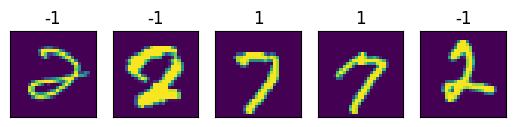

In [ ]:
s = random.randint(0,len(X_train)-11)
e = s+5
for i, (img, y) in enumerate(zip(X_train[s:e].reshape(e-s, 28, 28), y_train[s:e])):
        # 1 is for static row number1
        # 5 is for static column number
        # 1+i(i starts from 0) is for indicating the current column that is going to be processed
        plt.subplot(151+i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

In [ ]:
print(X[0].shape, "As you can see pictures are turned into flat 1-d arrays.")

(784,) As you can see pictures are turned into flat 1-d arrays.


## Data Augmentation on Training Data

## Shift Down 1 pixel

In [ ]:
tempXdown = []
tempYdown = []
for x in X_train:
  x = x.reshape(28, 28)
  tempx = []
  tempx.append([0 for _ in range(28)])
  for i in range(1, 28):
    tempx.append(x[i])
  tempXdown.append(np.asarray(tempx, dtype=np.float64).flatten())

In [ ]:
print(len(tempXdown), len(tempXdown[0]))

10712 784


## Shift Left 1 pixel

In [ ]:
tempXleft = []
tempYleft = []
for x in X_train:
  x = x.reshape(28, 28)
  tempx = []
  for i in range(0, 28):
    temprow = x[i]
    for j in range(1, 28):
      temprow[j-1] = temprow[j]
    temprow[27] = 0
    tempx.append(np.asarray(temprow, dtype=np.float64).flatten())
  tempXleft.append(np.asarray(tempx, dtype=np.float64).flatten())

In [ ]:
print(len(tempXleft), len(tempXleft[0]))

10712 784


In [ ]:
tempYdown = y_train
tempYleft = y_train

In [ ]:
X_train = np.concatenate((X_train, tempXdown), axis=0)
y_train = np.append(y_train, tempYdown)

In [ ]:
X_train = np.concatenate((X_train, tempXleft), axis=0)
y_train = np.append(y_train, tempYleft)

In [ ]:
print(X_train.shape, y_train.shape)

(32136, 784) (32136,)


## Writing Gradient Logic - Logistic Regression Class

In [ ]:
class LogisticRegression:
  def __init__(self, lr, reg, X_train, y_train, X_test, y_test):
    self.lr = lr
    self.reg = reg
    self.w = np.random.rand(28*28)*2-1
    self.b = np.random.rand(1)[0]*2-1
    self.X_train = X_train
    self.y_train = y_train
    self.X_test  = X_test
    self.y_test  = y_test

  def updateParams(self):
    self.updateB()
    self.updateW()
  def updateParamsScohastic(self, batch_size):
    self.updateBscohastic(batch_size)
    self.updateWscohastic(batch_size)
  def updateB(self):
    gradientFloat = self.calcGradientB()
    self.b -= gradientFloat * self.lr
  def updateBscohastic(self, batch_size):
    gradientFloat = self.calcGradientBstochastic(batch_size)
    self.b -= gradientFloat * self.lr
  def updateW(self):
    gradientVector = self.calcGradientW()
    self.w -= gradientVector * self.lr
  def updateWscohastic(self, batch_size):
    gradientVector = self.calcGradientWstochastic(batch_size)
    self.w -= gradientVector * self.lr
  def calcGradientB(self):
    sumGradient = 0
    for i, x in enumerate(self.X_train):
      y = self.y_train[i]
      logPart = np.log(1 + np.exp(-y * (self.b + np.dot(x.T, self.w))))
      if logPart == 0:
        continue
      u = 1 / logPart
      sumGradient += u * (np.exp(-y*(self.b + np.dot(x.T, self.w))) * -y)
    sumGradient /= len(self.X_train)
    return sumGradient
  def calcGradientBstochastic(self, batch_size):
    s = random.randint(0, len(X_train) - batch_size)
    e = s + batch_size
    sumGradient = 0
    for i, (x, y) in enumerate(zip(self.X_train[s:e], self.y_train[s:e])):
      logPart = np.log(1 + np.exp(-y * (self.b + np.dot(x.T, self.w))))
      if logPart == 0:
        continue
      u = 1 / logPart
      sumGradient += u * (np.exp(-y*(self.b + np.dot(x.T, self.w))) * -y)
    sumGradient /= e-s
    return sumGradient
  def calcGradientW(self):
    calculatedRegGradient = 2 * self.reg * np.linalg.norm(self.w)
    sumGradient = np.zeros_like(self.w)
    for i, x in enumerate(self.X_train):
      y = self.y_train[i]
      logPart = np.log(1 + np.exp(-y * (self.b + np.dot(x.T, self.w))))
      if logPart == 0:
        continue
      u = 1 / logPart
      sumGradient += u * np.exp(-y * (self.b + np.dot(x.T, self.w))) * (-y * x.T)
    sumGradient /= len(self.X_train)
    return sumGradient + calculatedRegGradient
  def calcGradientWstochastic(self, batch_size):
    s = random.randint(0, len(X_train) - batch_size)
    e = s + batch_size
    calculatedRegGradient = 2 * self.reg * np.linalg.norm(self.w)
    sumGradient = np.zeros_like(self.w)
    for i, (x, y) in enumerate(zip(self.X_train[s:e], self.y_train[s:e])):
      logPart = np.log(1 + np.exp(-y * (self.b + np.dot(x.T, self.w))))
      if logPart == 0:
        continue
      u = 1 / logPart
      sumGradient += u * np.exp(-y * (self.b + np.dot(x.T, self.w))) * (-y * x.T)
    sumGradient /= e - s
    return sumGradient + calculatedRegGradient
  def calcLoss(self):
    sumLoss = 0
    calculatedReg = self.reg * np.linalg.norm(self.w)**2
    for i, x in enumerate(self.X_train):
      y = self.y_train[i]
      sumLoss += np.log(1 + np.exp(-y * (self.b + np.dot(x.T, self.w))))
    sumLoss /= len(self.X_train)
    return sumLoss + calculatedReg
  def calcLossTest(self):
    sumLoss = 0
    calculatedReg = self.reg * np.linalg.norm(self.w)**2
    for i, x in enumerate(self.X_test):
      y = self.y_test[i]
      sumLoss += np.log(1 + np.exp(-y * (self.b + np.dot(x.T, self.w))))
    sumLoss /= len(self.X_train)
    return sumLoss + calculatedReg
  def predict(self, X):
    prediction = np.dot(X.T, self.w) + self.b
    sgmd1 = 1/(1 + np.exp(-prediction))
    sgmd2 = np.exp(-prediction) / (1 + np.exp(-prediction))
    return 1 if sgmd1 > sgmd2 else -1
  def testModel(self):
    accuracy = 0
    for i, e in enumerate(self.y_test):
      prediction = self.predict(self.X_test[i])
      accuracy += 1 if prediction == e else 0
    return accuracy / len(y_test)
  def testModelWtrain(self):
    accuracy = 0
    for i, e in enumerate(self.y_train):
      prediction = self.predict(self.X_train[i])
      accuracy += 1 if prediction == e else 0
    return accuracy / len(y_train)
  def showParams(self):
    print("B:                  ", self.b)
    print("Learning Rate:      ", self.lr)
    print("Regularization Rate:", self.reg)
    print("Shape of X_train:   ", self.X_train.shape)
    print("Shape of y_train:   ", self.y_train.shape)
    print("Shape of X_test:    ", self.X_test.shape)
    print("Shape of y_test:    ", self.y_test.shape)
    print("Ws:                 ", self.w)

In [ ]:
## NJIT COMPATABLE FUNCTION VERSIONS
@njit
def updateB(reg, lr, w, b, X_train, y_train):
    sumGradient = 0
    for i, x in enumerate(X_train):
      y = y_train[i]
      logPart = np.log(1 + np.exp(-y * (b + np.dot(x.T, w))))
      if logPart == 0:
        continue
      u = 1 / logPart
      sumGradient += u * (np.exp(-y*(b + np.dot(x.T, w))) * -y)
    sumGradient /= len(X_train)
    b -= sumGradient * lr
    return b
@njit
def updateW(reg, lr, w, b, X_train, y_train):
    calculatedRegGradient = 2 * reg * np.linalg.norm(w)
    sumGradient = np.zeros_like(w)
    for i, x in enumerate(X_train):
      y = y_train[i]
      logPart = np.log(1 + np.exp(-y * (b + np.dot(x.T, w))))
      if logPart == 0:
        continue
      u = 1 / logPart
      sumGradient += u * np.exp(-y * (b + np.dot(x.T, w))) * (-y * x.T)
    sumGradient /= len(X_train)
    gradientVector = sumGradient + calculatedRegGradient
    w -= gradientVector * lr

    return w
@njit
def calcLoss(reg, w, b, X_train, y_train):
    sumLoss = 0
    calculatedReg = reg * np.linalg.norm(w)**2
    for i, x in enumerate(X_train):
      y = y_train[i]
      sumLoss += np.log(1 + np.exp(-y * (b + np.dot(x.T, w))))
    sumLoss /= len(X_train)
    return sumLoss + calculatedReg
@njit
def predict(X, w, b):
    prediction = np.dot(X.T, w) + b
    sgmd1 = 1/(1 + np.exp(-prediction))
    sgmd2 = np.exp(-prediction) / (1 + np.exp(-prediction))
    return 1 if sgmd1 > sgmd2 else -1
@njit
def testModel(X_test, y_test, w, b):
    accuracy = 0
    for i, e in enumerate(y_test):
      prediction = predict(X_test[i], w, b)
      accuracy += 1 if prediction == e else 0
    return accuracy / len(y_test)
@njit
def trainUntilPerfection(reg, lr, w, b, X_train, y_train, X_test, y_test, wlist):
  it = 0
  print("Target Accuracy:",0.99)
  while testModel(X_test, y_test, w, b) < 0.99:
    it += 1
    b = updateB(reg, lr, w, b, X_train, y_train)
    w = updateW(reg, lr, w, b, X_train, y_train)
    if it % 100 == 0:
      print("Loss:", calcLoss(reg, w, b, X_train, y_train))
      print("Accuracy:",testModel(X_test, y_test, w, b))
      print("B:",b)
      wlist.append(w)

In [ ]:
wlist = [np.random.rand(28*28)]

## This Compiled-Optimized Version Iterates 100 times in a few seconds!

In [ ]:
model = LogisticRegression(0.0001, 0.000000001, X_train, y_train, X_test, y_test)

In [ ]:
model.testModel()

0.7045645477457295

In [ ]:
model.showParams()

B:                   -0.3752313402557595
Learning Rate:       0.0003
Regularization Rate: 1e-09
Shape of X_train:    (32136, 784)
Shape of y_train:    (32136,)
Shape of X_test:     (3571, 784)
Shape of y_test:     (3571,)
Ws:                  [ 6.10827488e-01  1.56606655e-01  4.45471617e-01  2.83438262e-01
 -2.93381217e-01  6.81704860e-01  3.21799954e-01 -1.32078381e-01
  9.37598960e-01  1.46089043e-01 -4.11104511e-01 -7.19789756e-01
 -4.81862304e-01  6.71813909e-01 -1.22243575e-01  2.37483562e-01
 -8.65448769e-01  9.96976288e-01  8.45495289e-01  2.71706811e-01
  2.66673103e-01 -1.74486776e-01 -3.59995946e-02 -7.82381321e-01
  6.98766040e-01  1.45846342e-01 -3.59971147e-01  8.38834356e-01
  4.73337078e-01  8.51261253e-01 -7.06655457e-02  1.86661753e-01
 -2.31030235e-01  4.56657957e-01 -9.83921794e-01 -3.06330455e-01
  6.74950752e-01  1.94521143e-02 -6.01387656e-01  1.22131722e-01
 -1.16858702e-01 -7.96805448e-01 -8.60772904e-01  7.87606823e-01
  2.16219129e-01  1.53976237e-01 -1.898277

In [ ]:
# Run this if you need-want speed!
# trainUntilPerfection(model.reg, model.lr, model.w.astype(np.float64), model.b.astype(np.float64), X_train.astype(np.float64), y_train.astype(np.float64), X_test.astype(np.float64), y_test.astype(np.float64), wlist)

In [ ]:
# model.w = wlist[-1:][0]
# Change b by copying from the log
# model.b = -0.3752313402557595

In [ ]:
print(model.predict(X_train[0]), y_train[0])

-1 -1


## Load parameters to show that I have achieved 98.23% accuracy. But I will reset it to produce required plots.

In [ ]:
with open("params.npy", "rb") as file:
  model.w = np.load(file, allow_pickle=True)
  model.b = np.load(file, allow_pickle=True)
print(model.testModel())

0.9823578829459535


In [ ]:
model.testModel()

0.9823578829459535

In [ ]:
it = 0
losslisttrain = []
losslisttest  = []
acclisttrain = []
acclisttest = []
while model.testModel() < 0.85:
  it += 1

  firstloss = model.calcLoss()
  firstlosstest = model.calcLossTest()

  print(firstloss)

  model.updateParams()
  secloss = model.calcLoss()
  seclosstest = model.calcLossTest()

  print(secloss)

  losslisttrain.append(firstloss)
  losslisttrain.append(secloss)

  losslisttest.append(firstlosstest)
  losslisttest.append(seclosstest)

  acclisttrain.append((1-model.testModelWtrain()) * len(model.X_train))
  acclisttest.append((1-model.testModel()) * len(model.X_test))
  print("------------------")
  if it % 10 == 0:
    print("Accuracy:",model.testModel())
    print(len(losslisttrain))
    print(len(losslisttest))
    print(len(acclisttrain))
    print(len(acclisttest))

1.466923598609645
0.7794377066899705
------------------
0.7794377066899705
0.7775207404497955
------------------
0.7775207404497955
0.7756592008288897
------------------
0.7756592008288897
0.7738496052584836
------------------
0.7738496052584836
0.7720887614235803
------------------
0.7720887614235803
0.7703737375234214
------------------
0.7703737375234214
0.7687018361023907
------------------
0.7687018361023907
0.7670705710644391
------------------
0.7670705710644391
0.7654776473917054
------------------
0.7654776473917054
0.7639209431353495
------------------
Accuracy: 0.7510501260151218
20
20
10
10
0.7639209431353495
0.7623984934797998
------------------
0.7623984934797998
0.7609084764882604
------------------
0.7609084764882604
0.759449200460599
------------------
0.759449200460599
0.758019092571144
------------------
0.758019092571144
0.7566166886672054
------------------
0.7566166886672054
0.7552406241875932
------------------
0.7552406241875932
0.7538896258803869
--------------

Default gradient descent which uses whole dataset at gradient calculation's loss plot is unbelievably smooth. Loss always goes down but with lower decrease rates. Even though decrease is not constant, it is like smoothest thing I have ever seen. You may think of it as perfectly drawn graph of a logarithm but it's mirrored by x axis.

For scohastic gradient descent with batch_size = 1, it looks like a stair that you can find at every building. It goes down but it stays the same for a few iterations before going down, and this is a pattern.

For schohastic gradient descent with batch_size = 100, loss sometimes goes up, spikes, there is some noise, but the trend is going down and it works faster than gradient descent itself.

And for missclassification plots, they look the same as loss functions but they are a bit more noisy.

## Question B

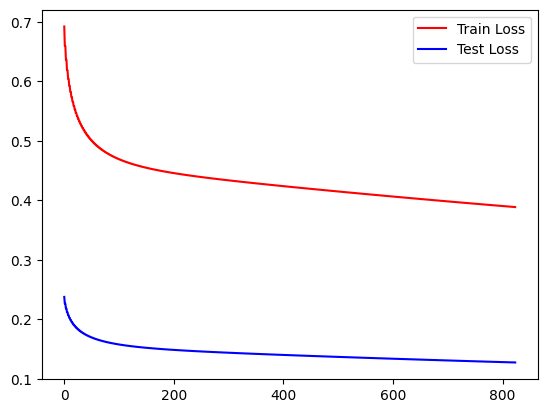

In [ ]:
plt.plot(losslisttrain, color="red",  label="Train Loss")
plt.plot(losslisttest,  color="blue", label="Test Loss")
plt.legend(loc="upper right")
plt.show()

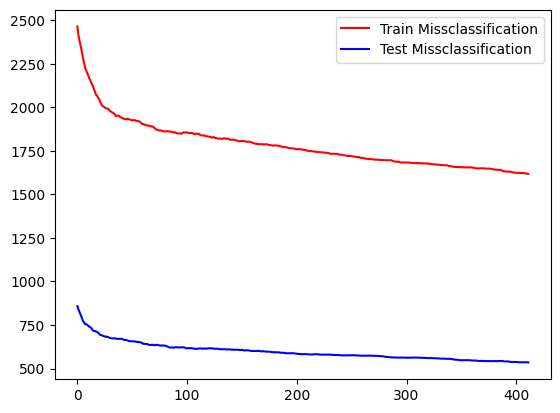

In [ ]:
plt.plot(acclisttrain, color="red",  label="Train Missclassification")
plt.plot(acclisttest,  color="blue", label="Test Missclassification")
plt.legend(loc="upper right")
plt.show()

In [ ]:
model = LogisticRegression(0.0001, 0.000000001, X_train, y_train, X_test, y_test)

In [ ]:
it = 0
losslisttrainbatch1 = []
losslisttestbatch1  = []
acclisttrainbatch1 = []
acclisttestbatch1 = []
while model.testModel() < 0.85:
  it += 1

  firstloss = model.calcLoss()
  firstlosstest = model.calcLossTest()

  print(firstloss)

  model.updateParamsScohastic(1)
  secloss = model.calcLoss()
  seclosstest = model.calcLossTest()

  print(secloss)

  losslisttrainbatch1.append(firstloss)
  losslisttrainbatch1.append(secloss)

  losslisttestbatch1.append(firstlosstest)
  losslisttestbatch1.append(seclosstest)

  acclisttrainbatch1.append((1-model.testModelWtrain()) * len(model.X_train))
  acclisttestbatch1.append((1-model.testModel()) * len(model.X_test))
  print("------------------")
  if it % 10 == 0:
    print("Accuracy:",model.testModel())
    print(len(losslisttrainbatch1))
    print(len(losslisttestbatch1))
    print(len(acclisttrainbatch1))
    print(len(acclisttestbatch1))

0.5170265212556803
0.5161904582406781
------------------
0.5161904582406781
0.5165679654902317
------------------
0.5165679654902317
0.517182861380205
------------------
0.517182861380205
0.5177023178418554
------------------
0.5177023178418554
0.5181819289671833
------------------
0.5181819289671833
0.5173420745050739
------------------
0.5173420745050739
0.5161366998474627
------------------
0.5161366998474627
0.5154740683627425
------------------
0.5154740683627425
0.5148115151937748
------------------
0.5148115151937748
0.5151702493555026
------------------
Accuracy: 0.8300196023522822
20
20
10
10
0.5151702493555026
0.5155212553494055
------------------
0.5155212553494055
0.5147862147368727
------------------
0.5147862147368727
0.5151626542035748
------------------
0.5151626542035748
0.5147467514518801
------------------
0.5147467514518801
0.5140910695601288
------------------
0.5140910695601288
0.5145586213304446
------------------
0.5145586213304446
0.5136436072508873
-----------

## Question C

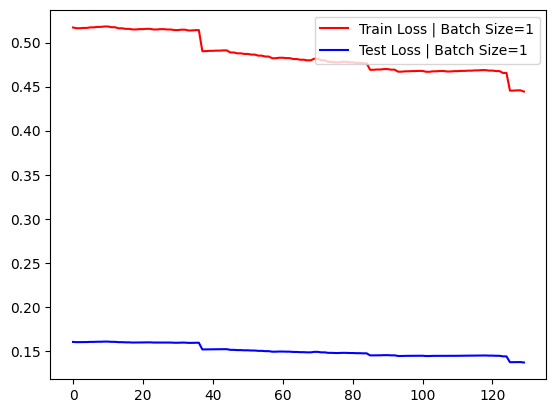

In [ ]:
plt.plot(losslisttrainbatch1, color="red",  label="Train Loss | Batch Size=1")
plt.plot(losslisttestbatch1,  color="blue", label="Test Loss | Batch Size=1")
plt.legend(loc="upper right")
plt.show()

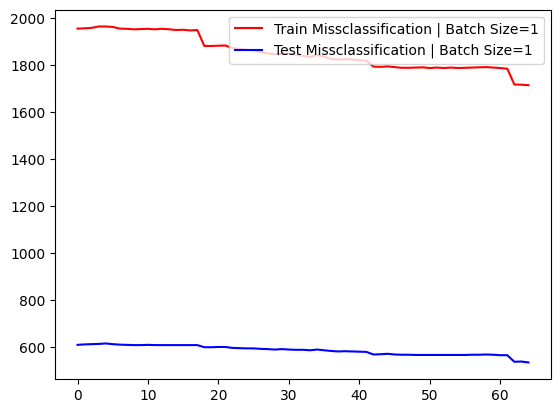

In [ ]:
plt.plot(acclisttrainbatch1, color="red",  label="Train Missclassification | Batch Size=1")
plt.plot(acclisttestbatch1,  color="blue", label="Test Missclassification | Batch Size=1")
plt.legend(loc="upper right")
plt.show()

In [ ]:
model = LogisticRegression(0.0001, 0.000000001, X_train, y_train, X_test, y_test)

In [ ]:
it = 0
losslisttrainbatch100 = []
losslisttestbatch100  = []
acclisttrainbatch100 = []
acclisttestbatch100 = []
while model.testModel() < 0.85:
  it += 1

  firstloss = model.calcLoss()
  firstlosstest = model.calcLossTest()

  print(firstloss)

  model.updateParamsScohastic(1)
  secloss = model.calcLoss()
  seclosstest = model.calcLossTest()

  print(secloss)

  losslisttrainbatch100.append(firstloss)
  losslisttrainbatch100.append(secloss)

  losslisttestbatch100.append(firstlosstest)
  losslisttestbatch100.append(seclosstest)

  acclisttrainbatch100.append((1-model.testModelWtrain()) * len(model.X_train))
  acclisttestbatch100.append((1-model.testModel()) * len(model.X_test))
  print("------------------")
  if it % 10 == 0:
    print("Accuracy:",model.testModel())
    print(len(losslisttrainbatch100))
    print(len(losslisttestbatch100))
    print(len(acclisttrainbatch100))
    print(len(acclisttestbatch100))

1.389041138451818
1.3879637989292994
------------------
1.3879637989292994
1.3893298209554088
------------------
1.3893298209554088
1.3884687858690512
------------------
1.3884687858690512
1.3883114642592804
------------------
1.3883114642592804
1.3889009785729347
------------------
1.3889009785729347
1.389321492986218
------------------
1.389321492986218
1.3872342525910837
------------------
1.3872342525910837
1.3865414513872067
------------------
1.3865414513872067
1.3867825766318909
------------------
1.3867825766318909
1.3321620812141344
------------------
Accuracy: 0.5875105012601513
20
20
10
10
1.3321620812141344
1.330489076169688
------------------
1.330489076169688
1.3306596023804627
------------------
1.3306596023804627
1.330915718295189
------------------
1.330915718295189
1.3309642220408333
------------------
1.3309642220408333
1.325146842836308
------------------
1.325146842836308
1.325511822482012
------------------
1.325511822482012
1.325755135617987
------------------
1.

## Question D

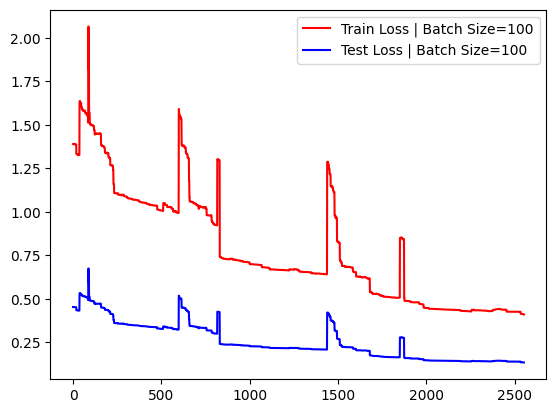

In [ ]:
plt.plot(losslisttrainbatch100, color="red",  label="Train Loss | Batch Size=100")
plt.plot(losslisttestbatch100,  color="blue", label="Test Loss | Batch Size=100")
plt.legend(loc="upper right")
plt.show()

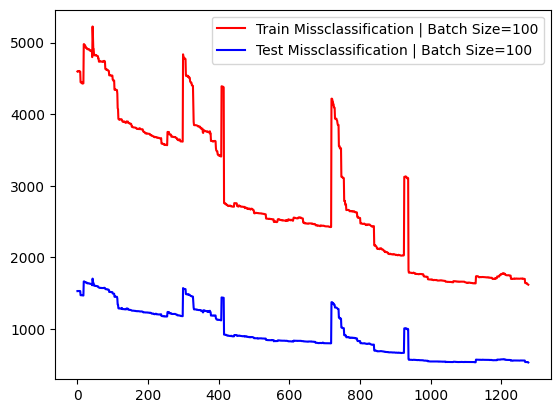

In [ ]:
plt.plot(acclisttrainbatch100, color="red",  label="Train Missclassification | Batch Size=100")
plt.plot(acclisttestbatch100,  color="blue", label="Test Missclassification | Batch Size=100")
plt.legend(loc="upper right")
plt.show()

## Save Parameters

In [ ]:
# with open("params.npy", "wb") as file:
#   np.save(file, model.w)
#   np.save(file, model.b)

## Darker places resemble a 2, and this is sensible because 2 is represented with -1. Lighter places of the weights image resemble a 7, and again this is senbile because 7 is represented with 1.

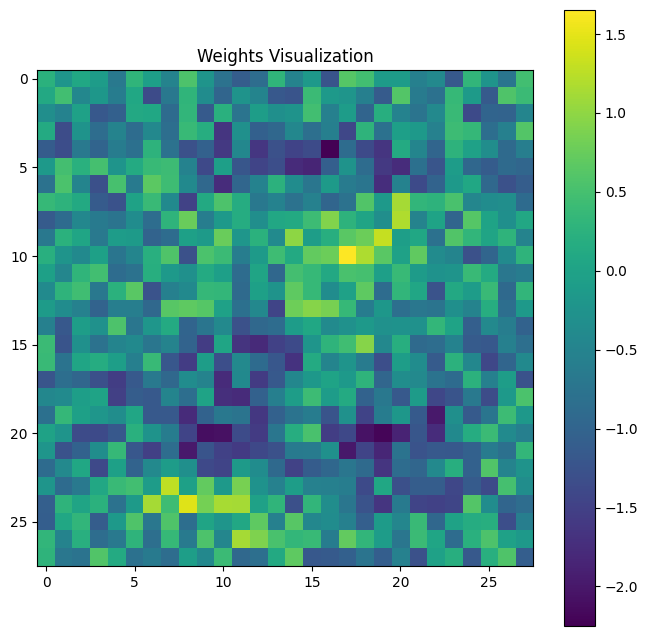

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

weights_grid = model.w.reshape(28, 28) + model.b

plt.figure(figsize=(8, 8))
plt.imshow(weights_grid, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Weights Visualization')
plt.show()

## Unsuccessful Predictions on Both Train and Test Dataset

I don't think model complexity is enough to predict these, because even I get confused while trying to predict these. These are like doctor writings.

Prediction: 2 Truth: 7


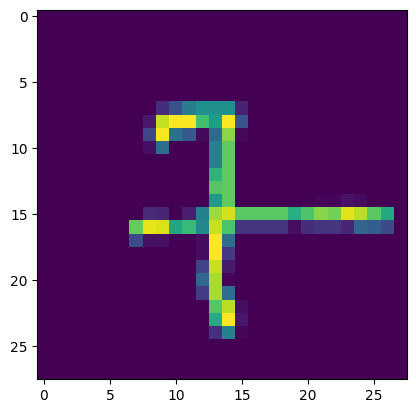

Prediction: 2 Truth: 7


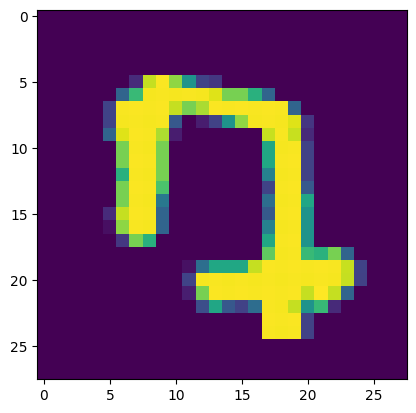

Prediction: 2 Truth: 7


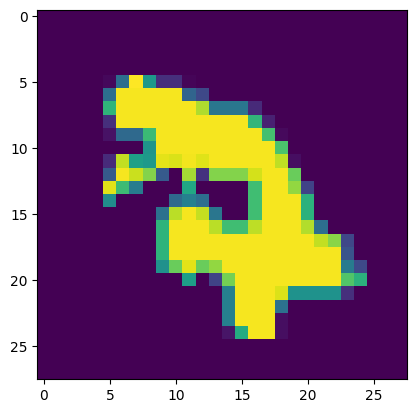

Prediction: 7 Truth: 2


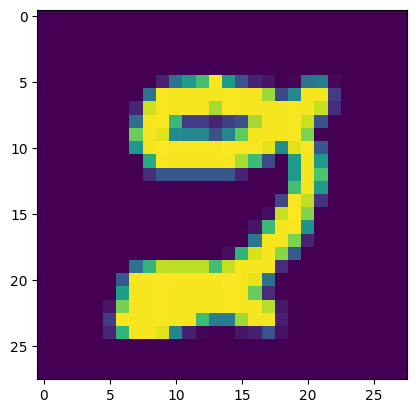

Prediction: 2 Truth: 7


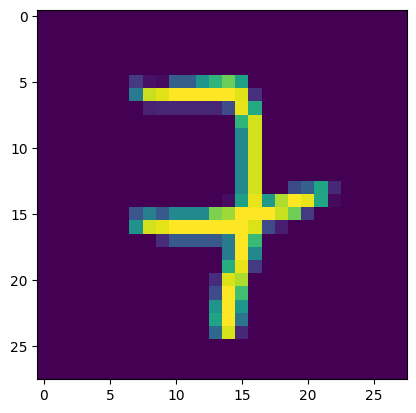

Prediction: 7 Truth: 2


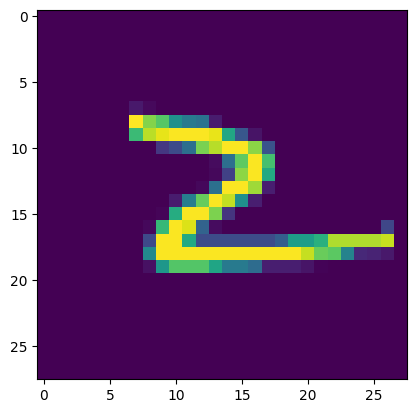

Prediction: 2 Truth: 7


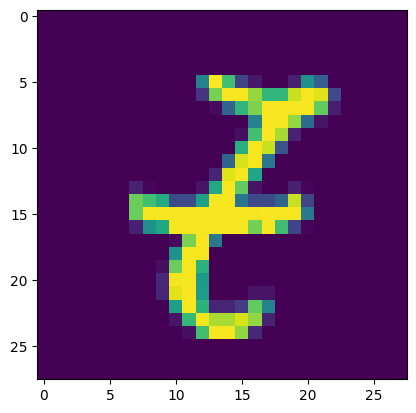

Prediction: 7 Truth: 2


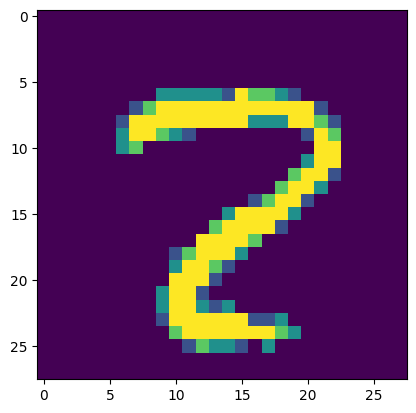

Prediction: 7 Truth: 2


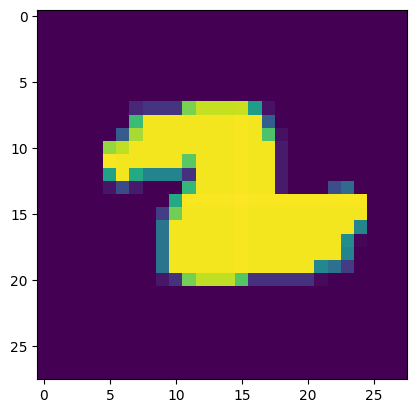

Prediction: 7 Truth: 2


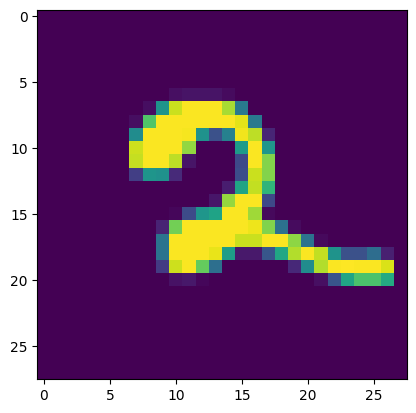

Prediction: 2 Truth: 7


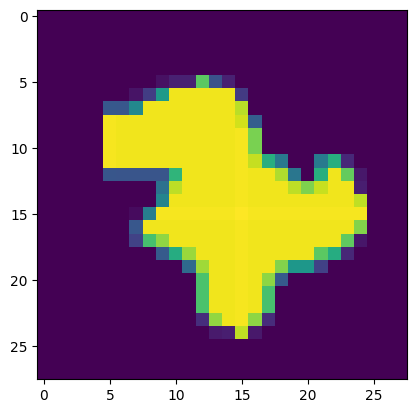

Prediction: 2 Truth: 7


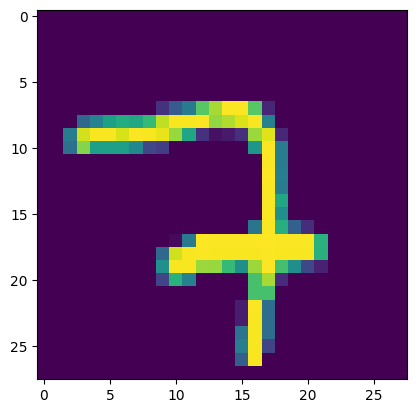

Prediction: 2 Truth: 7


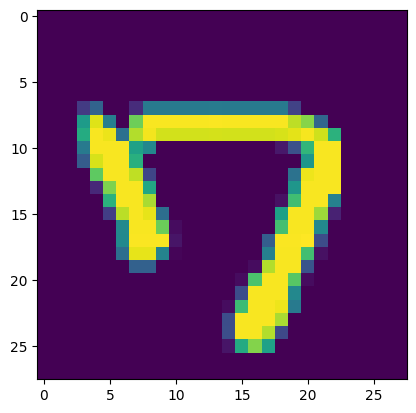

Prediction: 2 Truth: 7


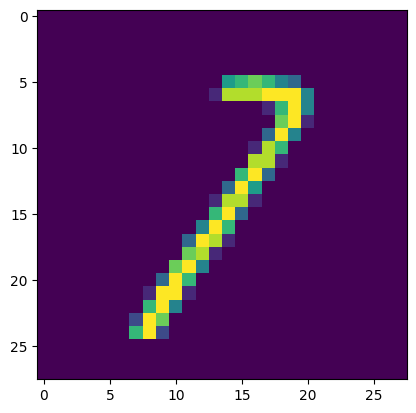

Prediction: 2 Truth: 7


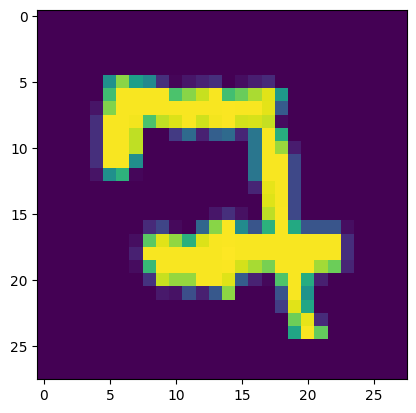

Prediction: 7 Truth: 2


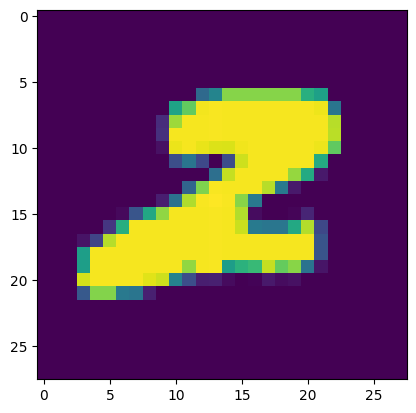

Prediction: 7 Truth: 2


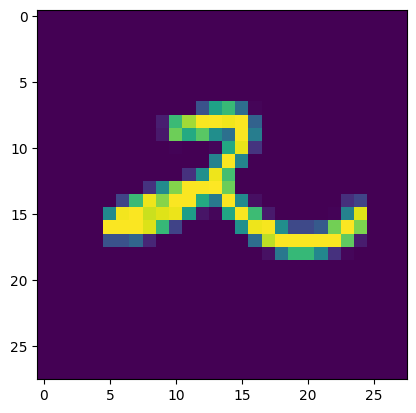

Prediction: 2 Truth: 7


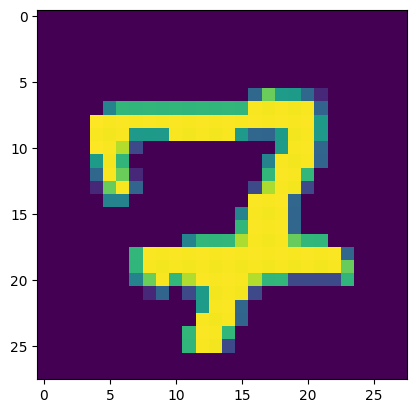

Prediction: 7 Truth: 2


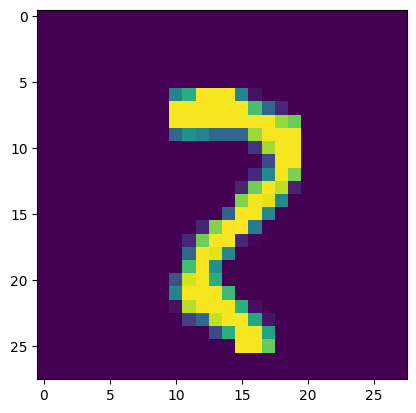

Prediction: 2 Truth: 7


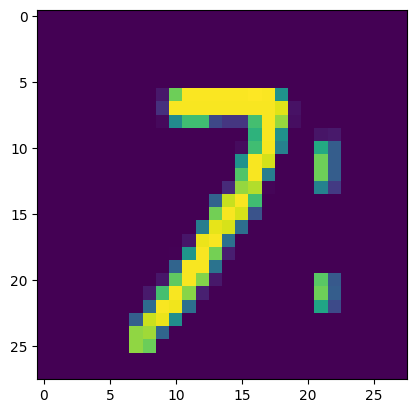

Prediction: 7 Truth: 2


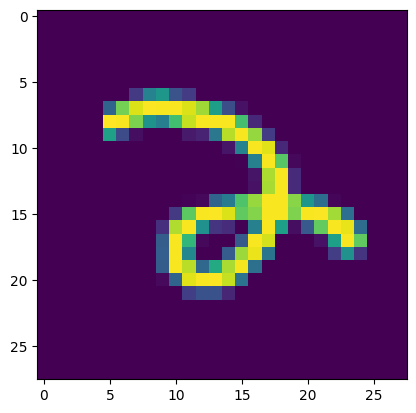

Prediction: 7 Truth: 2


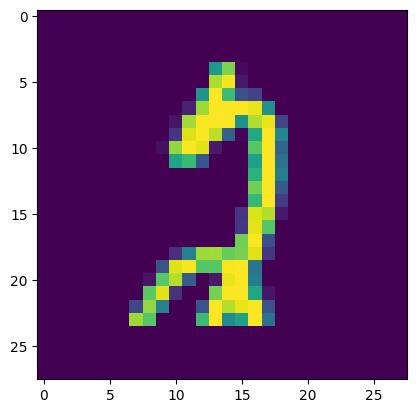

Prediction: 2 Truth: 7


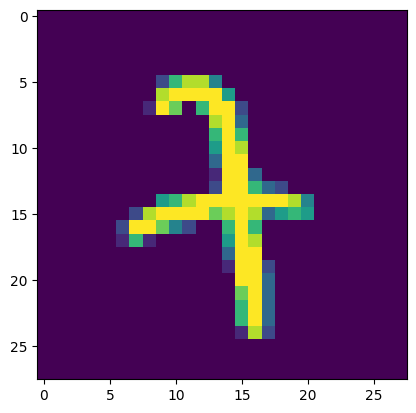

Prediction: 7 Truth: 2


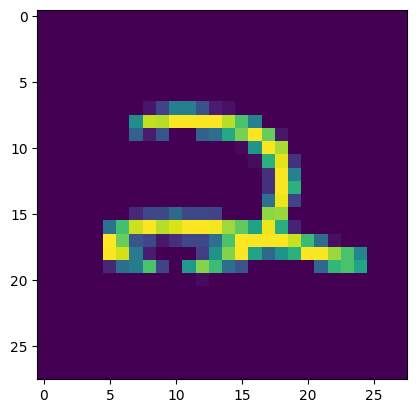

Prediction: 2 Truth: 7


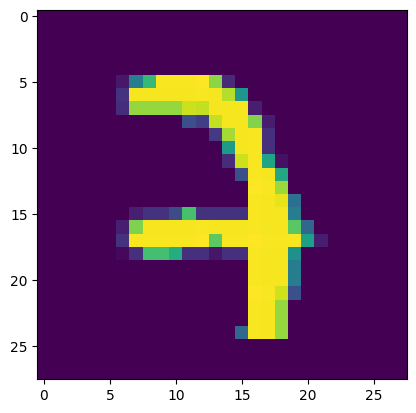

Prediction: 7 Truth: 2


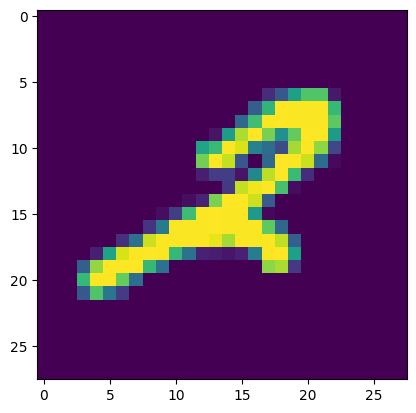

Prediction: 7 Truth: 2


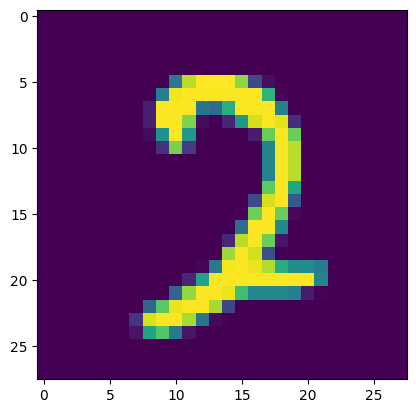

Prediction: 7 Truth: 2


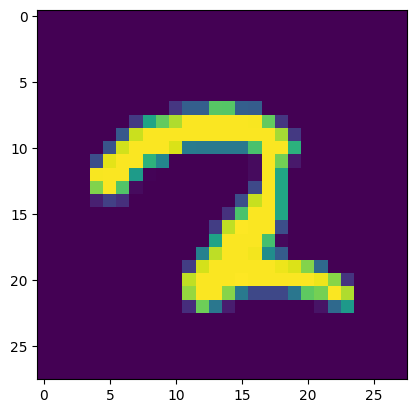

Prediction: 2 Truth: 7


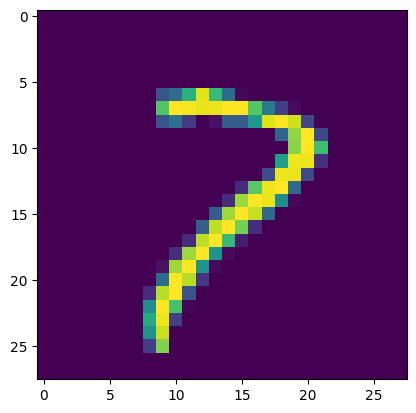

Prediction: 7 Truth: 2


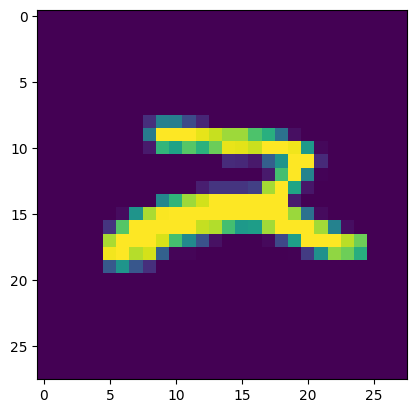

Prediction: 2 Truth: 7


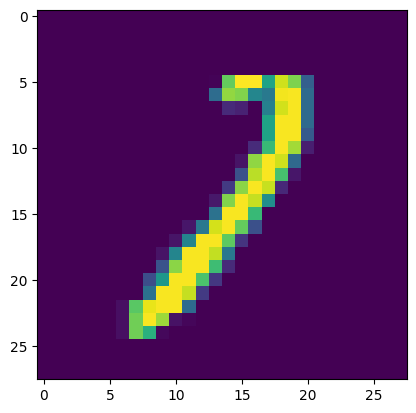

Prediction: 2 Truth: 7


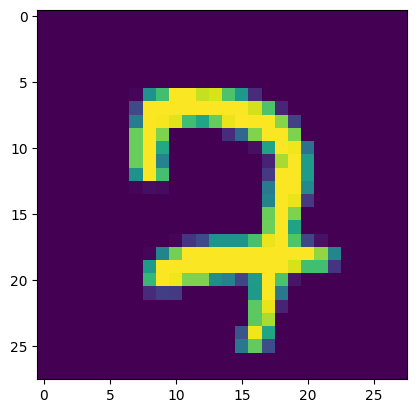

Prediction: 7 Truth: 2


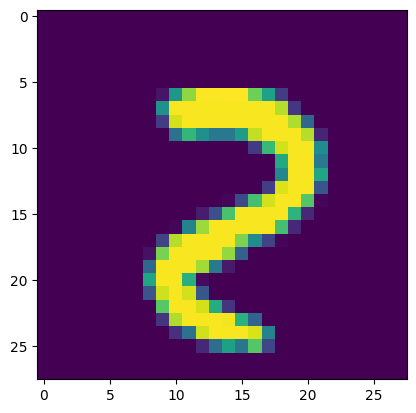

Prediction: 2 Truth: 7


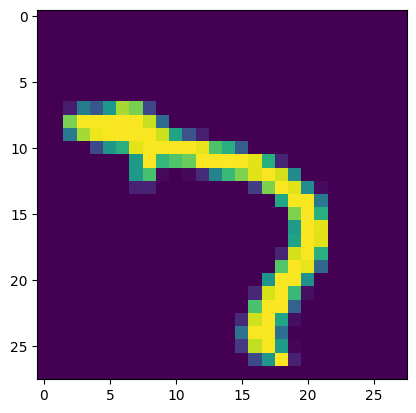

Prediction: 2 Truth: 7


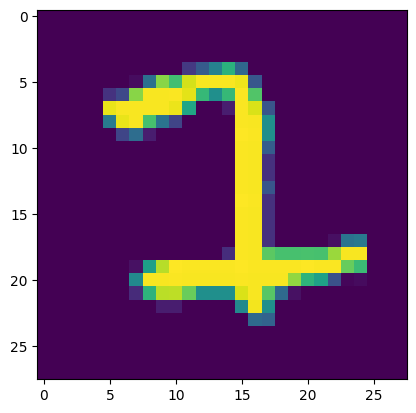

Prediction: 7 Truth: 2


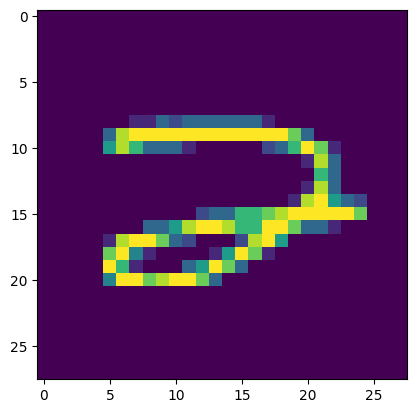

Prediction: 2 Truth: 7


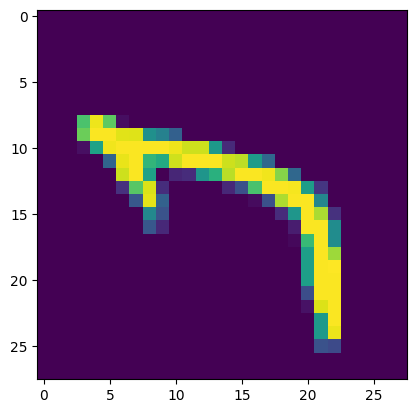

Prediction: 7 Truth: 2


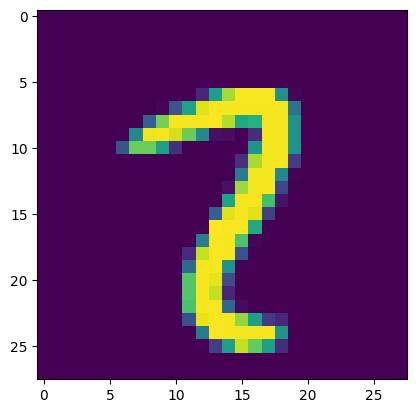

Prediction: 7 Truth: 2


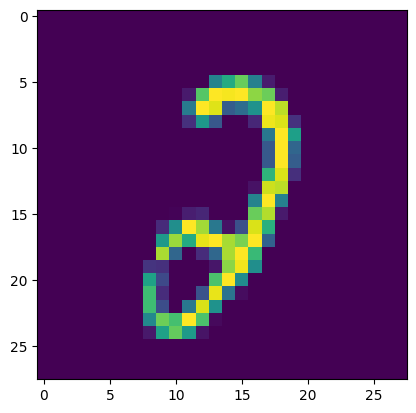

Prediction: 7 Truth: 2


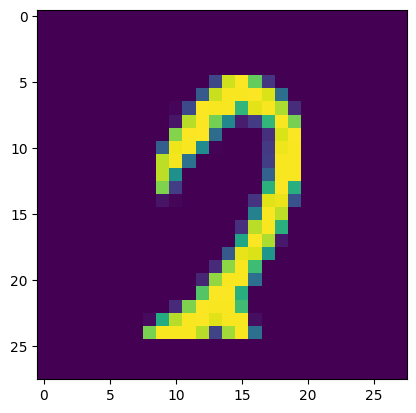

Prediction: 7 Truth: 2


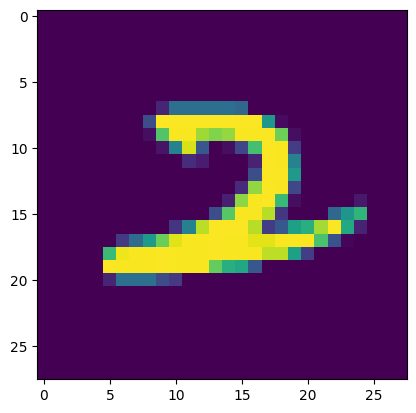

Prediction: 2 Truth: 7


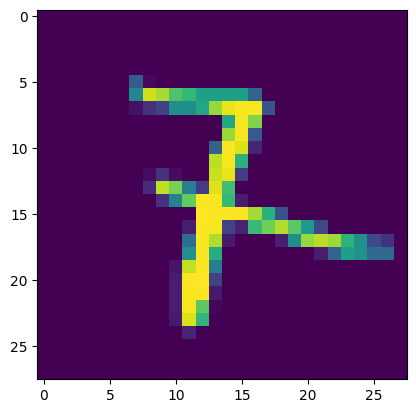

Prediction: 7 Truth: 2


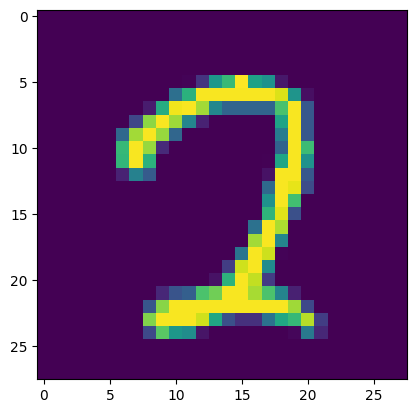

Prediction: 7 Truth: 2


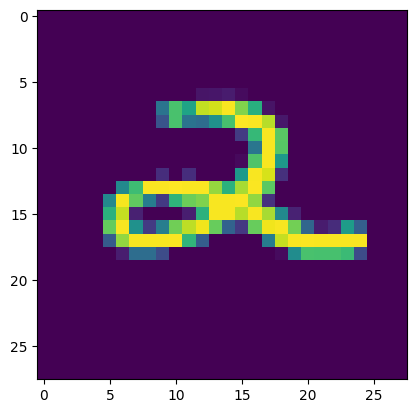

Prediction: 7 Truth: 2


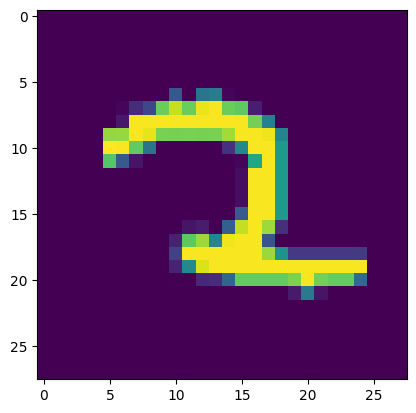

Prediction: 7 Truth: 2


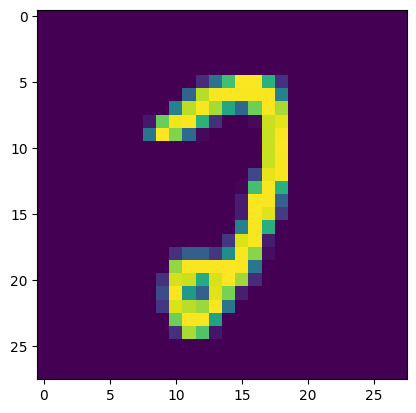

Prediction: 7 Truth: 2


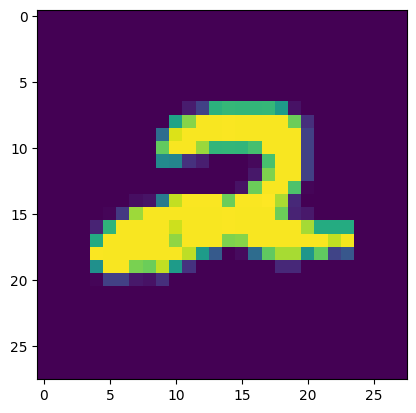

Prediction: 7 Truth: 2


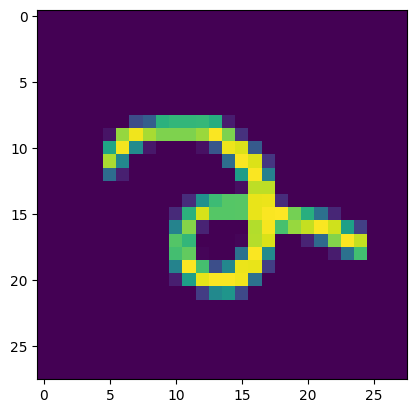

Prediction: 2 Truth: 7


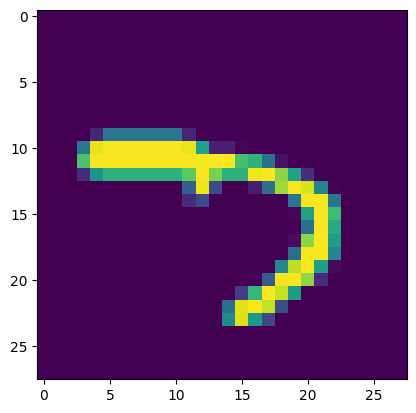

Prediction: 7 Truth: 2


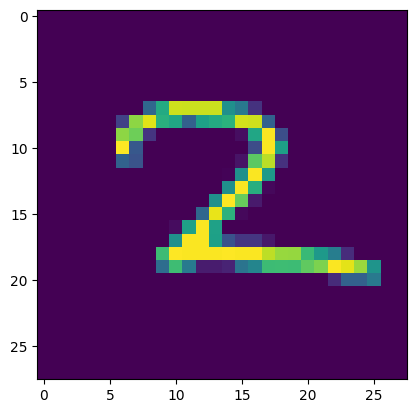

Prediction: 7 Truth: 2


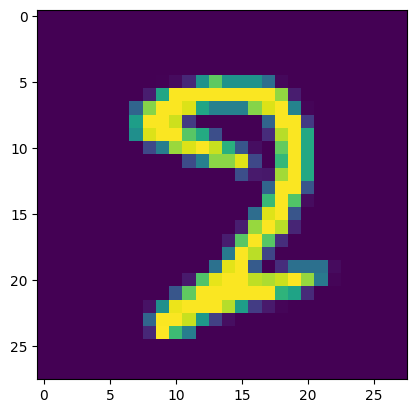

Prediction: 7 Truth: 2


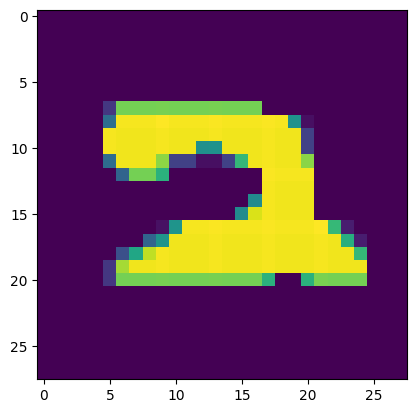

Prediction: 7 Truth: 2


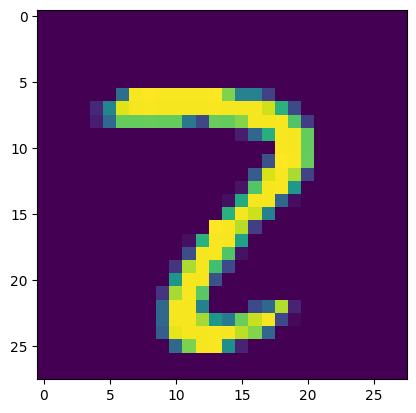

Prediction: 7 Truth: 2


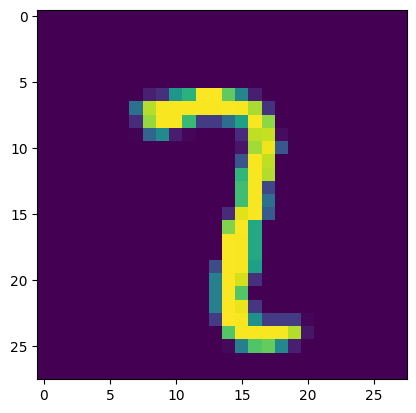

Prediction: 7 Truth: 2


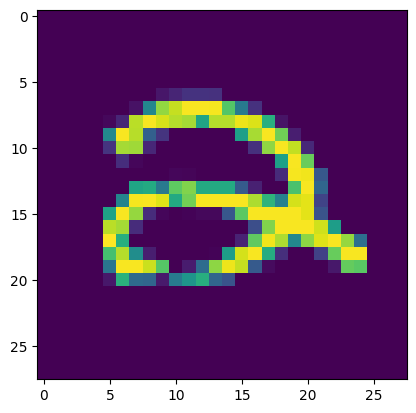

Prediction: 7 Truth: 2


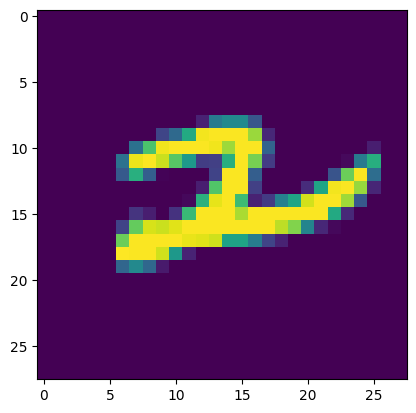

Prediction: 2 Truth: 7


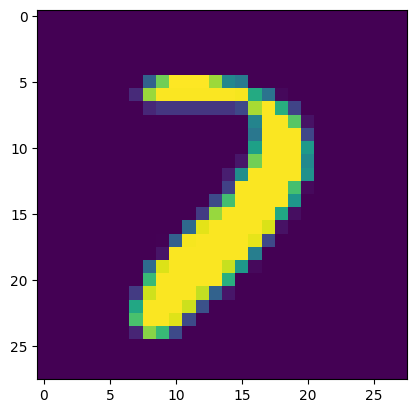

Prediction: 2 Truth: 7


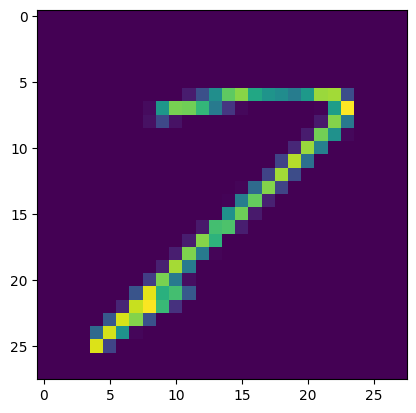

Prediction: 2 Truth: 7


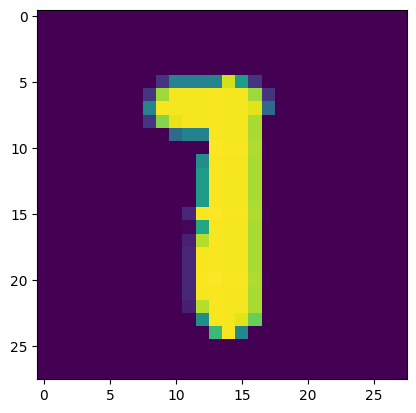

Prediction: 2 Truth: 7


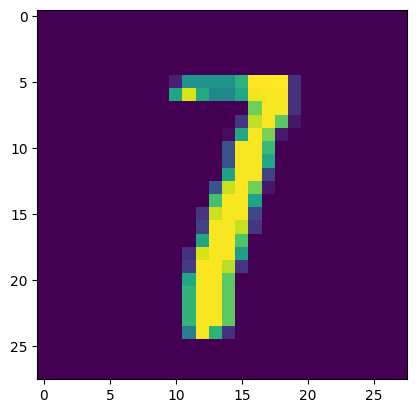

Prediction: 2 Truth: 7


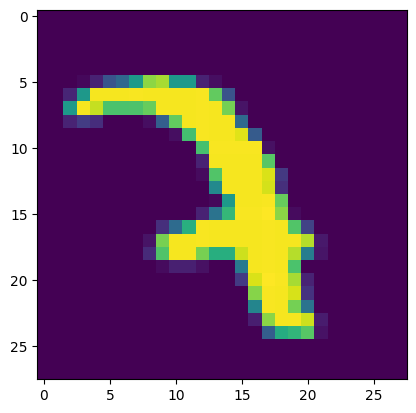

Prediction: 7 Truth: 2


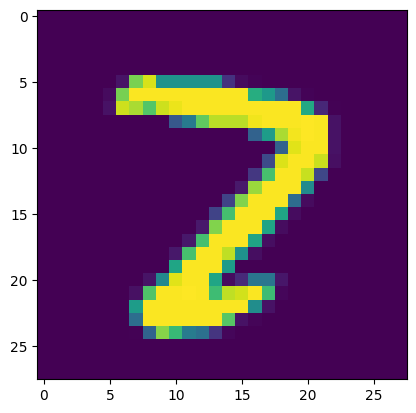

Prediction: 7 Truth: 2


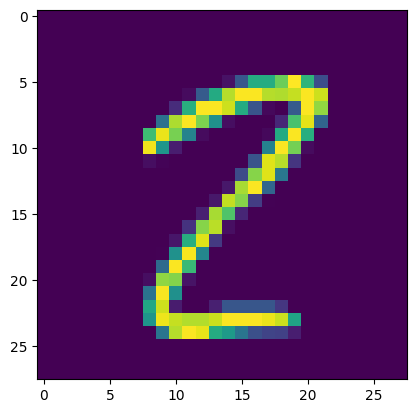

63


In [ ]:
count = 0
for i, e in enumerate(y_test):
  x = X_test[i]
  prediction = model.predict(x)
  if prediction != e:
    count += 1
    print("Prediction:",2 if prediction==-1 else 7,"Truth:",2 if e==-1 else 7)
    plt.imshow(x.reshape(28,28))
    plt.show()
print(count)

Prediction: 7 Truth: 2


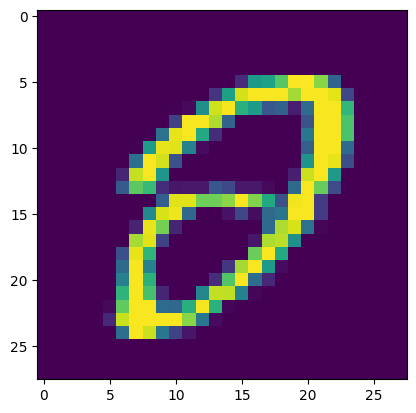

Prediction: 7 Truth: 2


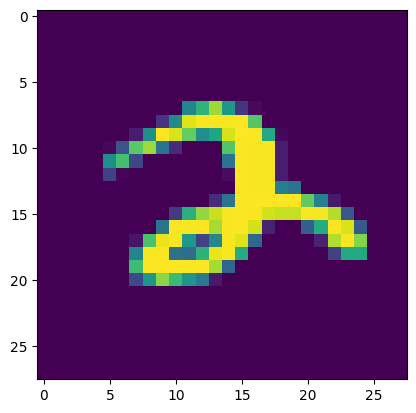

Prediction: 2 Truth: 7


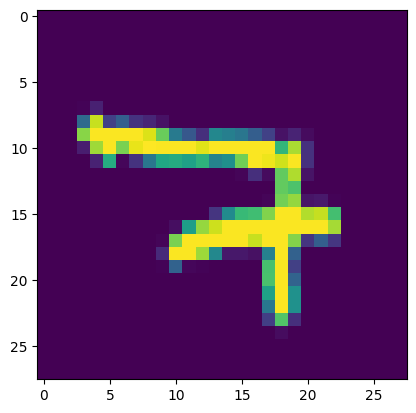

Prediction: 2 Truth: 7


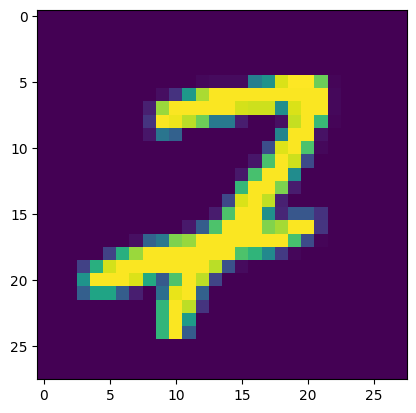

Prediction: 7 Truth: 2


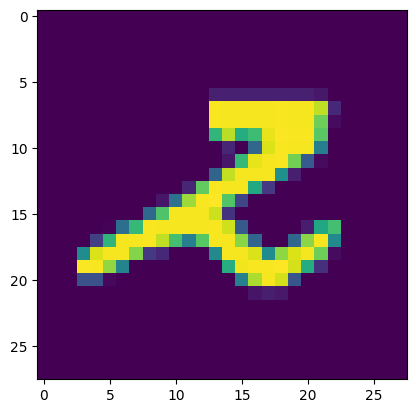

Prediction: 2 Truth: 7


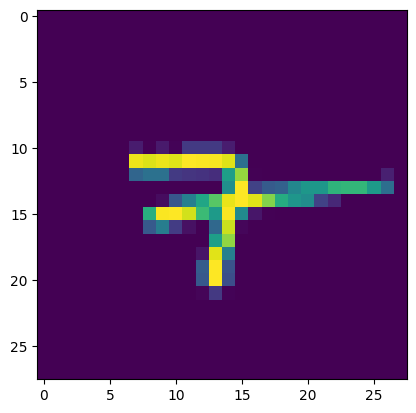

Prediction: 2 Truth: 7


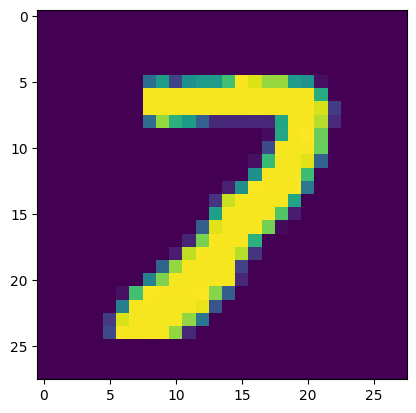

Prediction: 2 Truth: 7


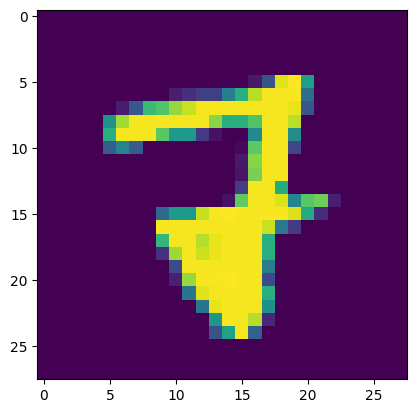

Prediction: 7 Truth: 2


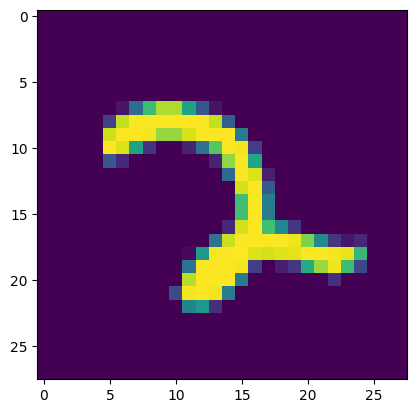

Prediction: 7 Truth: 2


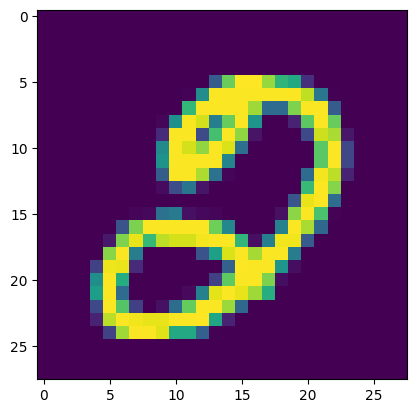

Prediction: 7 Truth: 2


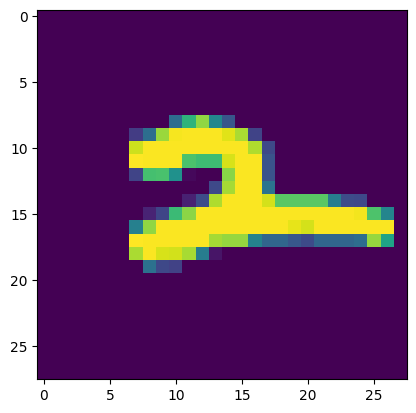

Prediction: 7 Truth: 2


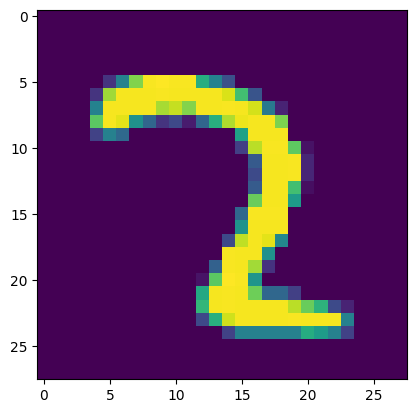

Prediction: 2 Truth: 7


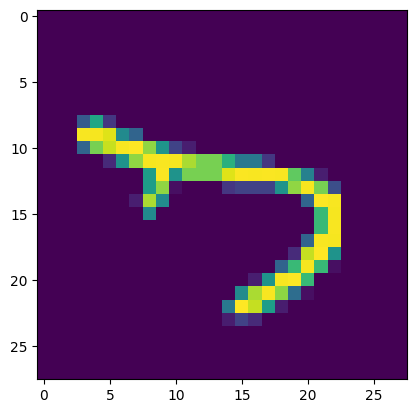

Prediction: 2 Truth: 7


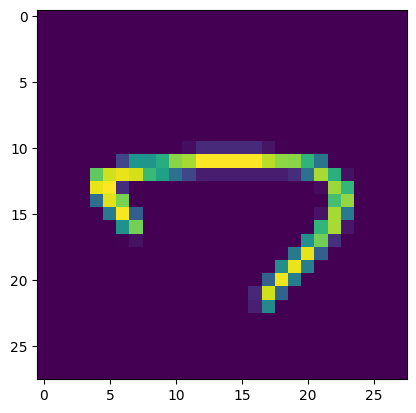

Prediction: 2 Truth: 7


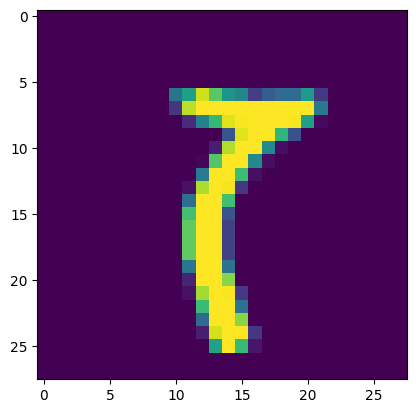

Prediction: 7 Truth: 2


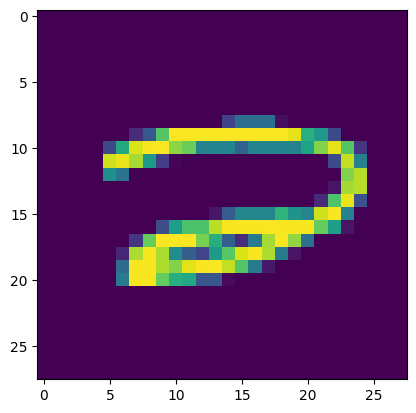

Prediction: 7 Truth: 2


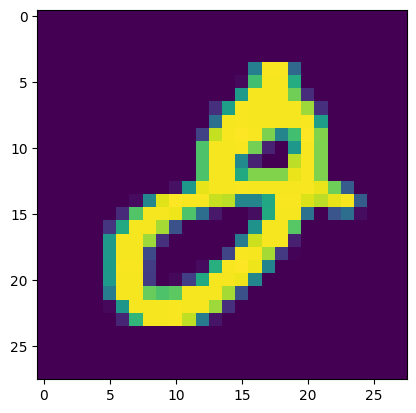

Prediction: 7 Truth: 2


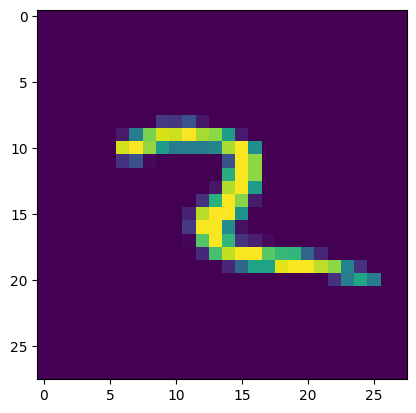

Prediction: 2 Truth: 7


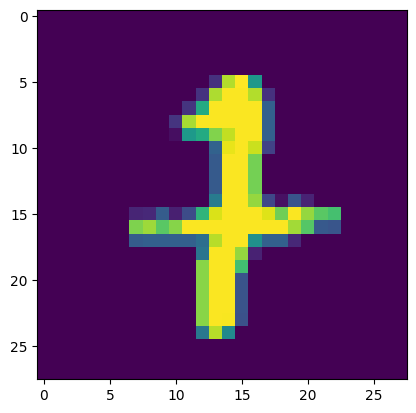

Prediction: 2 Truth: 7


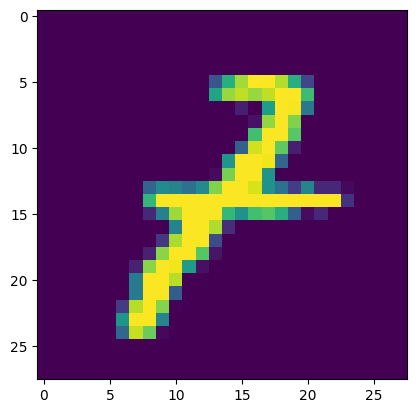

Prediction: 2 Truth: 7


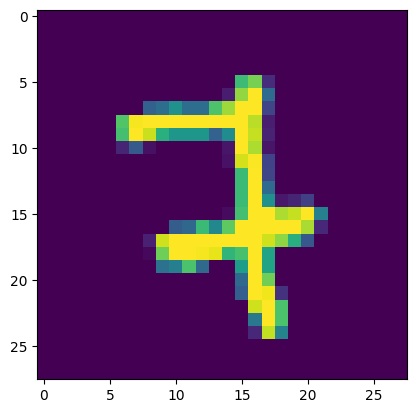

Prediction: 7 Truth: 2


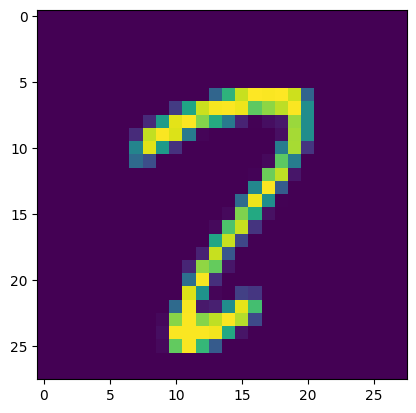

Prediction: 7 Truth: 2


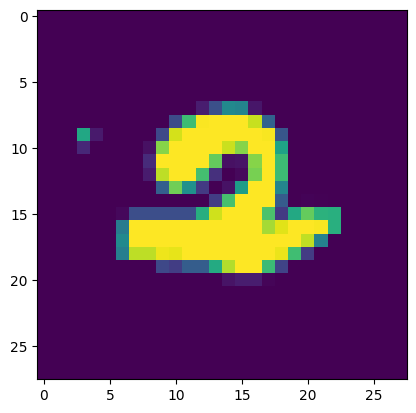

Prediction: 2 Truth: 7


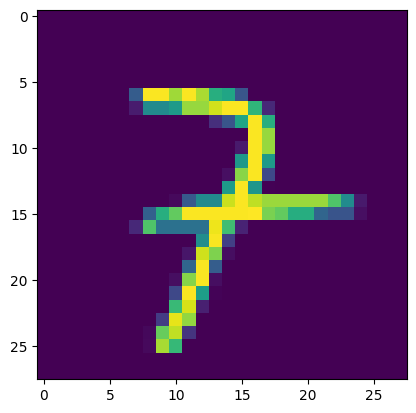

Prediction: 7 Truth: 2


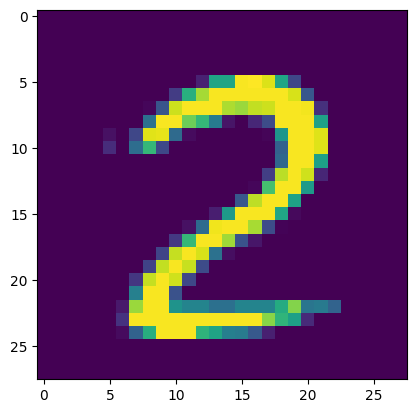

Prediction: 7 Truth: 2


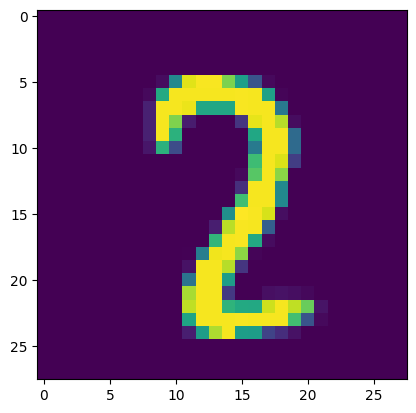

Prediction: 2 Truth: 7


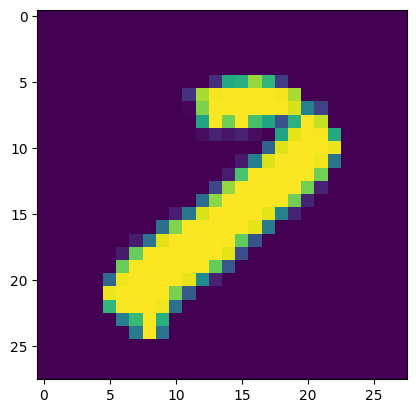

Prediction: 7 Truth: 2


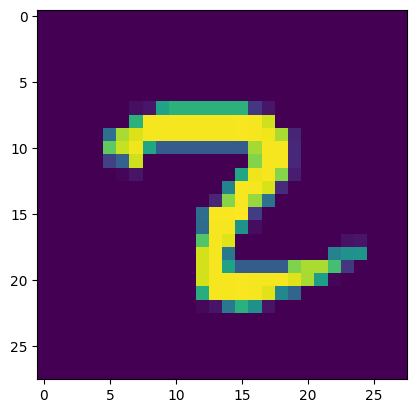

Prediction: 2 Truth: 7


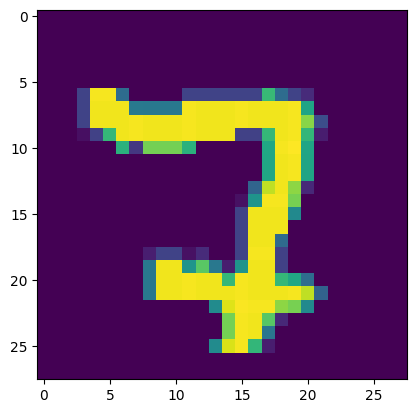

Prediction: 7 Truth: 2


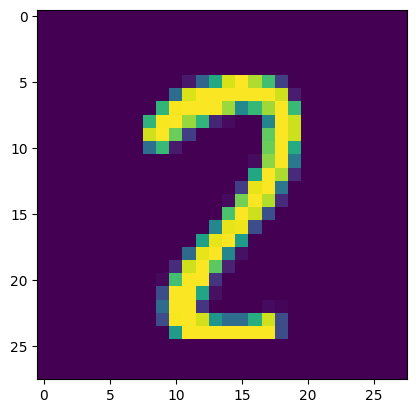

Prediction: 7 Truth: 2


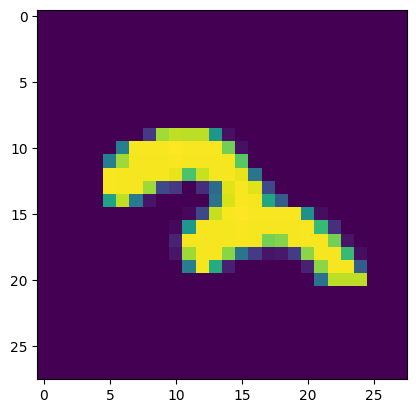

Prediction: 7 Truth: 2


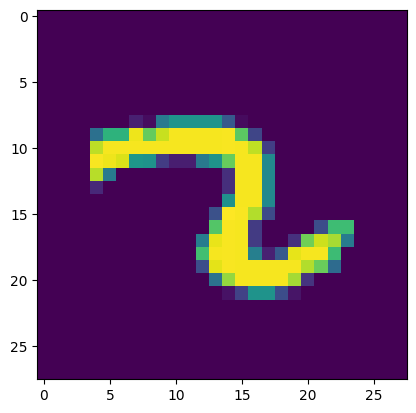

Prediction: 7 Truth: 2


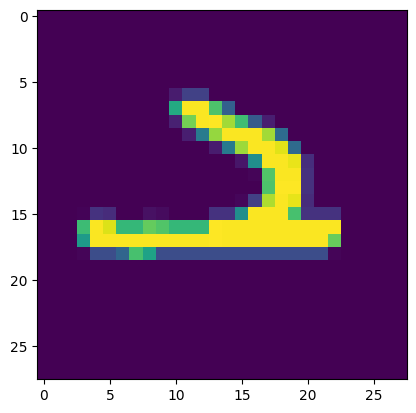

Prediction: 2 Truth: 7


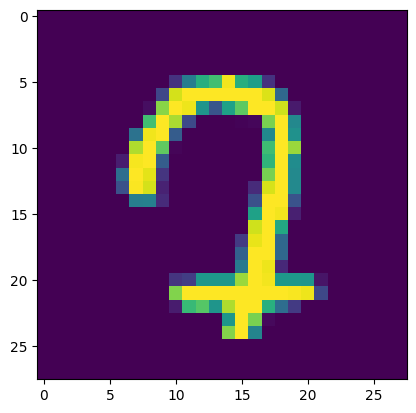

Prediction: 2 Truth: 7


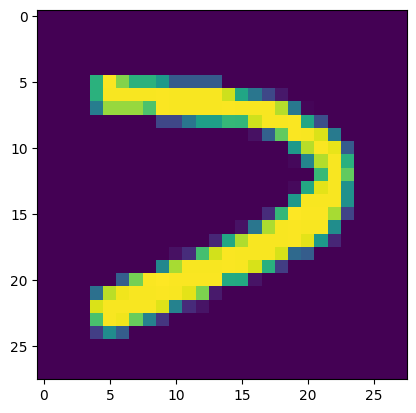

Prediction: 7 Truth: 2


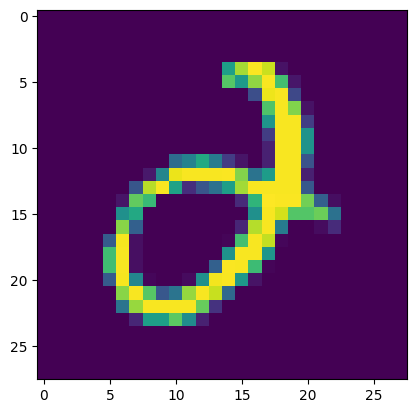

Prediction: 7 Truth: 2


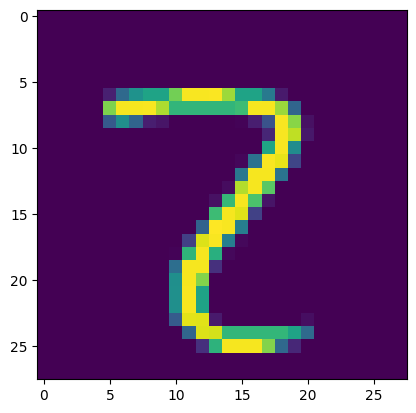

Prediction: 7 Truth: 2


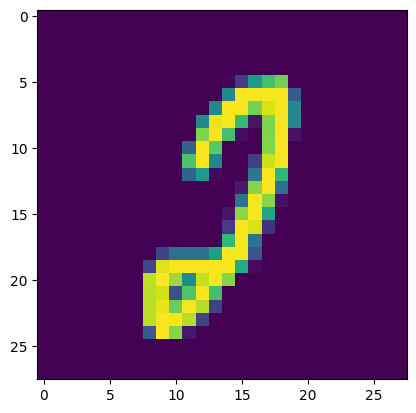

Prediction: 7 Truth: 2


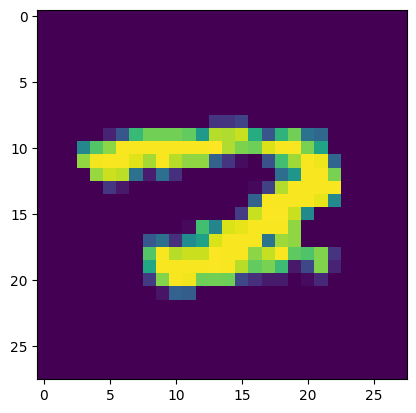

Prediction: 2 Truth: 7


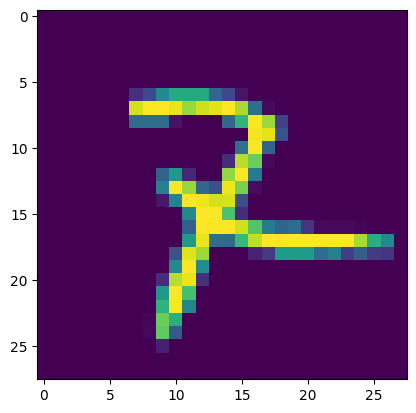

Prediction: 2 Truth: 7


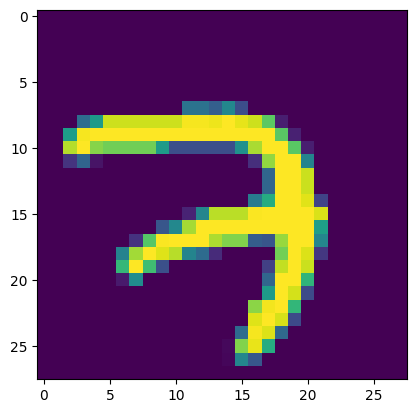

Prediction: 7 Truth: 2


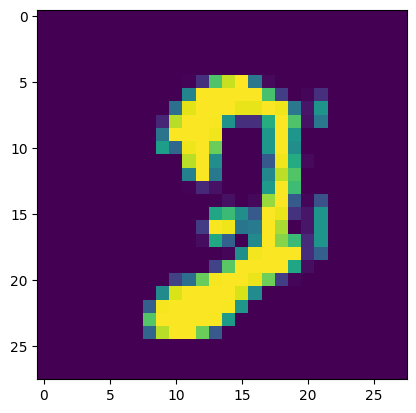

Prediction: 2 Truth: 7


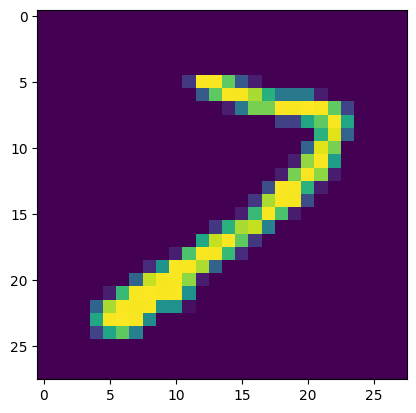

Prediction: 2 Truth: 7


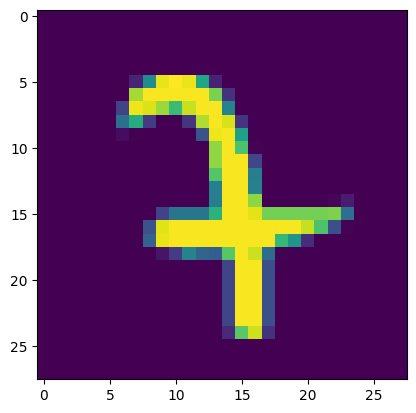

Prediction: 7 Truth: 2


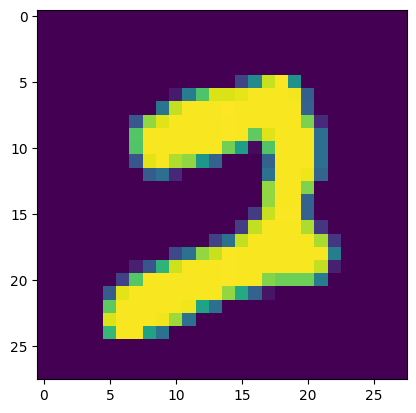

Prediction: 2 Truth: 7


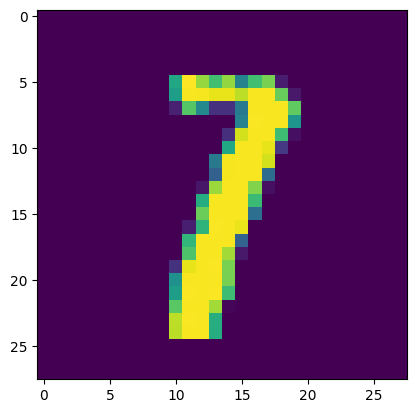

Prediction: 2 Truth: 7


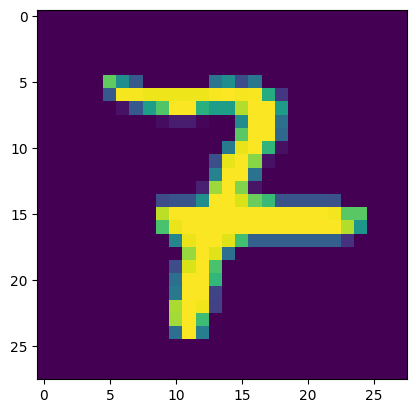

Prediction: 2 Truth: 7


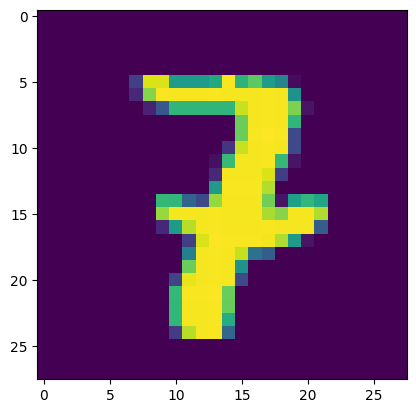

Prediction: 7 Truth: 2


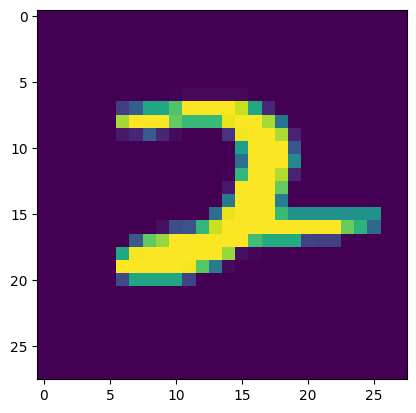

Prediction: 2 Truth: 7


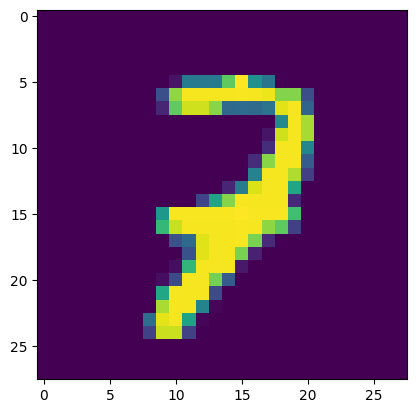

Prediction: 7 Truth: 2


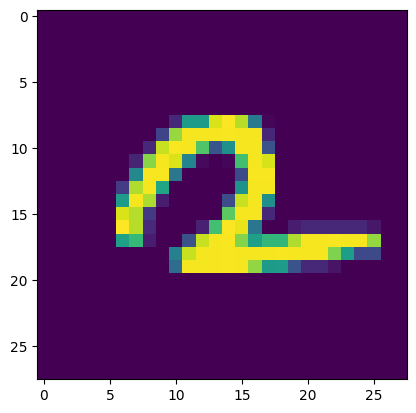

Prediction: 2 Truth: 7


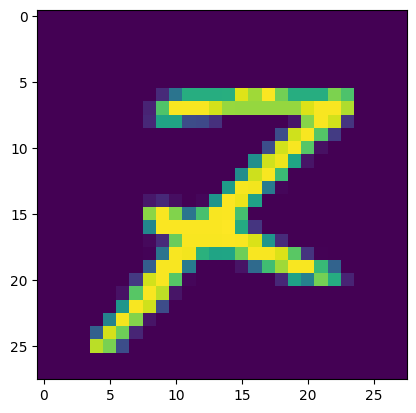

Prediction: 2 Truth: 7


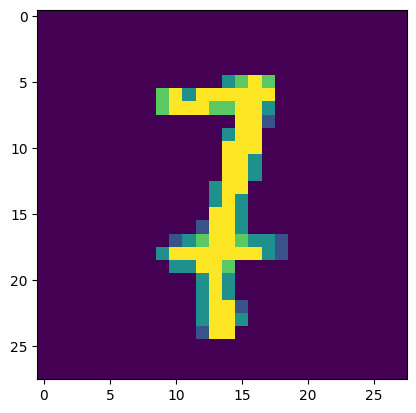

Prediction: 7 Truth: 2


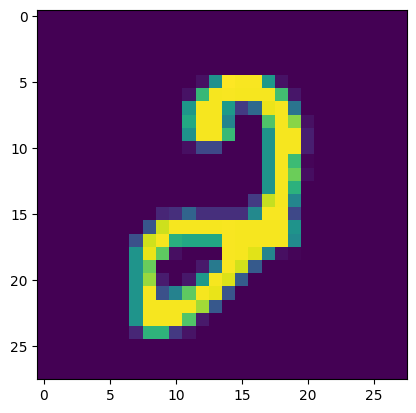

Prediction: 2 Truth: 7


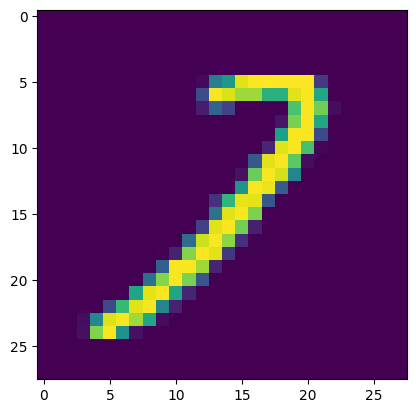

Prediction: 2 Truth: 7


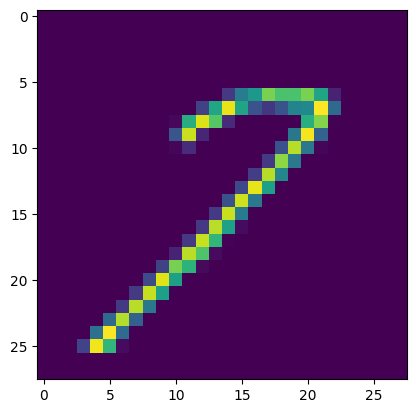

Prediction: 2 Truth: 7


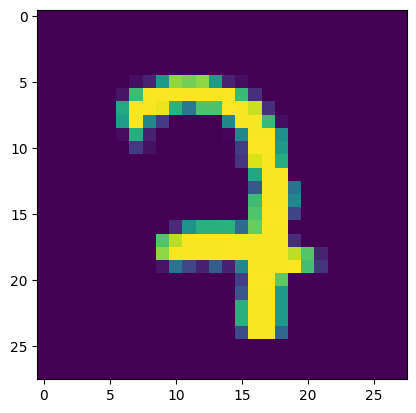

Prediction: 2 Truth: 7


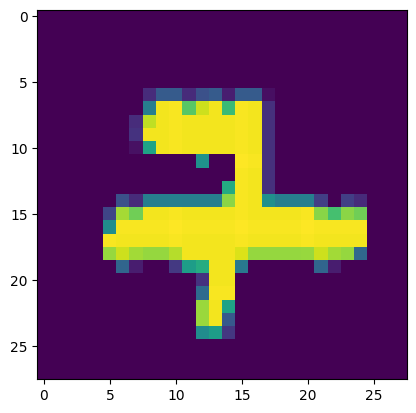

Prediction: 7 Truth: 2


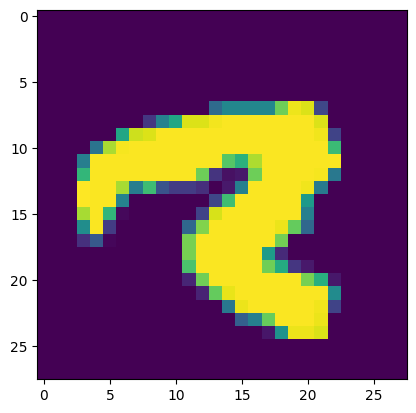

Prediction: 7 Truth: 2


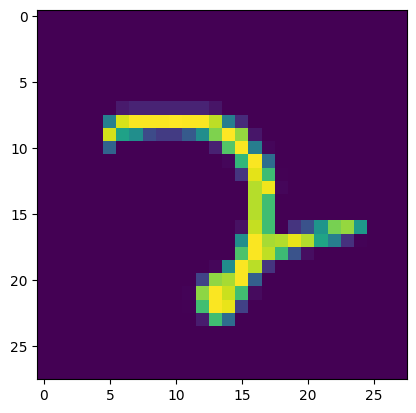

Prediction: 7 Truth: 2


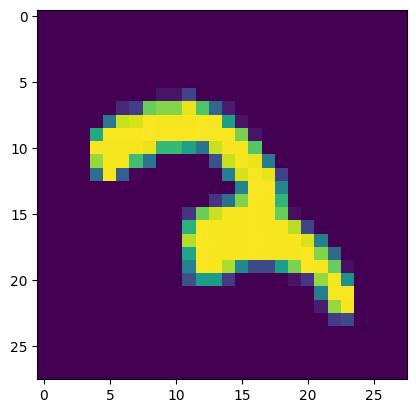

Prediction: 7 Truth: 2


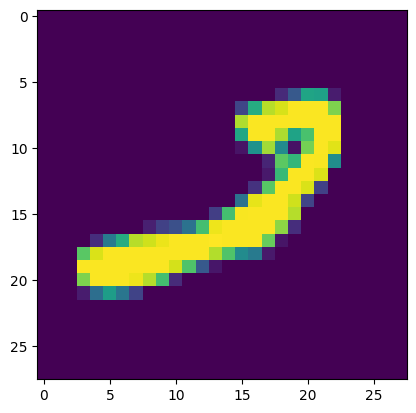

Prediction: 7 Truth: 2


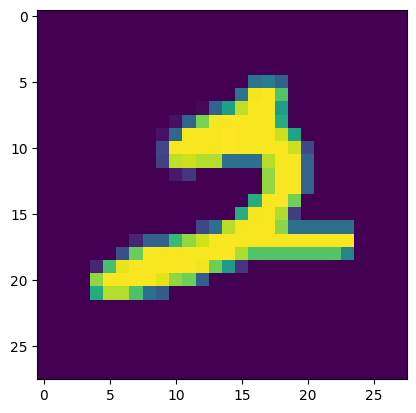

Prediction: 7 Truth: 2


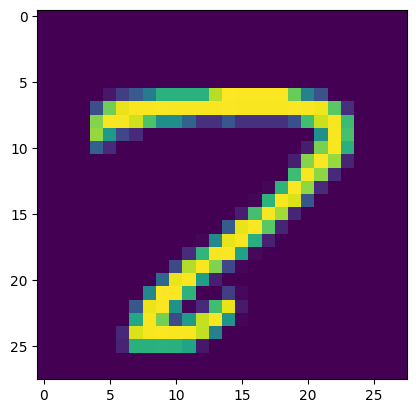

Prediction: 2 Truth: 7


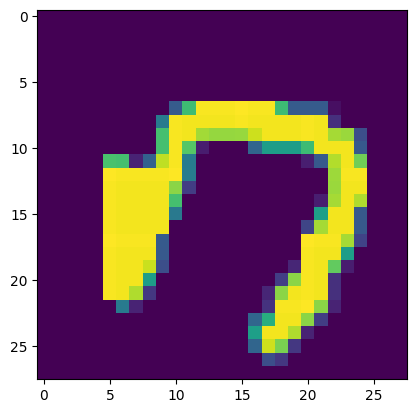

Prediction: 7 Truth: 2


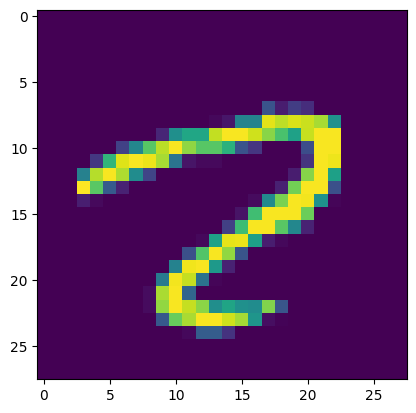

Prediction: 2 Truth: 7


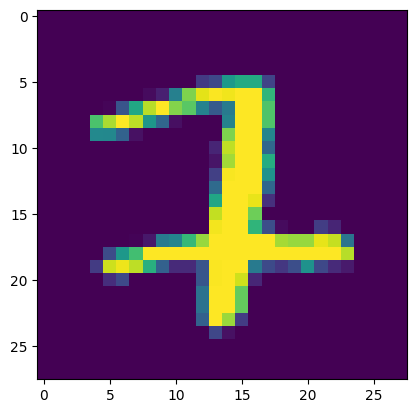

Prediction: 2 Truth: 7


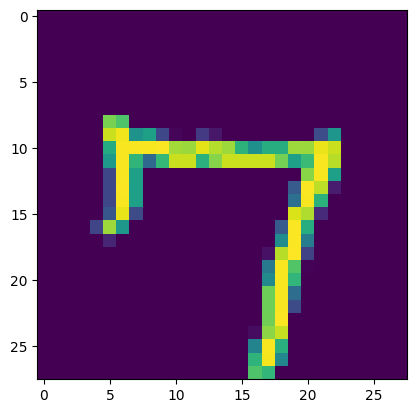

Prediction: 7 Truth: 2


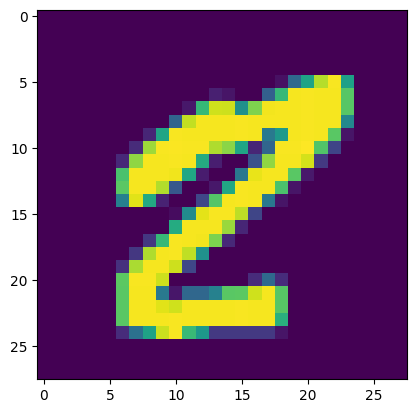

Prediction: 7 Truth: 2


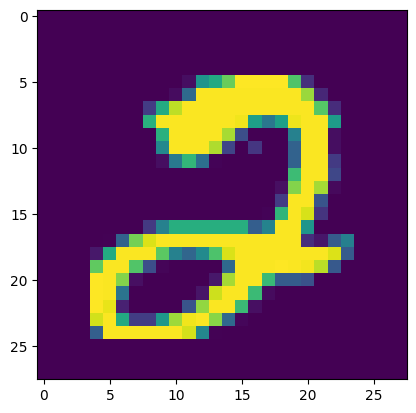

Prediction: 7 Truth: 2


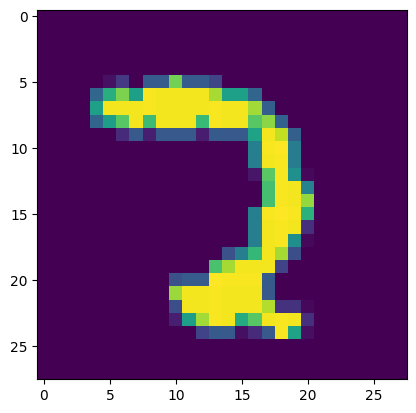

Prediction: 2 Truth: 7


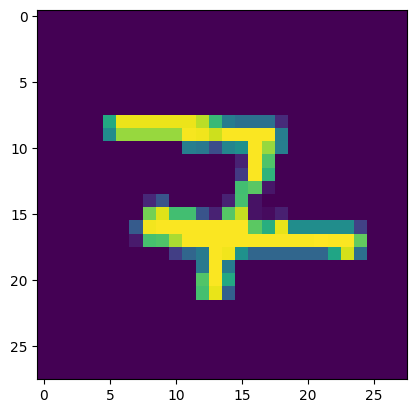

Prediction: 2 Truth: 7


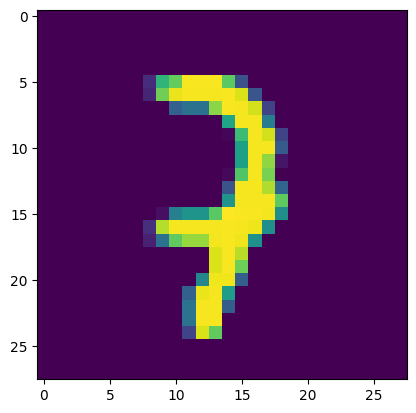

Prediction: 7 Truth: 2


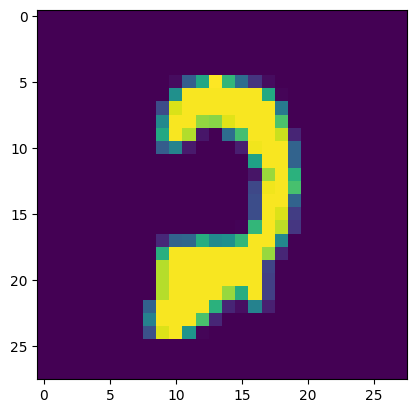

Prediction: 7 Truth: 2


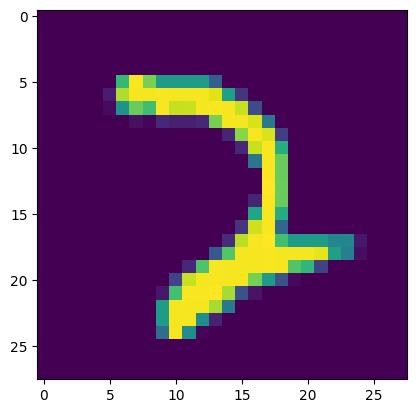

Prediction: 7 Truth: 2


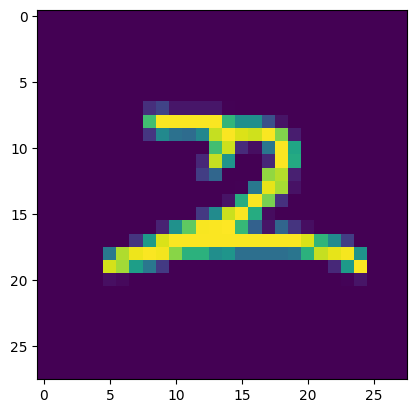

Prediction: 2 Truth: 7


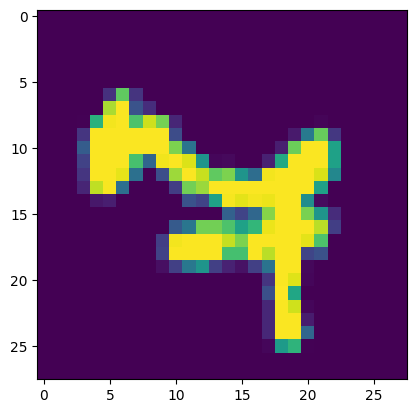

Prediction: 7 Truth: 2


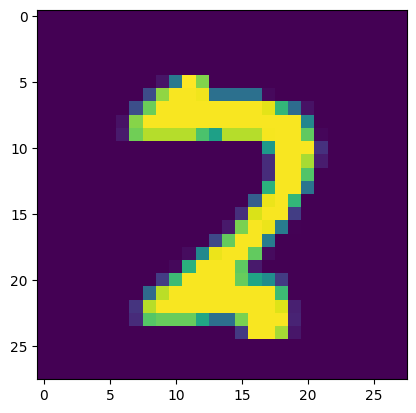

Prediction: 7 Truth: 2


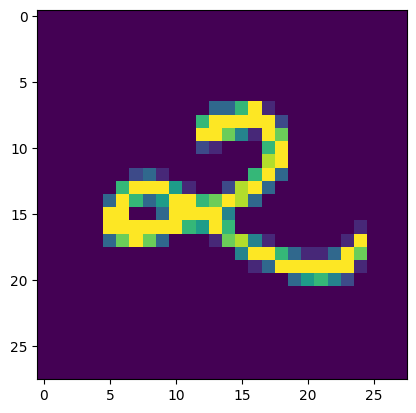

Prediction: 2 Truth: 7


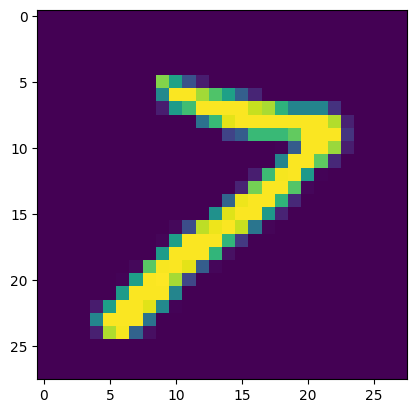

Prediction: 2 Truth: 7


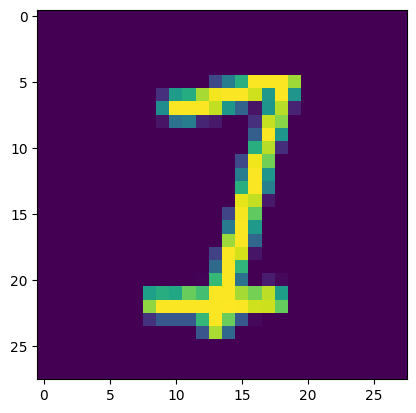

Prediction: 7 Truth: 2


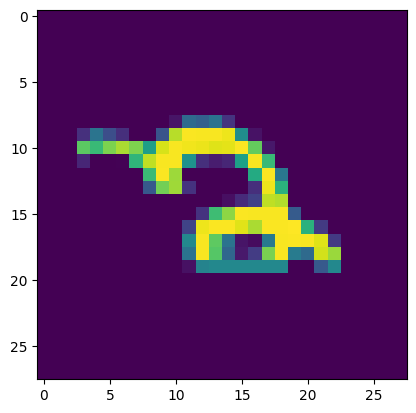

Prediction: 7 Truth: 2


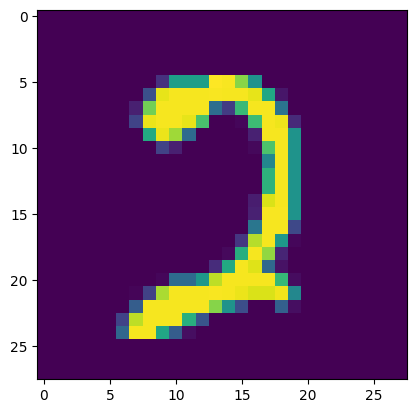

Prediction: 7 Truth: 2


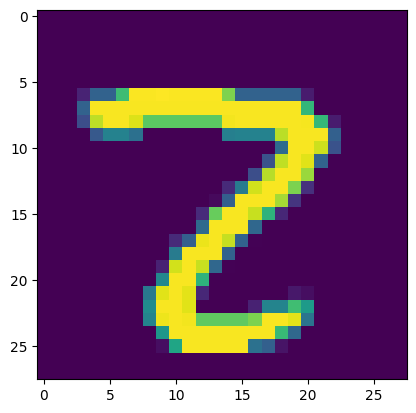

Prediction: 7 Truth: 2


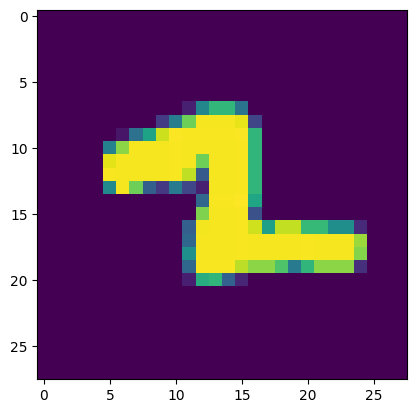

Prediction: 7 Truth: 2


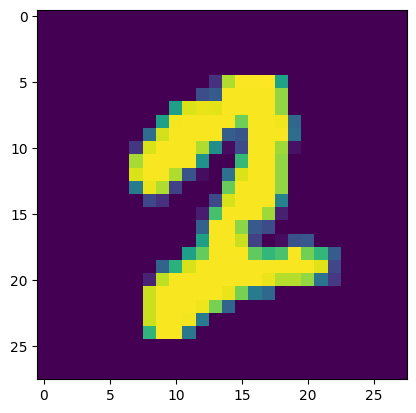

Prediction: 2 Truth: 7


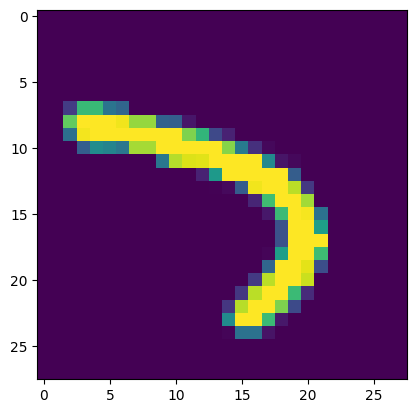

Prediction: 7 Truth: 2


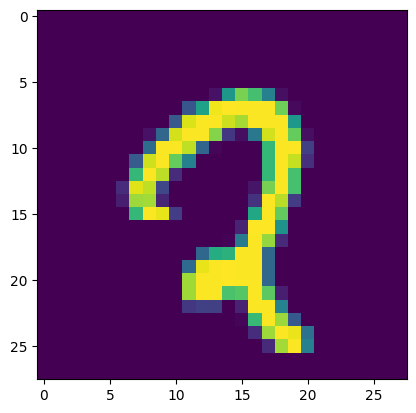

Prediction: 2 Truth: 7


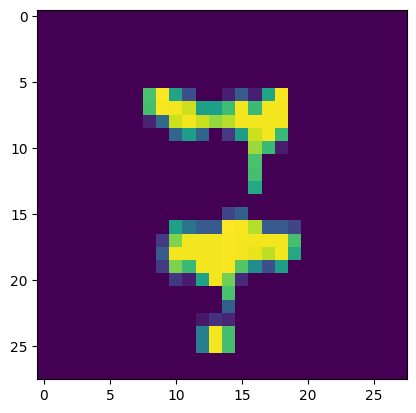

Prediction: 7 Truth: 2


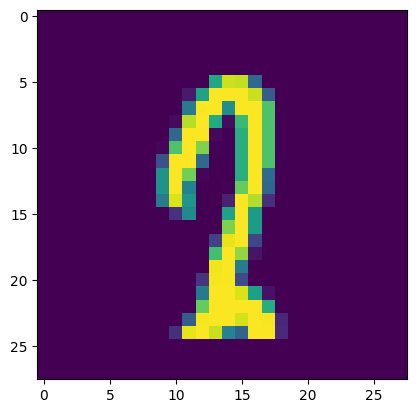

Prediction: 2 Truth: 7


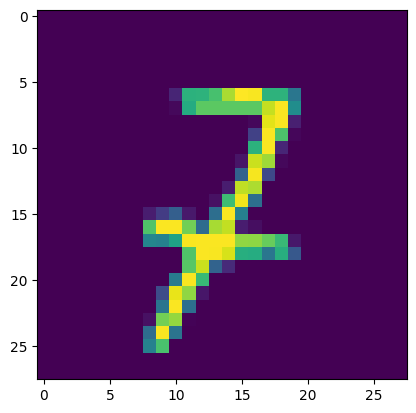

Prediction: 2 Truth: 7


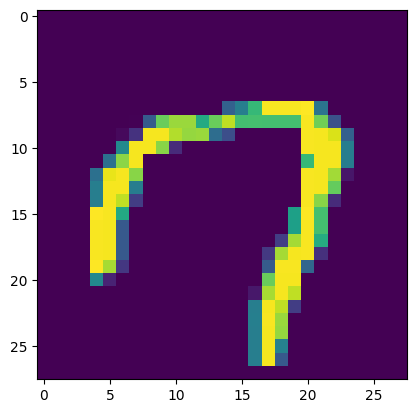

Prediction: 7 Truth: 2


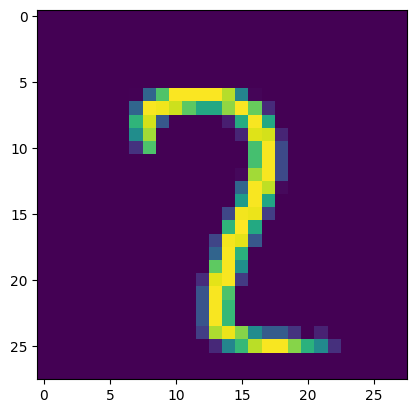

Prediction: 7 Truth: 2


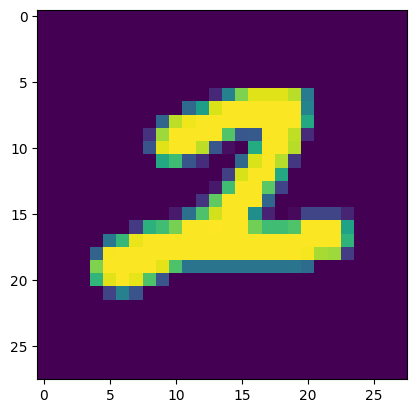

Prediction: 7 Truth: 2


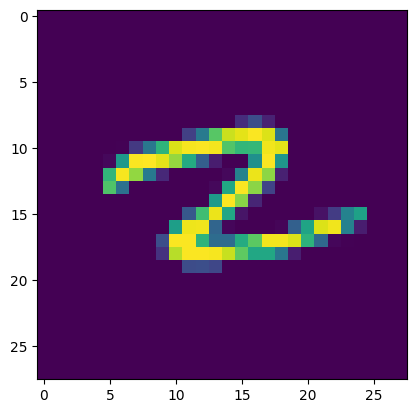

Prediction: 7 Truth: 2


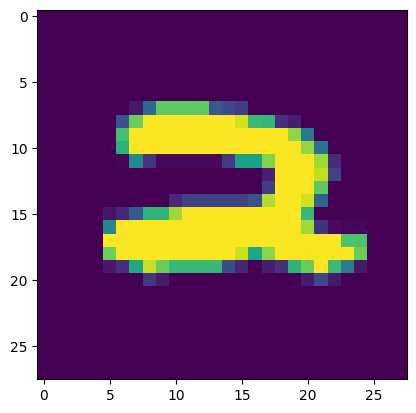

Prediction: 2 Truth: 7


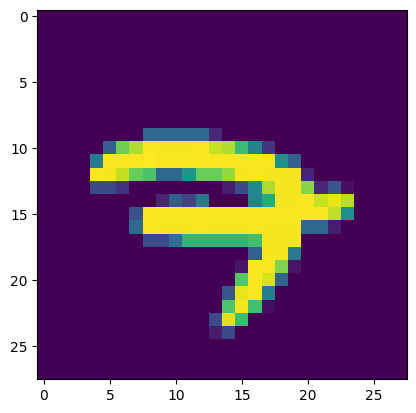

Prediction: 2 Truth: 7


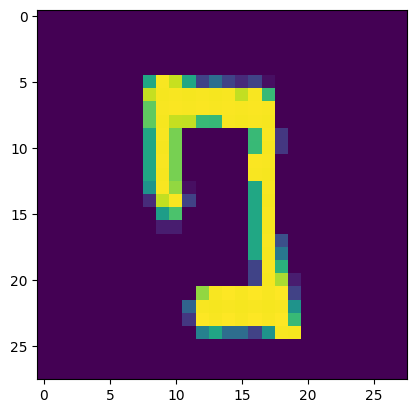

Prediction: 7 Truth: 2


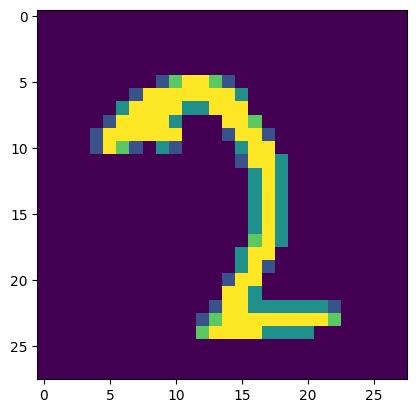

Prediction: 2 Truth: 7


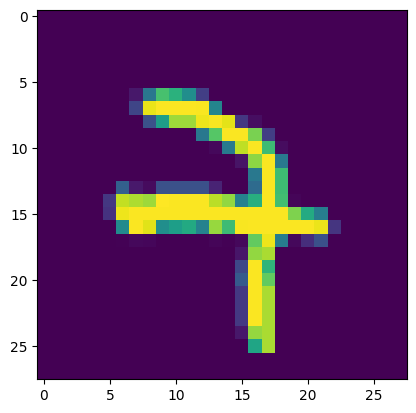

Prediction: 2 Truth: 7


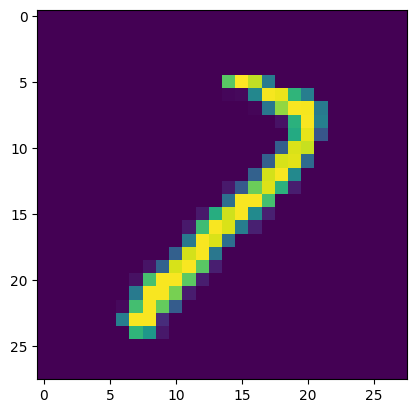

Prediction: 2 Truth: 7


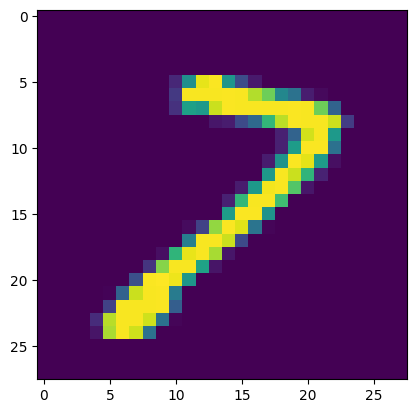

Prediction: 2 Truth: 7


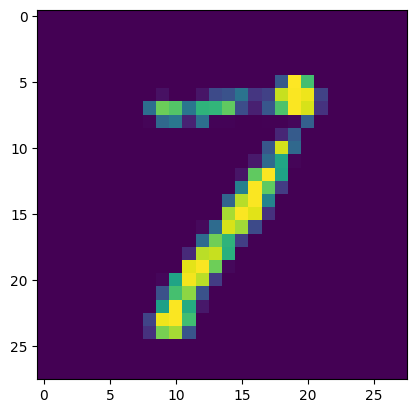

Prediction: 7 Truth: 2


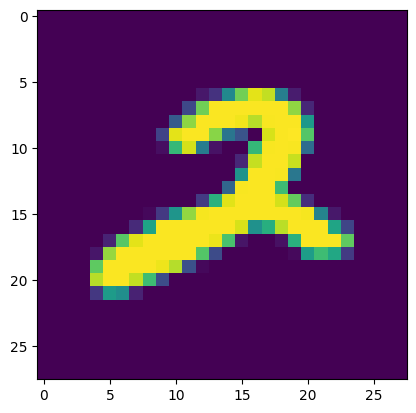

Prediction: 2 Truth: 7


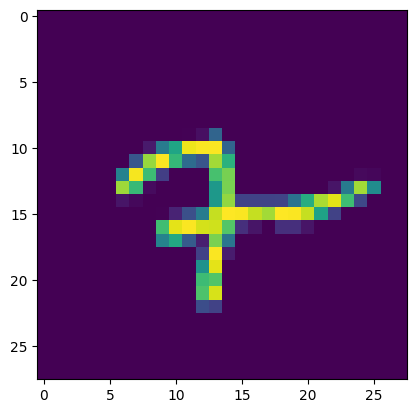

Prediction: 7 Truth: 2


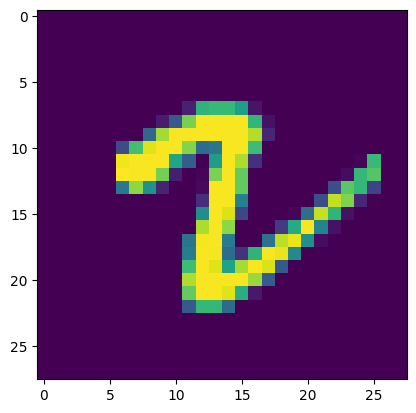

Prediction: 7 Truth: 2


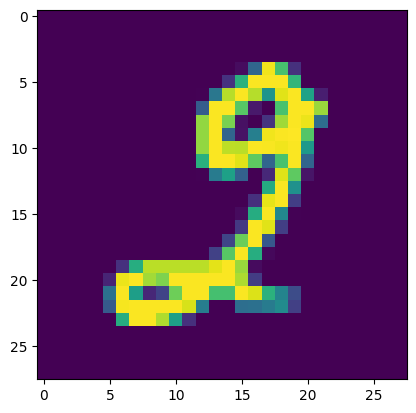

Prediction: 7 Truth: 2


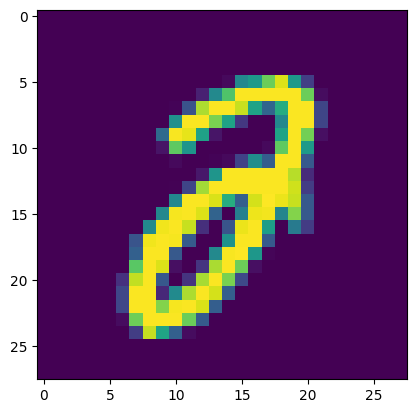

Prediction: 7 Truth: 2


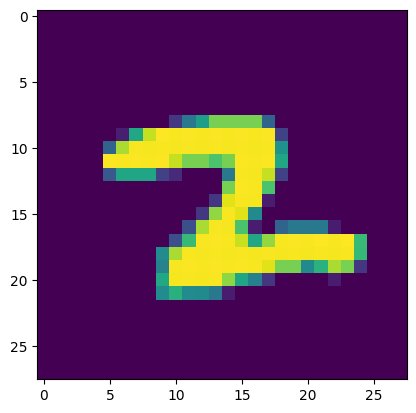

Prediction: 7 Truth: 2


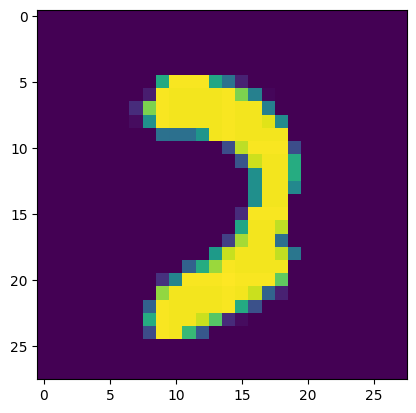

Prediction: 2 Truth: 7


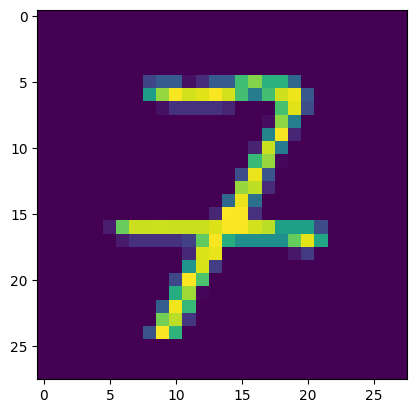

Prediction: 7 Truth: 2


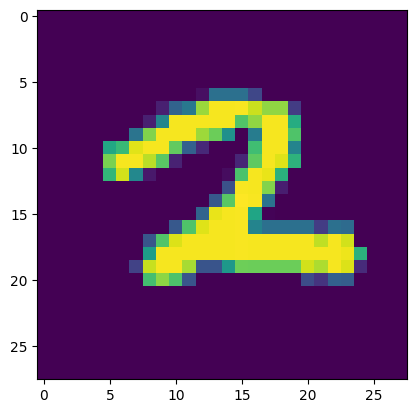

Prediction: 7 Truth: 2


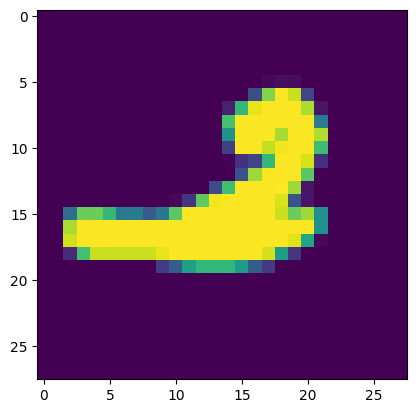

Prediction: 7 Truth: 2


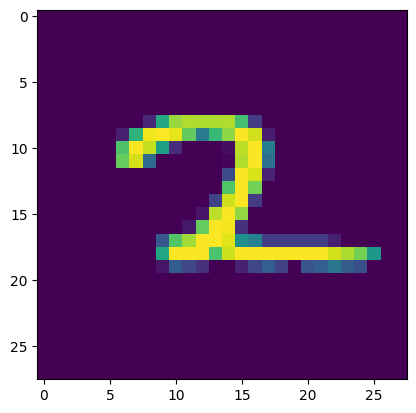

Prediction: 2 Truth: 7


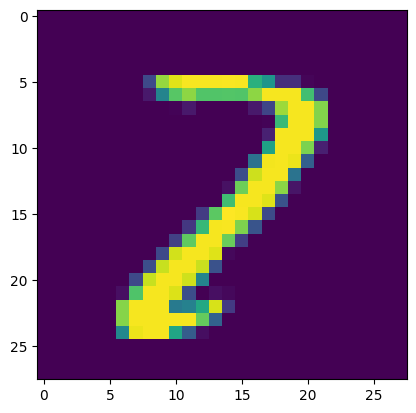

Prediction: 2 Truth: 7


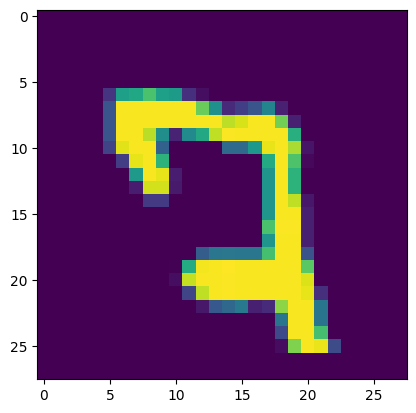

Prediction: 7 Truth: 2


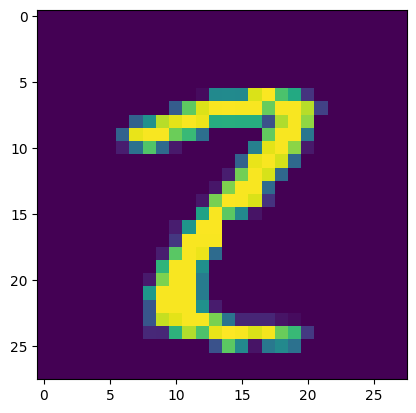

Prediction: 2 Truth: 7


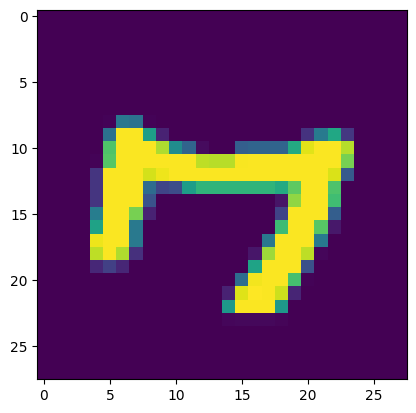

Prediction: 2 Truth: 7


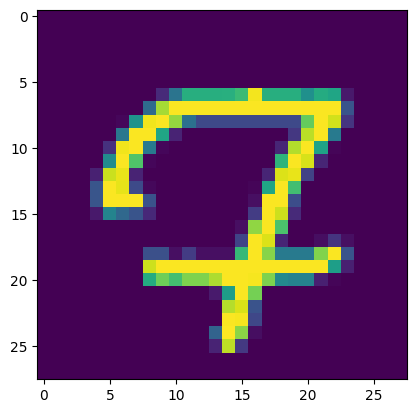

Prediction: 7 Truth: 2


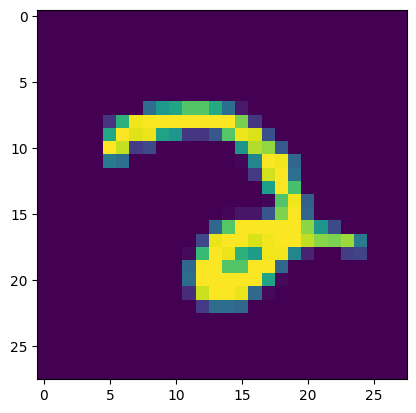

Prediction: 7 Truth: 2


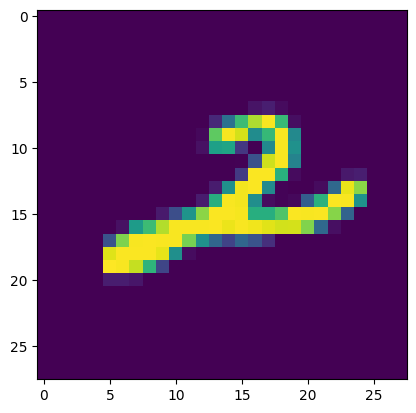

Prediction: 2 Truth: 7


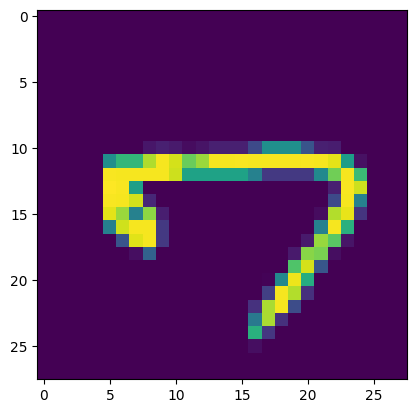

Prediction: 7 Truth: 2


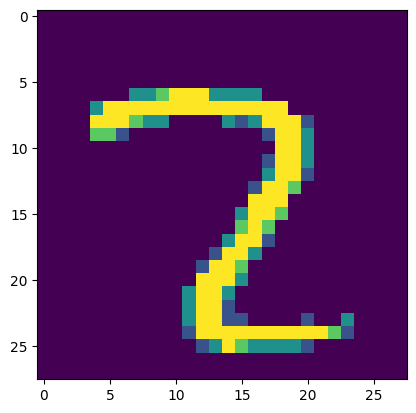

Prediction: 2 Truth: 7


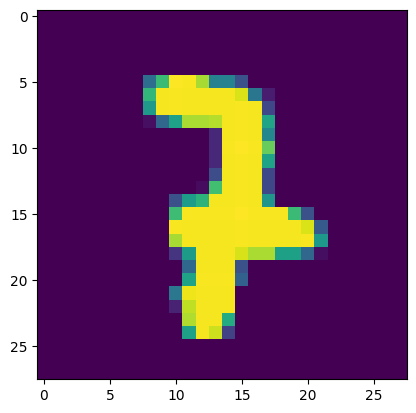

Prediction: 7 Truth: 2


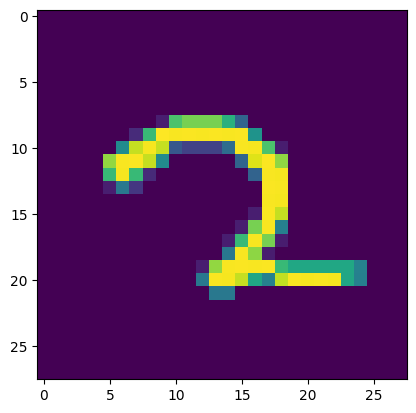

Prediction: 2 Truth: 7


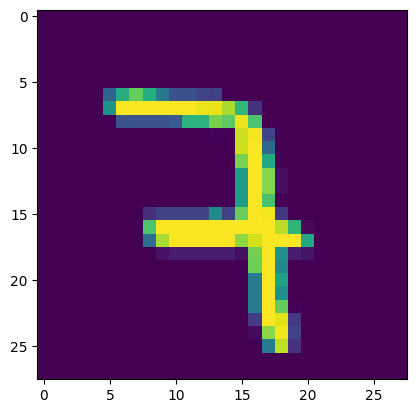

Prediction: 2 Truth: 7


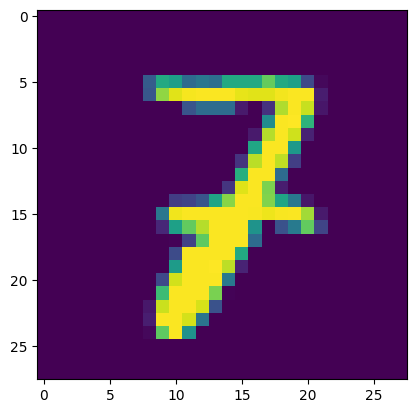

Prediction: 2 Truth: 7


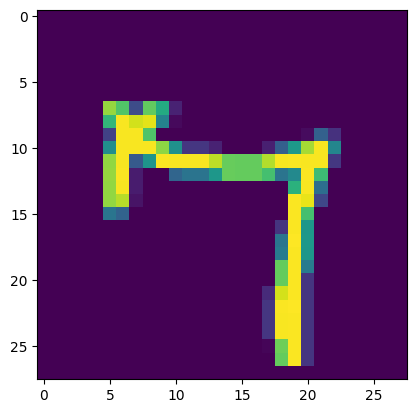

Prediction: 2 Truth: 7


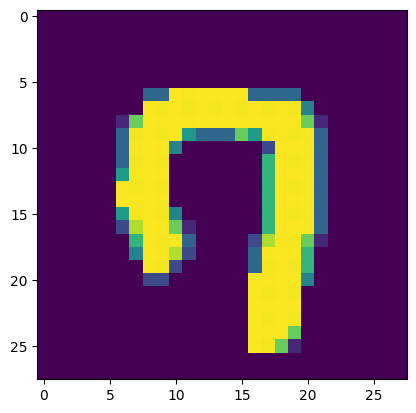

Prediction: 7 Truth: 2


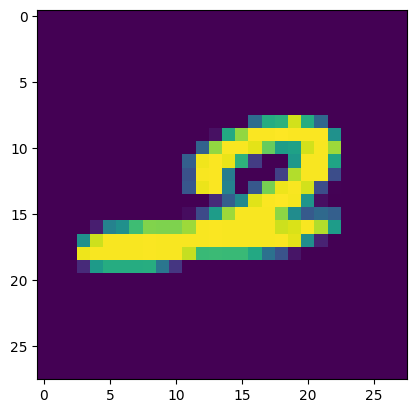

Prediction: 2 Truth: 7


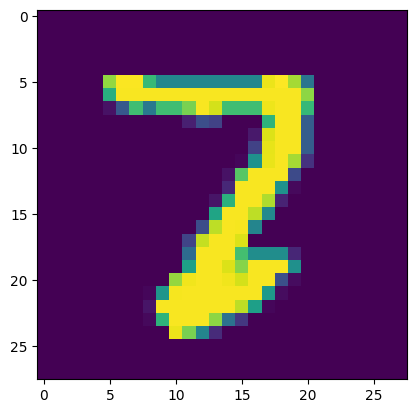

Prediction: 7 Truth: 2


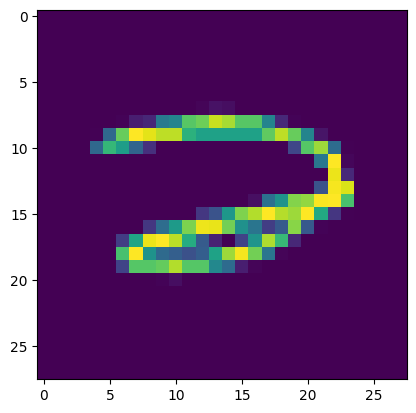

Prediction: 7 Truth: 2


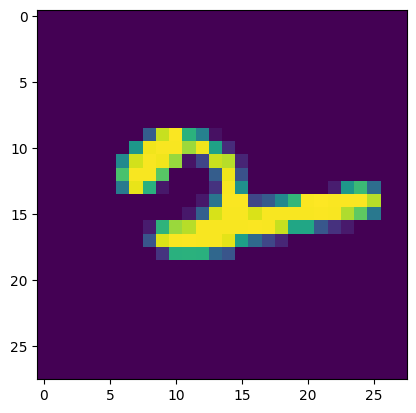

Prediction: 7 Truth: 2


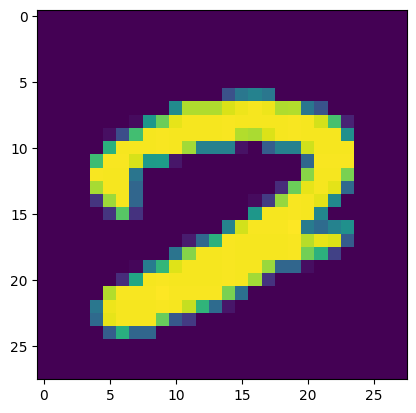

Prediction: 7 Truth: 2


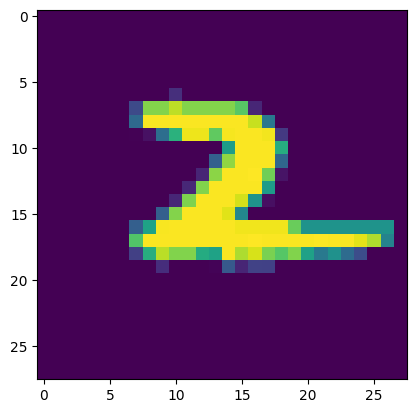

Prediction: 7 Truth: 2


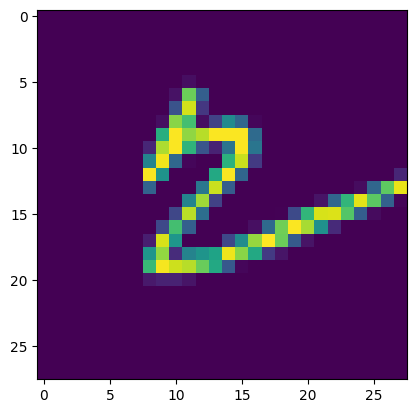

Prediction: 2 Truth: 7


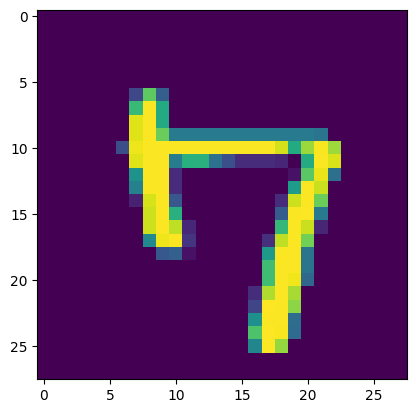

Prediction: 7 Truth: 2


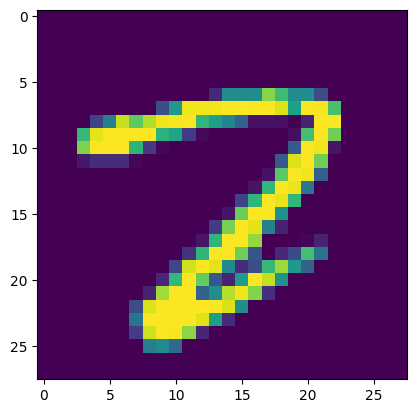

Prediction: 7 Truth: 2


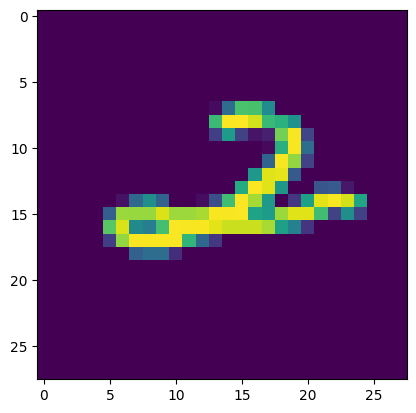

Prediction: 7 Truth: 2


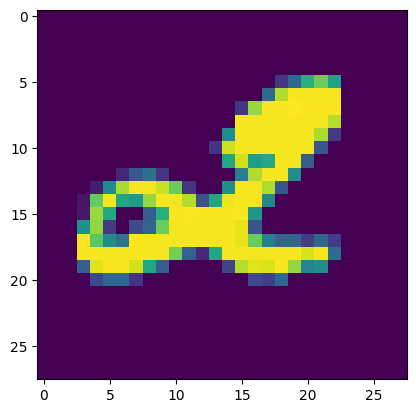

Prediction: 7 Truth: 2


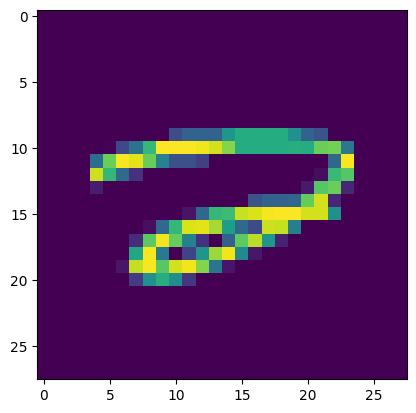

Prediction: 7 Truth: 2


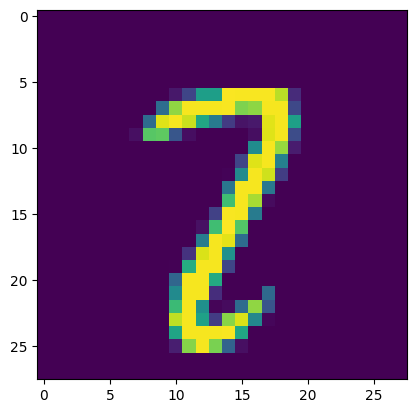

Prediction: 2 Truth: 7


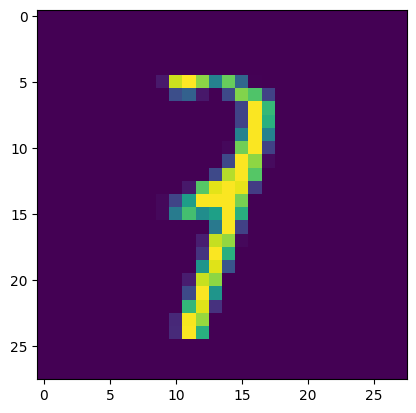

Prediction: 7 Truth: 2


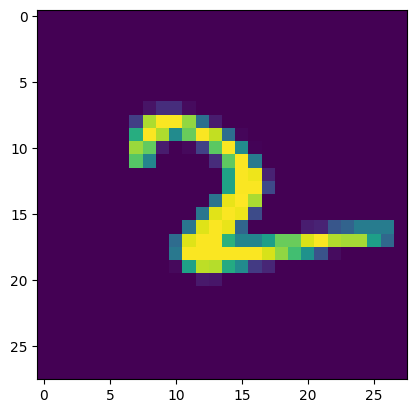

Prediction: 7 Truth: 2


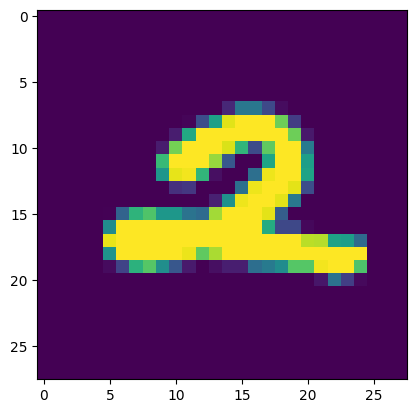

Prediction: 2 Truth: 7


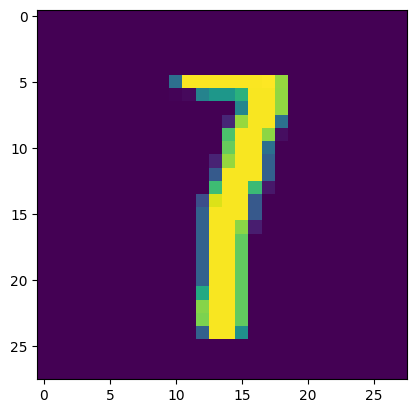

Prediction: 2 Truth: 7


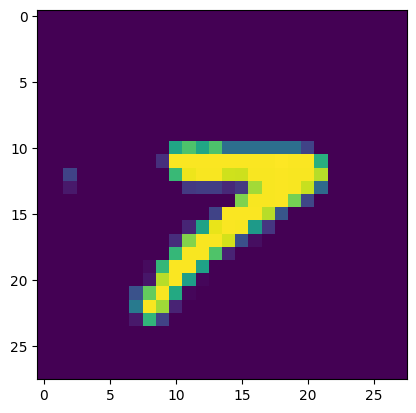

Prediction: 2 Truth: 7


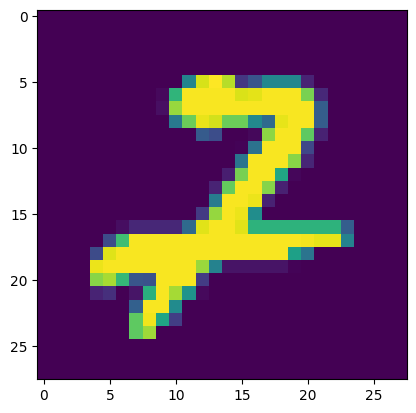

Prediction: 2 Truth: 7


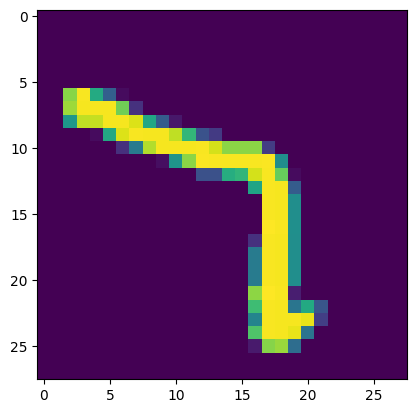

Prediction: 7 Truth: 2


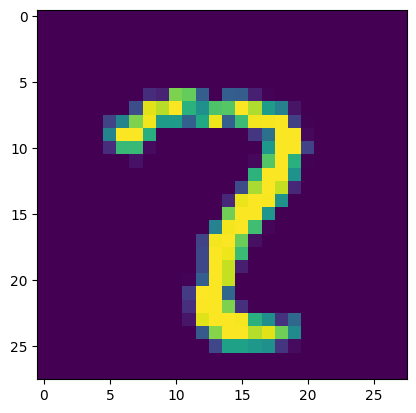

Prediction: 2 Truth: 7


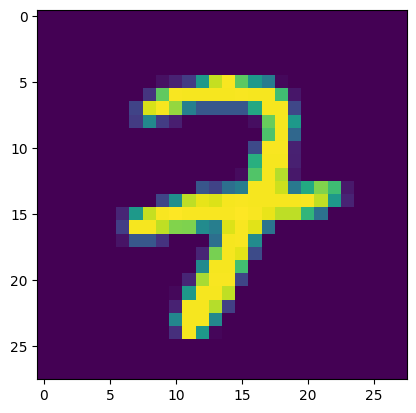

Prediction: 2 Truth: 7


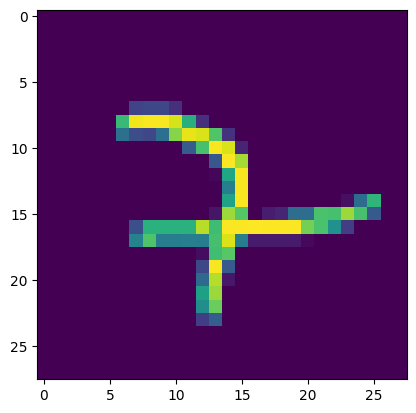

Prediction: 7 Truth: 2


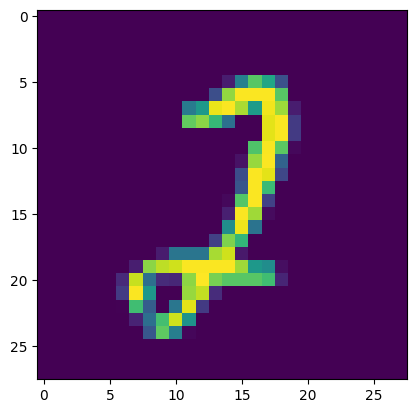

Prediction: 7 Truth: 2


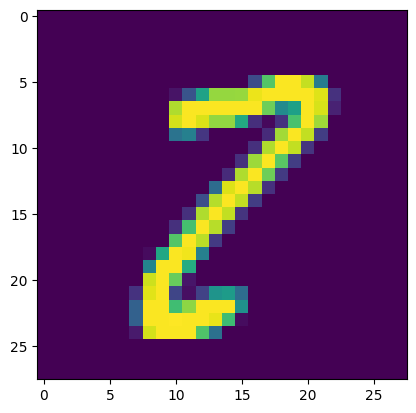

Prediction: 2 Truth: 7


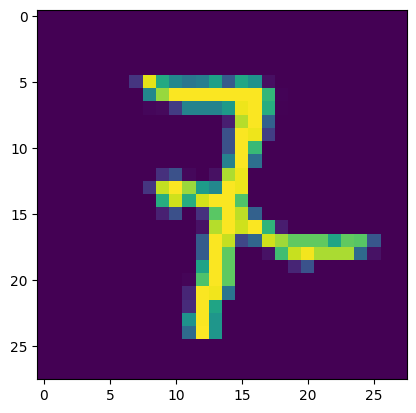

Prediction: 7 Truth: 2


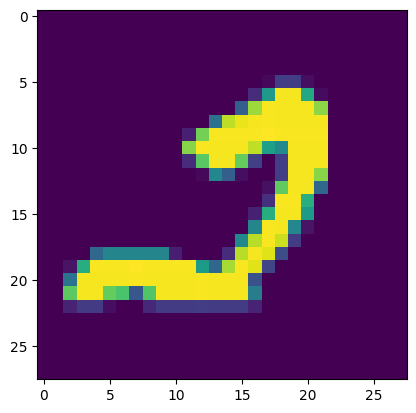

Prediction: 7 Truth: 2


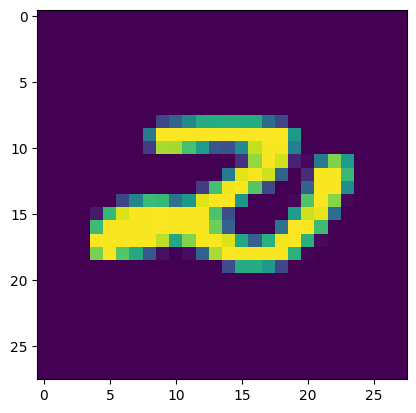

Prediction: 2 Truth: 7


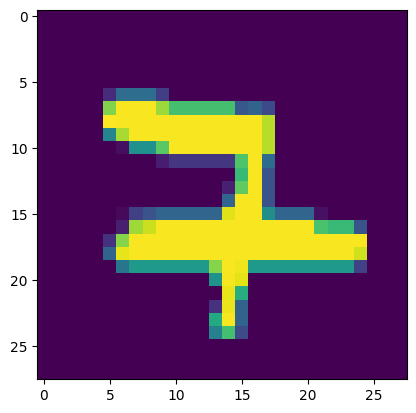

Prediction: 7 Truth: 2


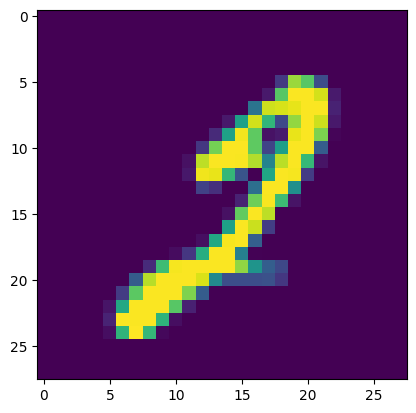

Prediction: 2 Truth: 7


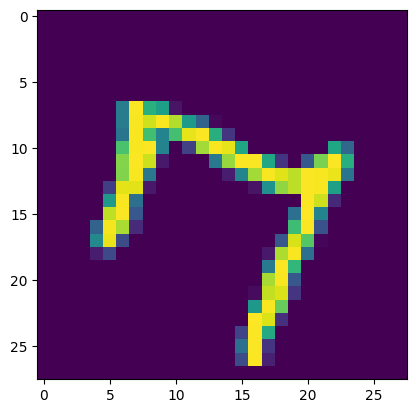

Prediction: 7 Truth: 2


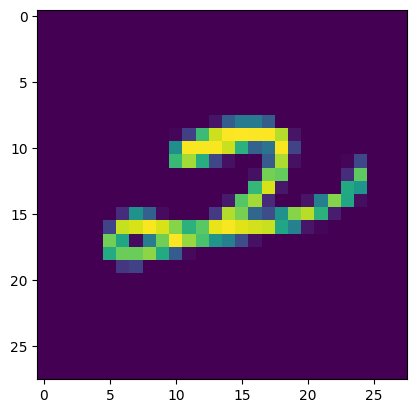

Prediction: 2 Truth: 7


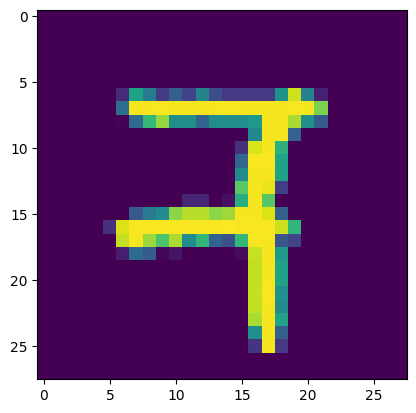

Prediction: 2 Truth: 7


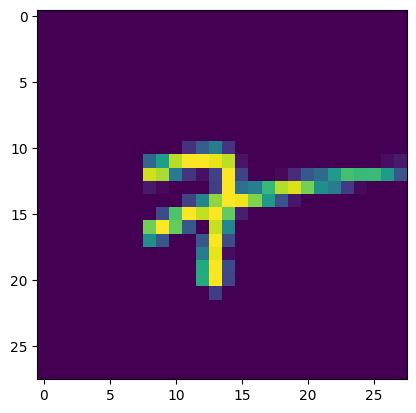

Prediction: 2 Truth: 7


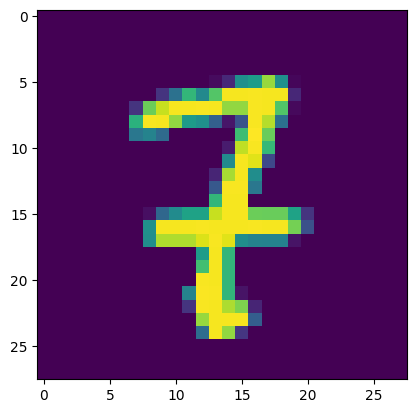

Prediction: 2 Truth: 7


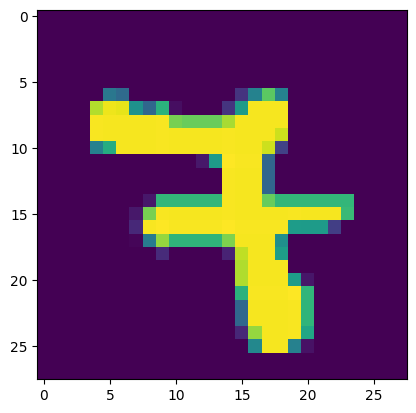

Prediction: 2 Truth: 7


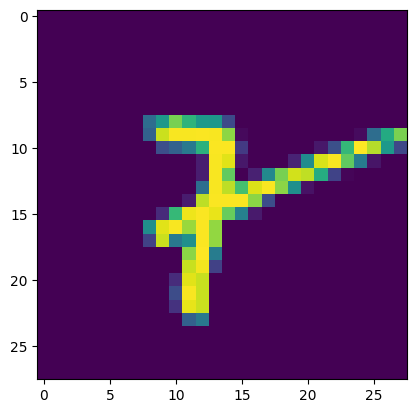

Prediction: 2 Truth: 7


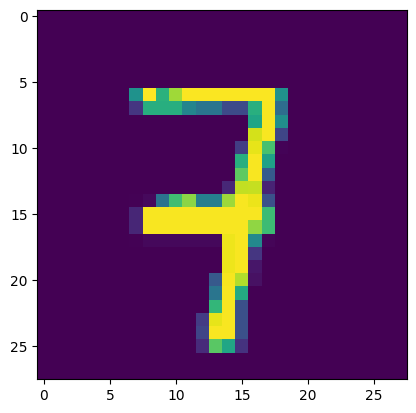

Prediction: 7 Truth: 2


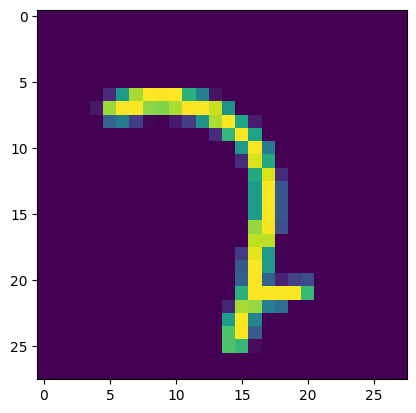

Prediction: 7 Truth: 2


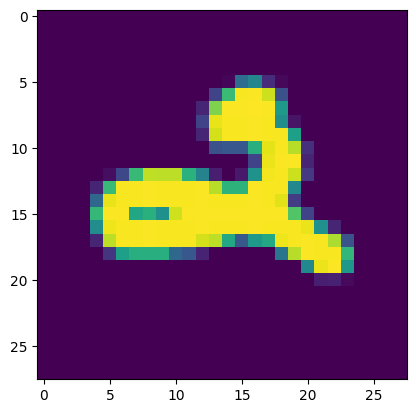

Prediction: 7 Truth: 2


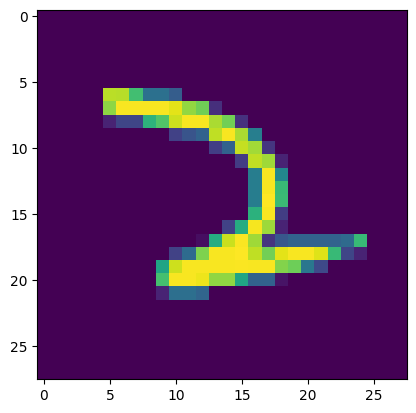

Prediction: 7 Truth: 2


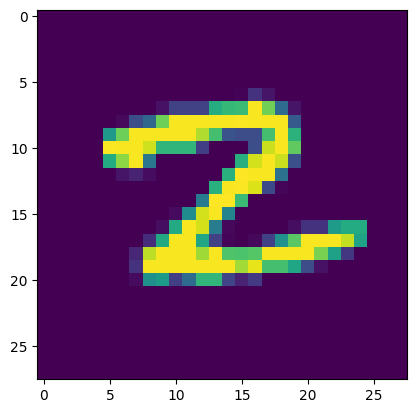

Prediction: 7 Truth: 2


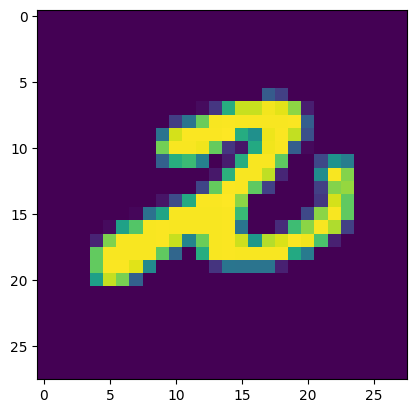

Prediction: 7 Truth: 2


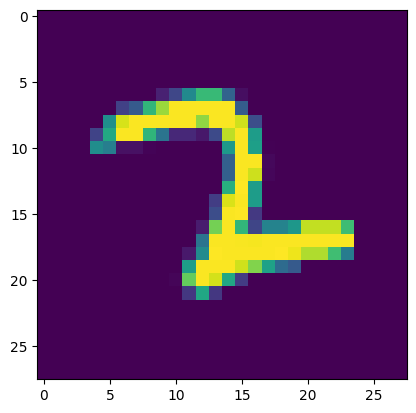

Prediction: 2 Truth: 7


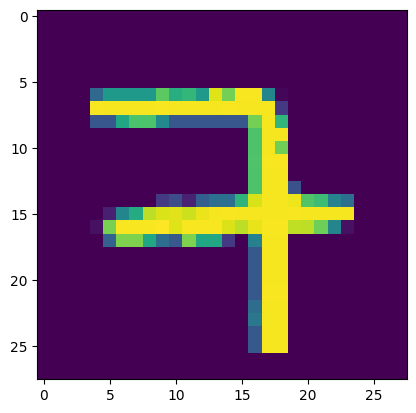

Prediction: 7 Truth: 2


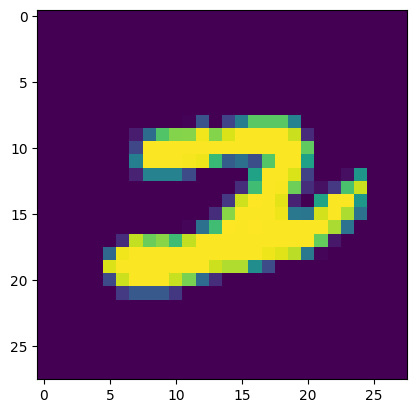

Prediction: 7 Truth: 2


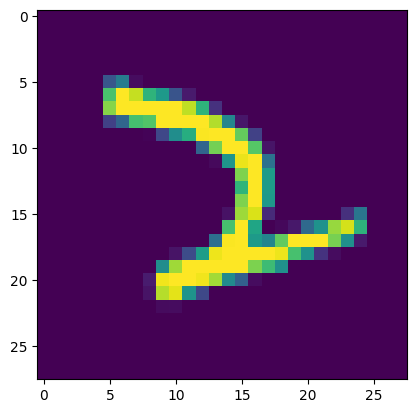

Prediction: 2 Truth: 7


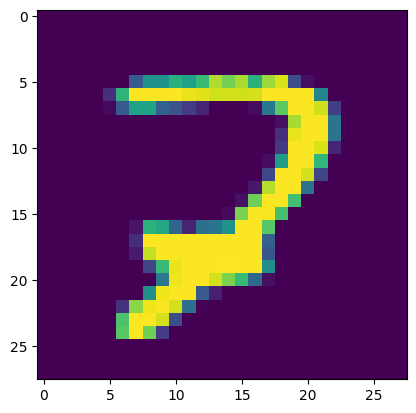

Prediction: 2 Truth: 7


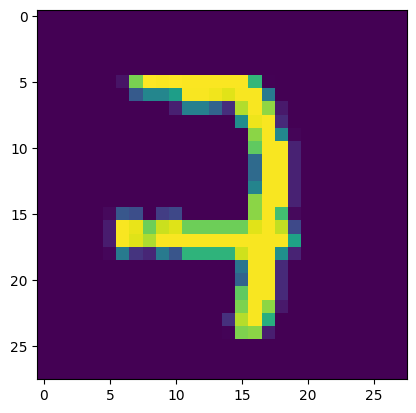

Prediction: 7 Truth: 2


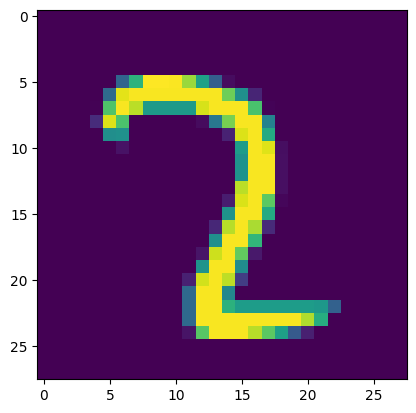

Prediction: 7 Truth: 2


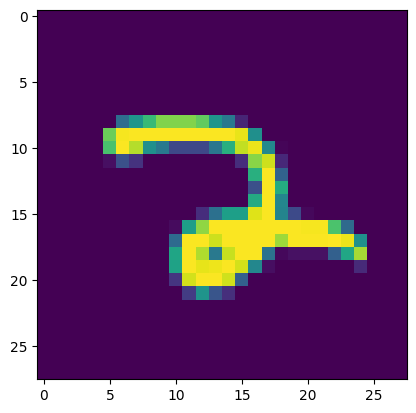

Prediction: 7 Truth: 2


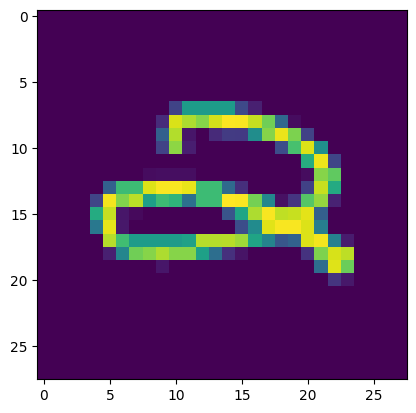

Prediction: 2 Truth: 7


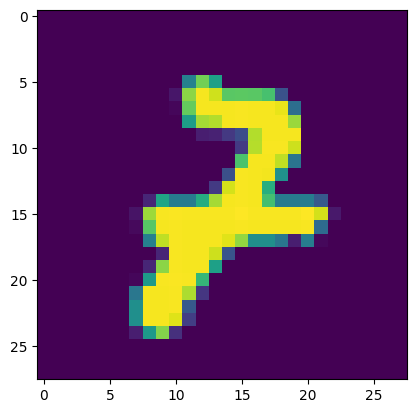

Prediction: 7 Truth: 2


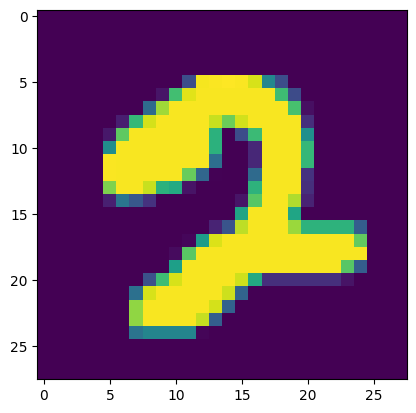

Prediction: 7 Truth: 2


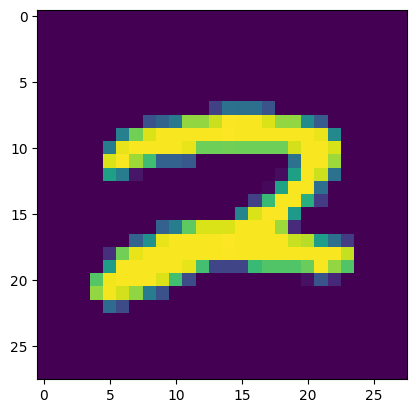

Prediction: 7 Truth: 2


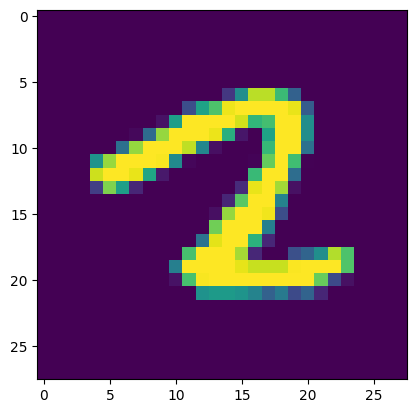

Prediction: 2 Truth: 7


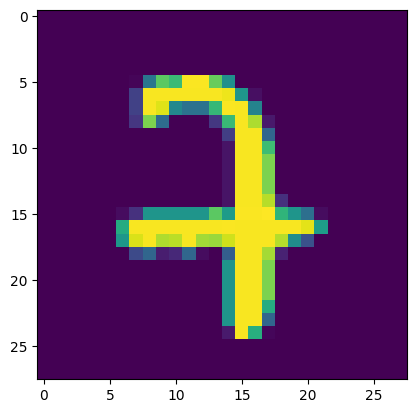

Prediction: 2 Truth: 7


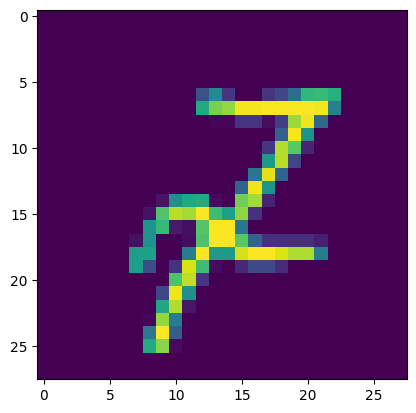

Prediction: 2 Truth: 7


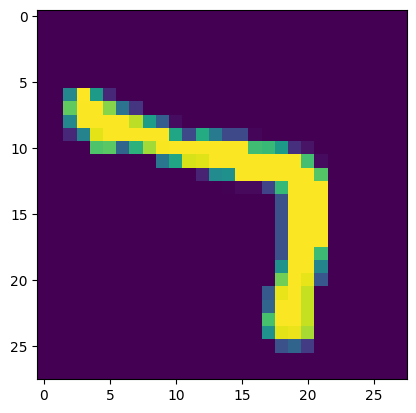

Prediction: 2 Truth: 7


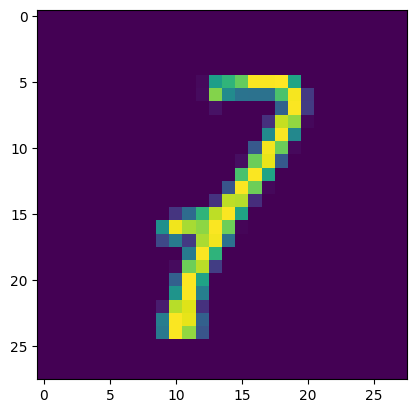

Prediction: 7 Truth: 2


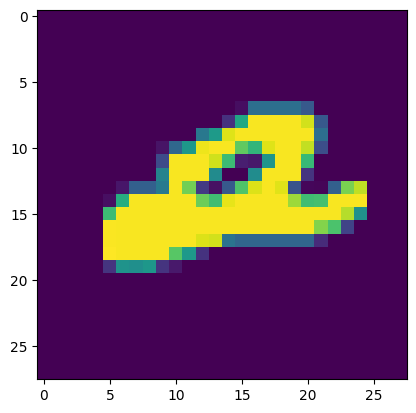

Prediction: 7 Truth: 2


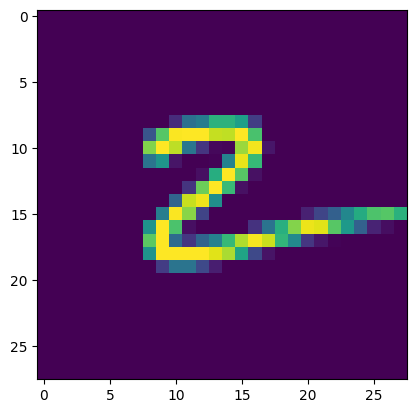

Prediction: 2 Truth: 7


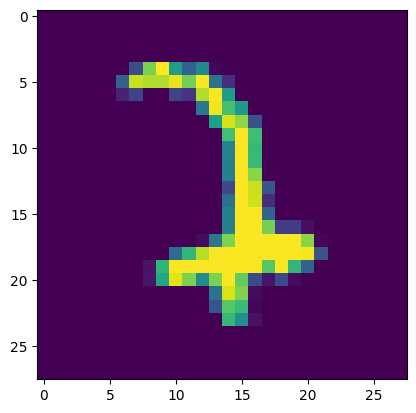

Prediction: 7 Truth: 2


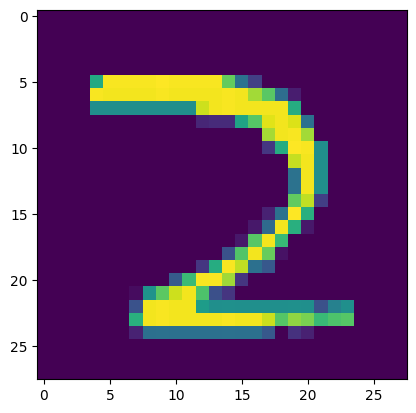

Prediction: 7 Truth: 2


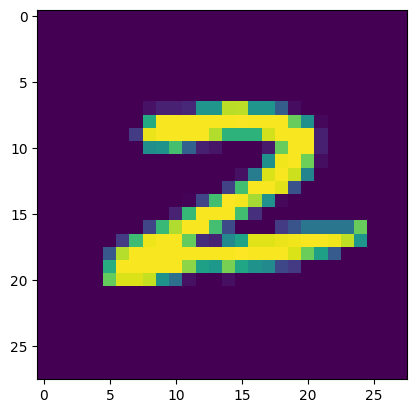

Prediction: 2 Truth: 7


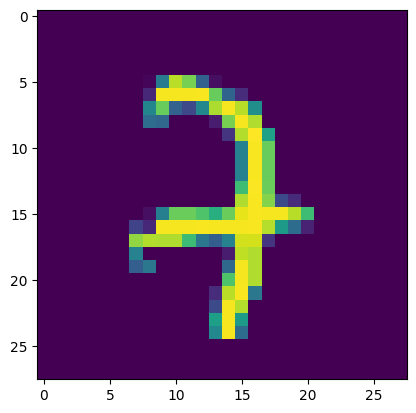

Prediction: 7 Truth: 2


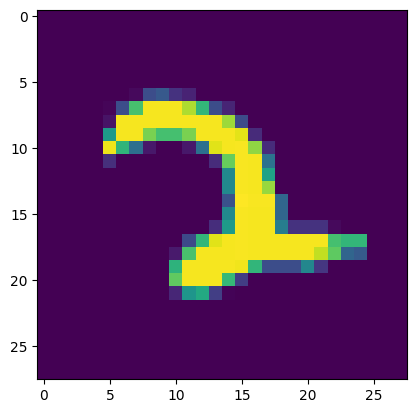

Prediction: 2 Truth: 7


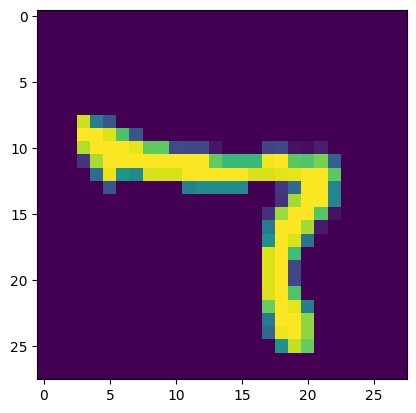

Prediction: 7 Truth: 2


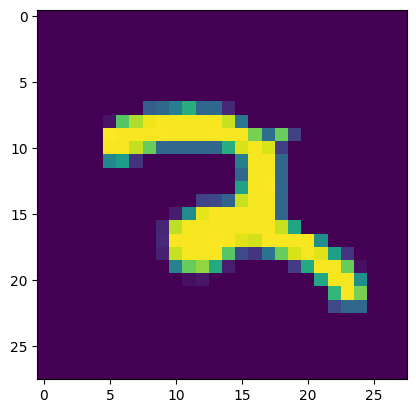

Prediction: 7 Truth: 2


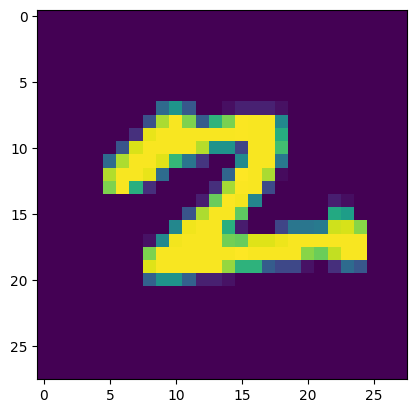

Prediction: 2 Truth: 7


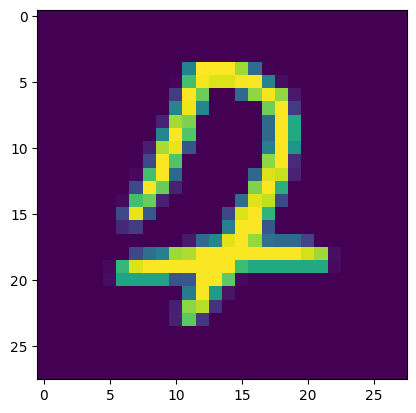

Prediction: 7 Truth: 2


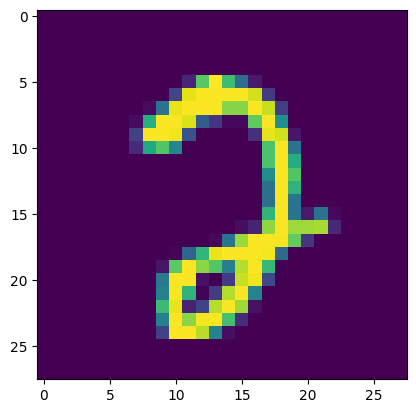

Prediction: 2 Truth: 7


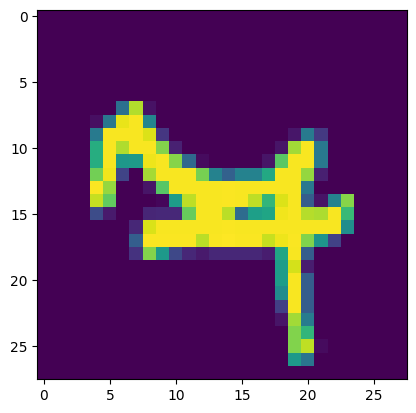

Prediction: 2 Truth: 7


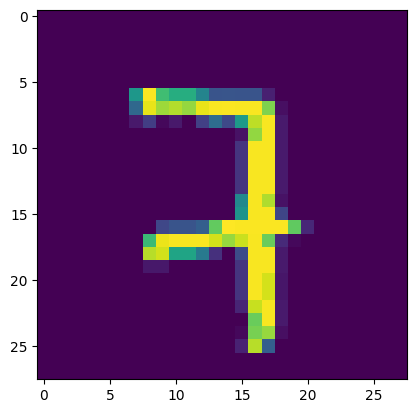

Prediction: 7 Truth: 2


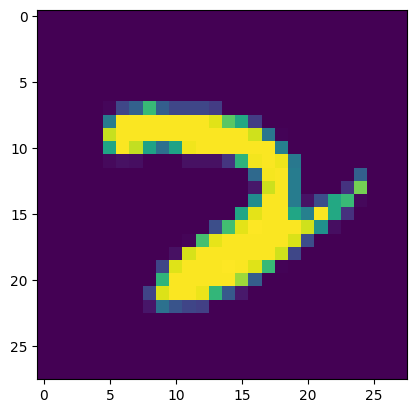

Prediction: 2 Truth: 7


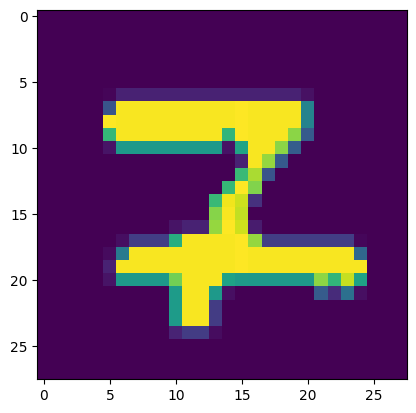

Prediction: 7 Truth: 2


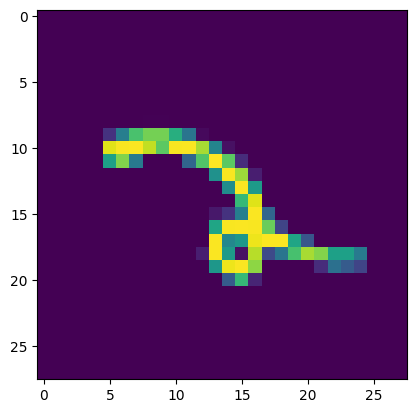

Prediction: 7 Truth: 2


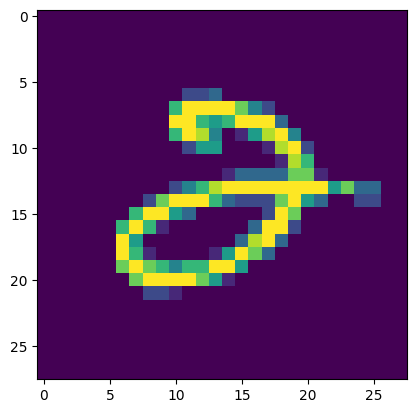

Prediction: 7 Truth: 2


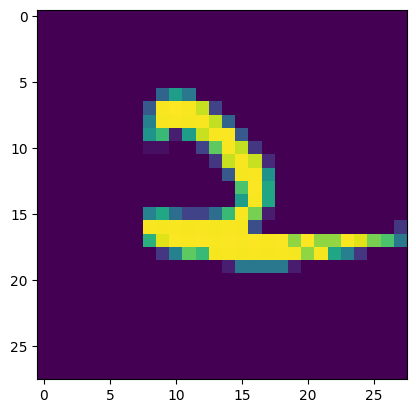

Prediction: 7 Truth: 2


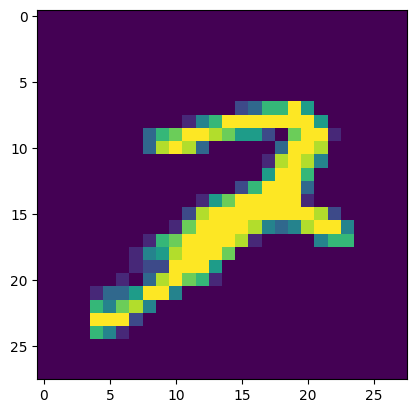

Prediction: 2 Truth: 7


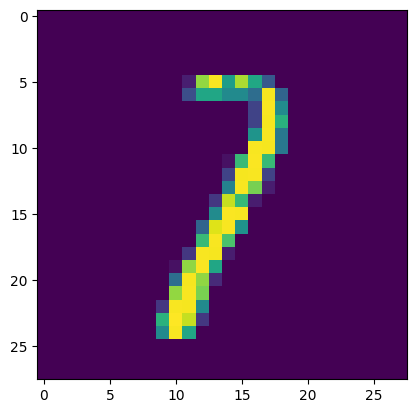

Prediction: 7 Truth: 2


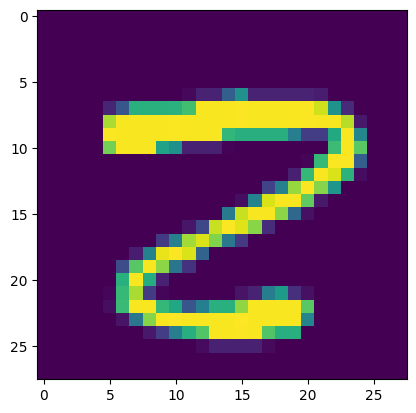

Prediction: 2 Truth: 7


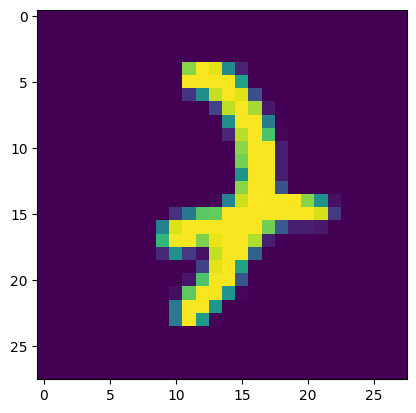

Prediction: 7 Truth: 2


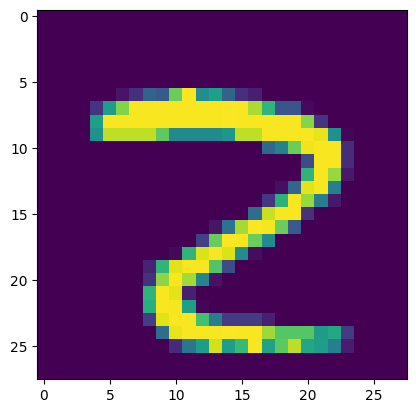

Prediction: 2 Truth: 7


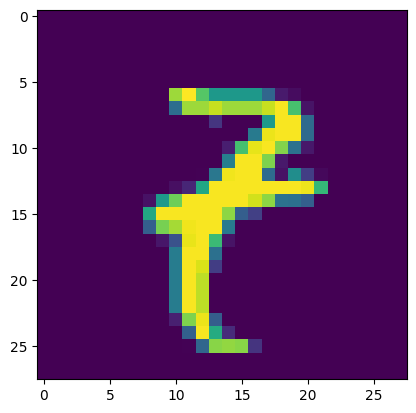

Prediction: 7 Truth: 2


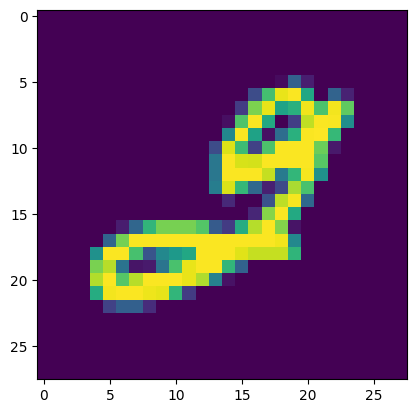

Prediction: 2 Truth: 7


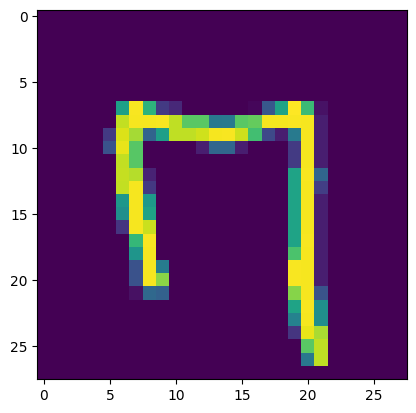

Prediction: 7 Truth: 2


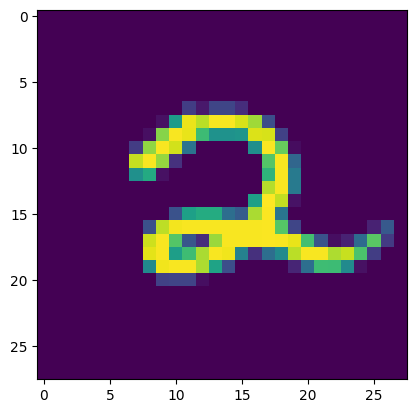

Prediction: 2 Truth: 7


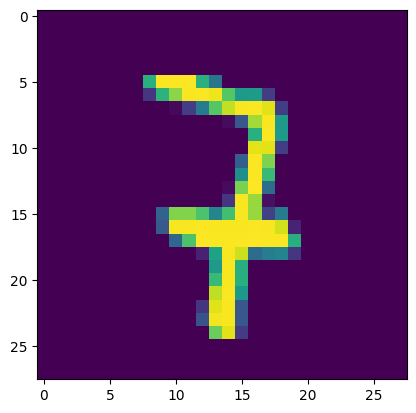

Prediction: 2 Truth: 7


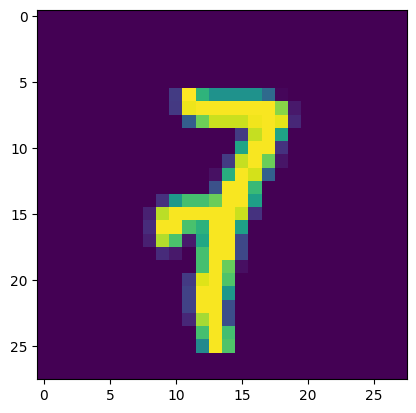

Prediction: 2 Truth: 7


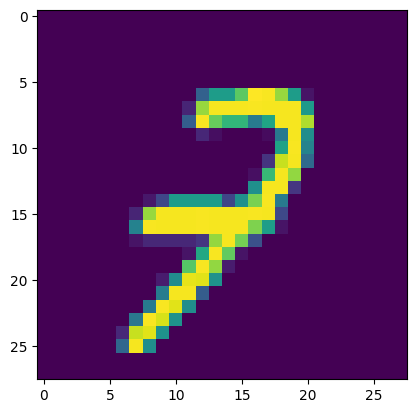

Prediction: 2 Truth: 7


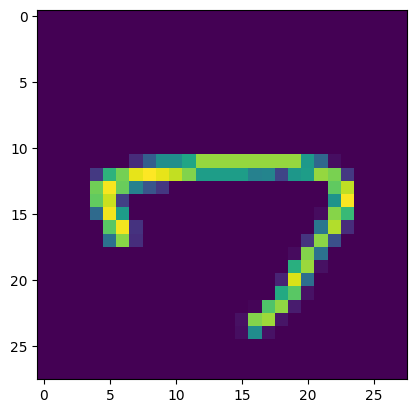

Prediction: 7 Truth: 2


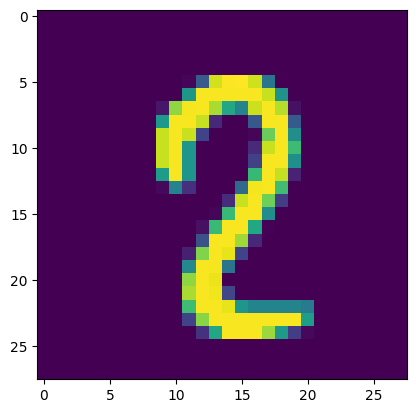

Prediction: 7 Truth: 2


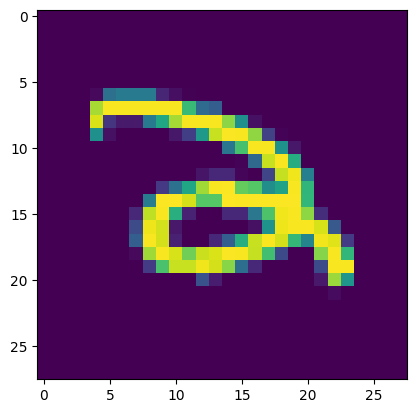

Prediction: 2 Truth: 7


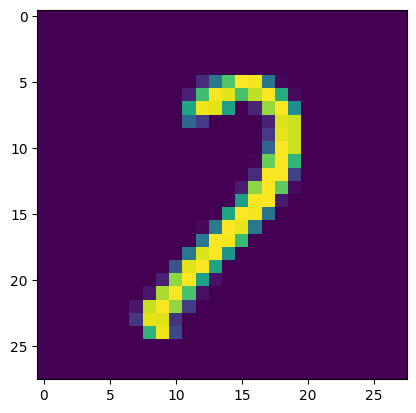

Prediction: 7 Truth: 2


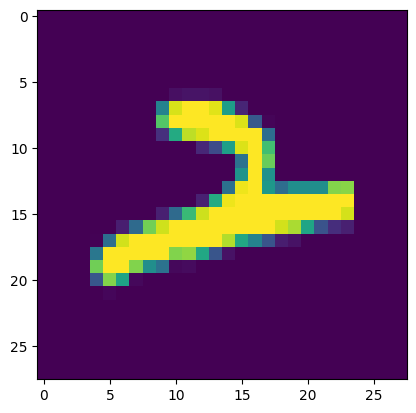

Prediction: 2 Truth: 7


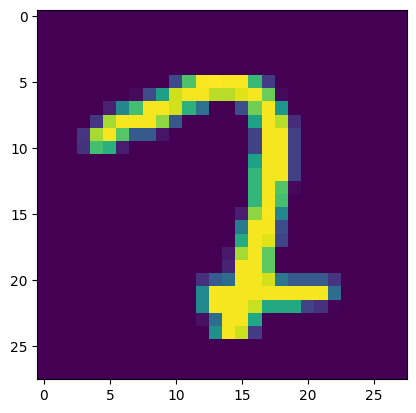

Prediction: 7 Truth: 2


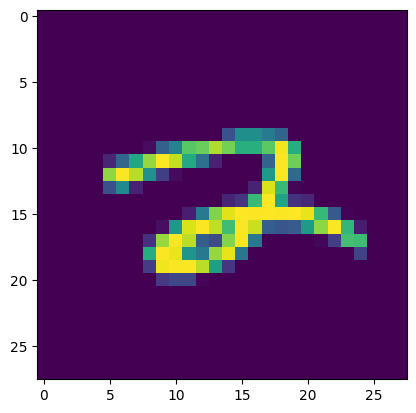

Prediction: 7 Truth: 2


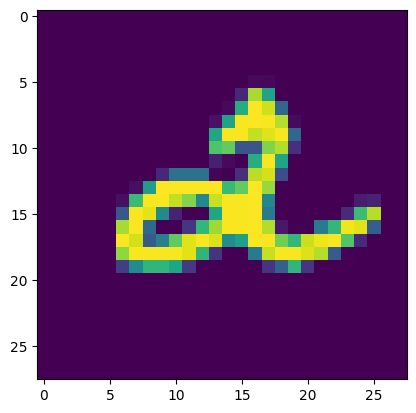

Prediction: 2 Truth: 7


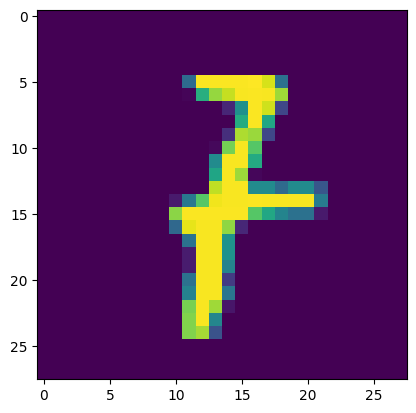

Prediction: 7 Truth: 2


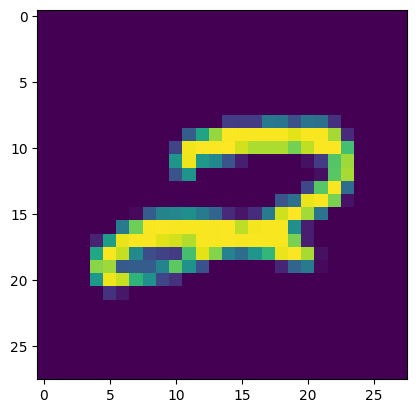

Prediction: 2 Truth: 7


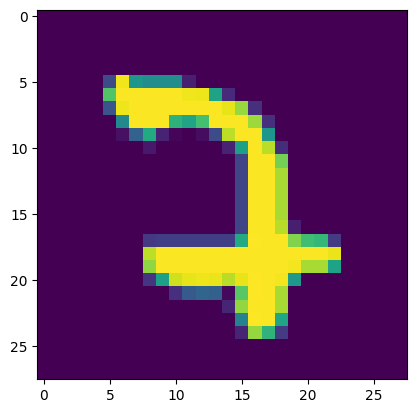

Prediction: 7 Truth: 2


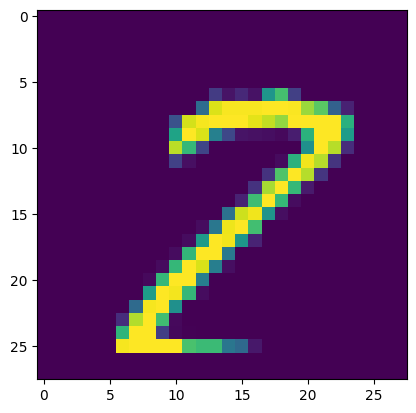

Prediction: 7 Truth: 2


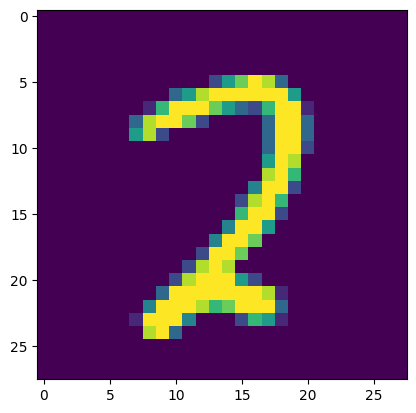

Prediction: 2 Truth: 7


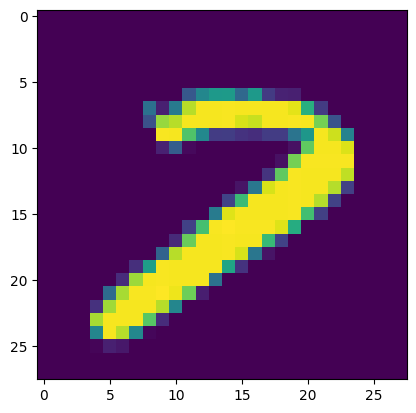

Prediction: 7 Truth: 2


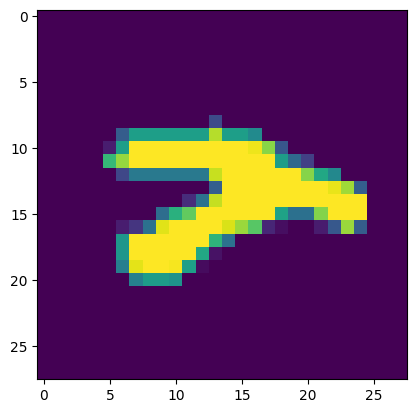

Prediction: 7 Truth: 2


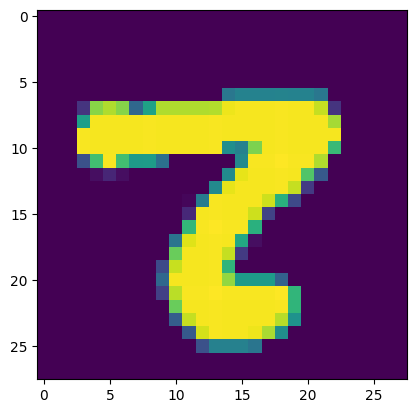

Prediction: 7 Truth: 2


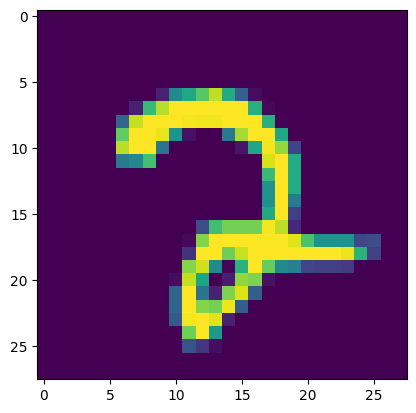

Prediction: 2 Truth: 7


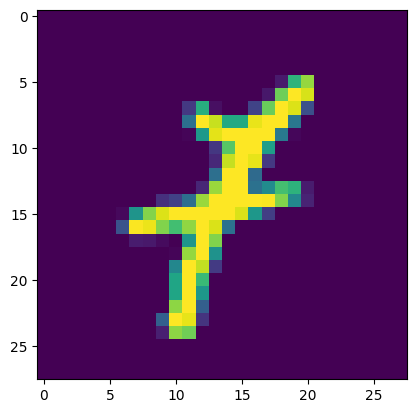

Prediction: 2 Truth: 7


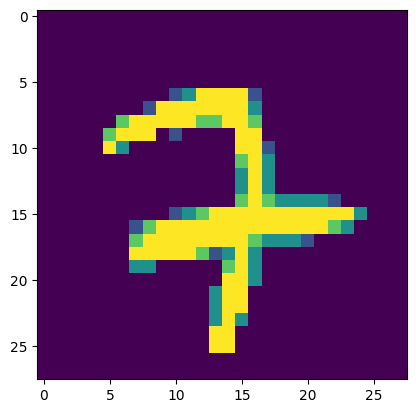

Prediction: 2 Truth: 7


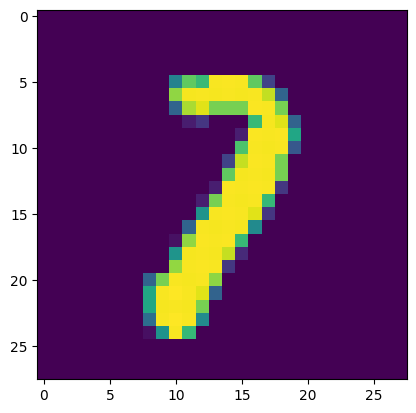

Prediction: 2 Truth: 7


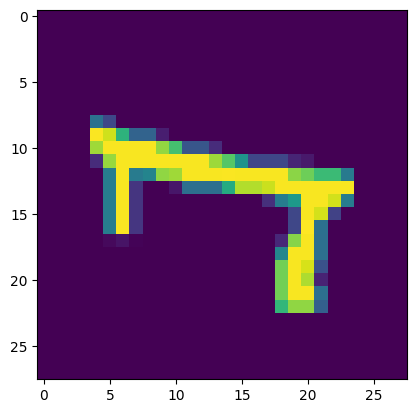

Prediction: 7 Truth: 2


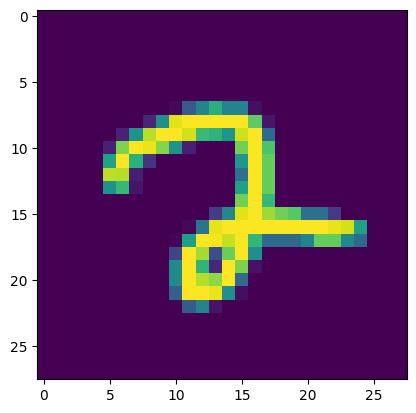

Prediction: 2 Truth: 7


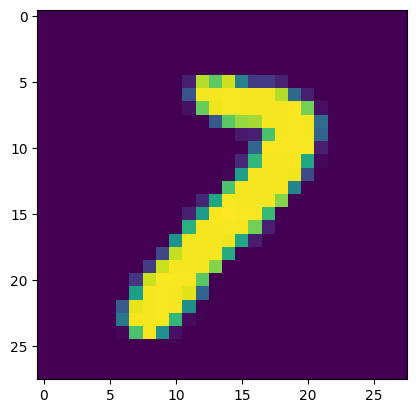

Prediction: 7 Truth: 2


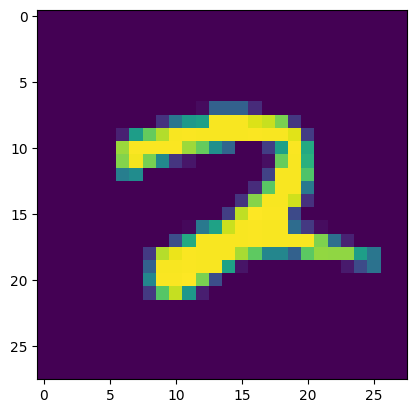

Prediction: 7 Truth: 2


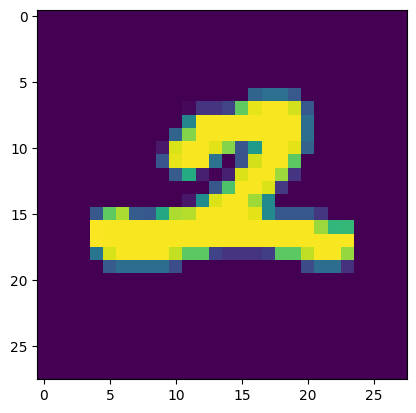

Prediction: 7 Truth: 2


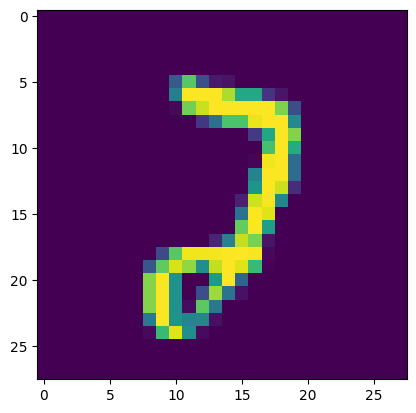

Prediction: 2 Truth: 7


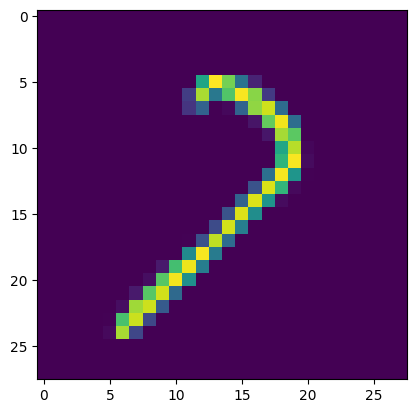

Prediction: 7 Truth: 2


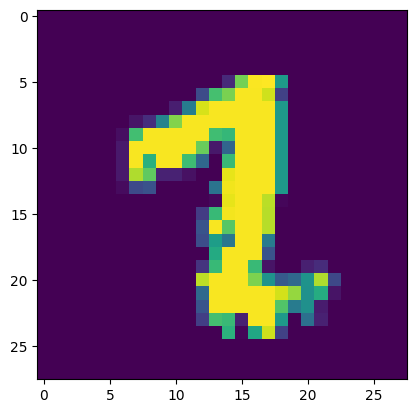

Prediction: 7 Truth: 2


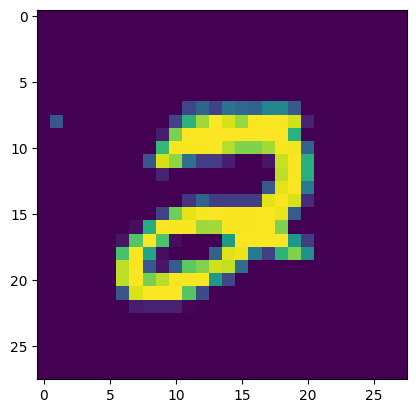

Prediction: 2 Truth: 7


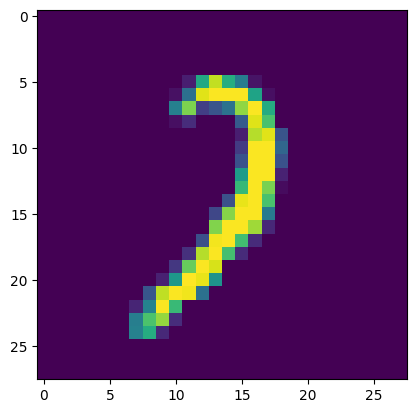

Prediction: 7 Truth: 2


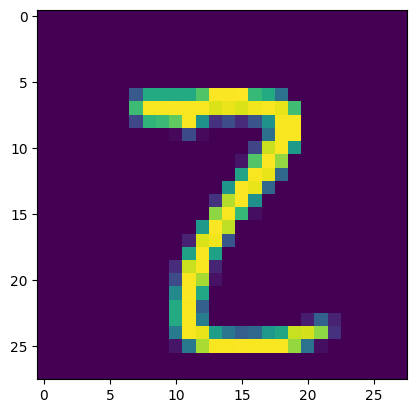

Prediction: 2 Truth: 7


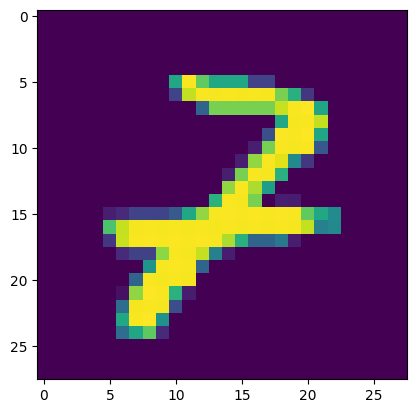

Prediction: 7 Truth: 2


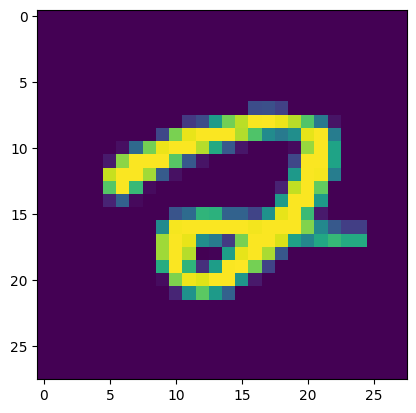

Prediction: 2 Truth: 7


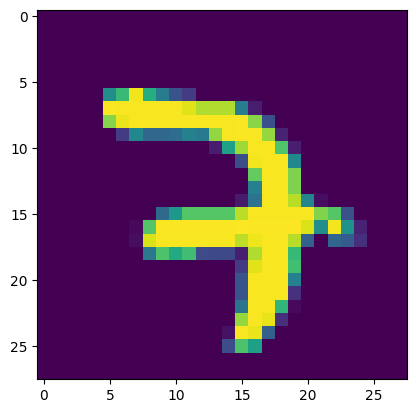

Prediction: 7 Truth: 2


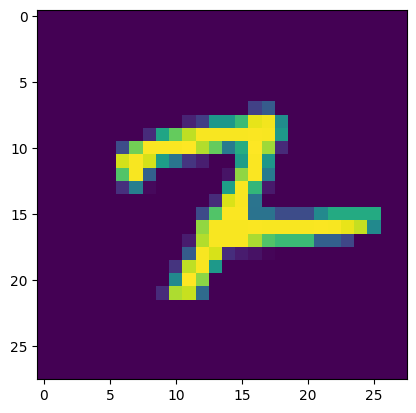

Prediction: 7 Truth: 2


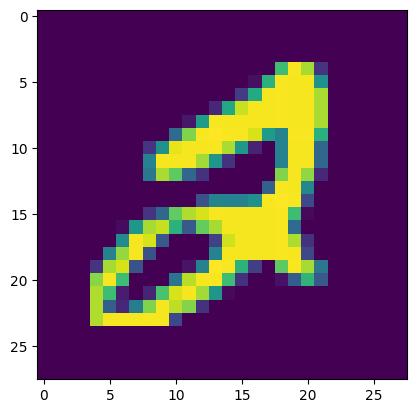

Prediction: 7 Truth: 2


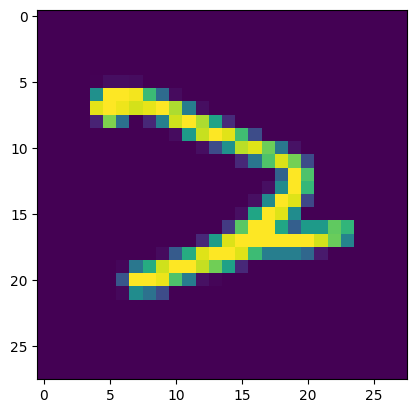

Prediction: 2 Truth: 7


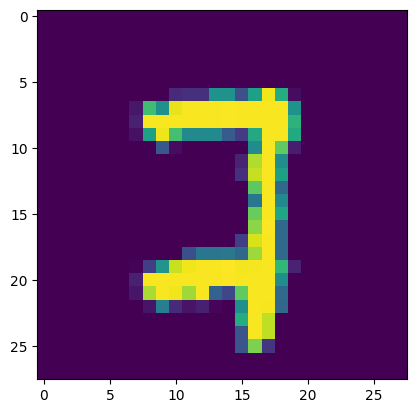

Prediction: 7 Truth: 2


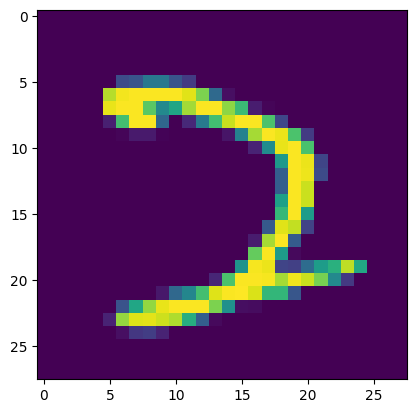

Prediction: 2 Truth: 7


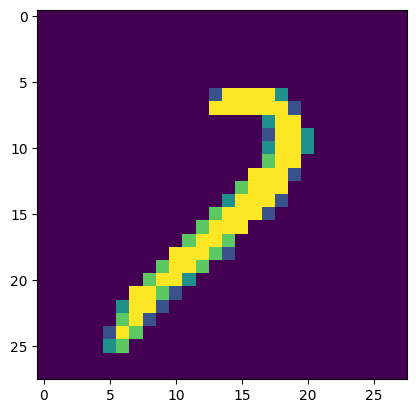

Prediction: 7 Truth: 2


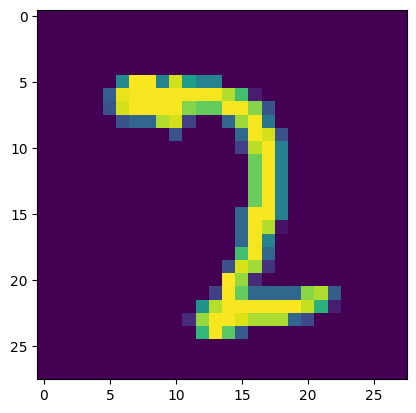

Prediction: 7 Truth: 2


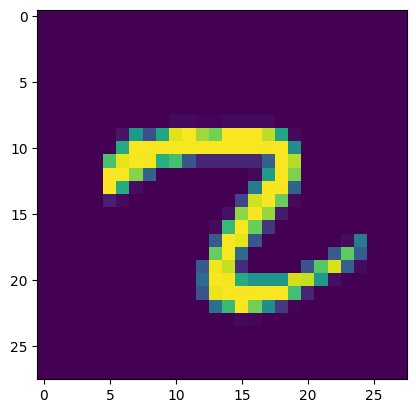

Prediction: 2 Truth: 7


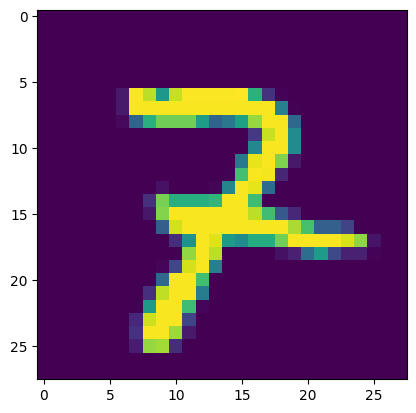

Prediction: 2 Truth: 7


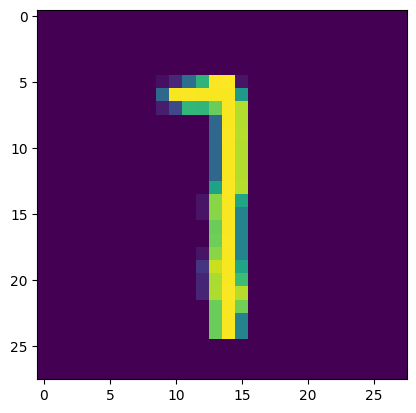

Prediction: 7 Truth: 2


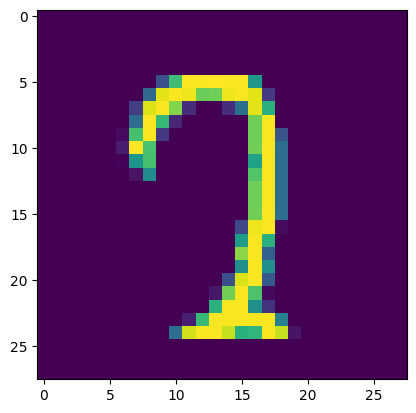

265


In [ ]:
count = 0
for i, e in enumerate(y_train):
  x = X_train[i]
  prediction = model.predict(x)
  if prediction != e:
    count += 1
    print("Prediction:",2 if prediction==-1 else 7,"Truth:",2 if e==-1 else 7)
    plt.imshow(x.reshape(28,28))
    plt.show()
print(count)